## Imports

In [ ]:
!pip install h2o

In [ ]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         10 mins 48 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    6 days
H2O_cluster_name:           H2O_from_python_unknownUser_o7njcu
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, auc
import os
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
os.mkdir('Models')

## Read Data

In [ ]:
data1 = '15-16_Balanced_Stunting.csv'
data2 = '15-16_Balanced_Wasting.csv'
data3 = '15-16_Balanced_Stunted_Wasting.csv'


df1 = h2o.import_file(data1)
df2 = h2o.import_file(data2)
df3 = h2o.import_file(data3)

In [ ]:
data3_subset = '/content/15-16_HAWH__40%.csv'

In [ ]:
df3_sub = h2o.import_file(data3_subset)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# df1 = df1.drop(['C1'], axis = 1)
# df2 = df2.drop(['C1'], axis = 1)
# df3 = df3.drop(['C1'], axis = 1)
df3_sub = df3_sub.drop(['C1'], axis = 1)

## Splitting Data

In [ ]:
df1['H/A'] = df1['H/A'].asfactor()  #encode the binary repsonse as a factor
df1['H/A'].levels() 

[['0', '1']]

In [ ]:
df3['HAWH'] = df3['HAWH'].asfactor()  #encode the binary repsonse as a factor
df3['HAWH'].levels() 

[['0', '1']]

In [ ]:
df2['W/H'] = df2['W/H'].asfactor()  #encode the binary repsonse as a factor
df2['W/H'].levels() 

[['0', '1']]

In [ ]:
df3_sub['HAWH'] = df3_sub['HAWH'].asfactor()  #encode the binary repsonse as a factor
df3_sub['HAWH'].levels() 

[['0', '1']]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits1 = df1.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train1 = splits1[0]
valid1 = splits1[1]
test1 = splits1[2]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits2 = df2.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train2 = splits2[0]
valid2 = splits2[1]
test2 = splits2[2]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits3 = df3.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train3 = splits3[0]
valid3 = splits3[1]
test3 = splits3[2]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits3_sub = df3_sub.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train3_sub = splits3_sub[0]
valid3_sub = splits3_sub[1]
test3_sub = splits3_sub[2]

In [ ]:
y2_true = test2['W/H']
y1_true = test1['H/A']
y3_true = test3['HAWH']
y3_sub_true = test3_sub['HAWH']

In [ ]:
print('HA rows......')
print(train1.nrow)
print(valid1.nrow)
print(test1.nrow)

print('WH rows......')
print(train2.nrow)
print(valid2.nrow)
print(test2.nrow)

print('HAWH rows......')
print(train3.nrow)
print(valid3.nrow)
print(test3.nrow)

HA rows......
169752
22591
33972
WH rows......
200313
26636
39945
HAWH rows......
241761
32150
48297


In [ ]:
y1 = 'H/A'
y2 = 'W/H'
y3 = 'HAWH'
x1 = list(df1.columns)
x2 = list(df2.columns)
x3 = list(df3.columns)

In [ ]:
y3_sub = 'HAWH'
x3_sub = list(df3_sub.columns)
x3_sub.remove(y3_sub)

In [ ]:
x1.remove(y1)  #remove the response
x2.remove(y2)
x3.remove(y3)

# Function to test model

In [ ]:
def test_model(df, output, model):
  preds = model.predict(df)
  print(f'shape of preds is {preds.shape}')
  pred = preds['predict']
  print(f'shape of preds is {pred.shape}')
  true = df[output]
  true = true.as_data_frame().to_numpy()
  pred = pred.as_data_frame().to_numpy()
  accuracy = accuracy_score(true, pred)
  print(f'accuracy is {accuracy}')
  # perf = model.model_performance(df)
  # auc = perf.auc()
  # print(f'roc auc score is {auc}')

# Testing a saved model

In [ ]:
# saved_model1 = h2o.load_model('/content/glm1_fit2_63_39')
# test_model(test, y1, saved_model1)
# test_model(train, y1, saved_model1)

# Models

### GLE

In [ ]:
# Import H2O GLM:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

#### HAWH

In [ ]:
# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument

glm3_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm3_fit1', balance_classes = True, seed = 1234)

In [ ]:
glm3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm3_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    4  py_22_sid_abdf

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18856568167907692
RMSE: 0.4342415015622953
LogLoss: 0.5584949405808646
Null degrees of freedom: 241760
Residual degrees of freedom: 241737
Null deviance: 335150.0818539697
Residual deviance: 270044.5906595408
AIC: 270092.5906595408
AUC: 0.7859859976199083
AUCPR: 0.7685371764983002
Gini: 0.5719719952398166

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3874205146587935: 


0         1   Error                 Rate
0      0  66308.0   54905.0   0.453   (54905.0/121213.0)
1      1  17872.0  102676.0  0.1483   (17872.0/120548.0)
2  Total  84180.0  157581.0   0.301   (72777.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.387421       0.738334  243.0
1                        max f2   0.175488       0.845229  330.0
2                  max f0point5   0.572318       0.719635  163.0
3                  max accuracy   0.516124       0.716187  187.0
4                 max precision   0.963526       1.000000    0.0
5                    max recall   0.004779       1.000000  399.0
6               max specificity   0.963526       1.000000    0.0
7              max absolute_mcc   0.516124       0.432387  187.0
8    max min_per_class_accuracy   0.518470       0.715873  186.0
9   max mean_per_class_accuracy   0.516124       0.716193  187.0
10                      max tns   0.963526  121213.000000    0.0
11                      max fns   0.963526  120524.000000    0.0
12                      max fps   0.004779  121213.000000  399.0
13                      max tps   0.004779  120548.000000  399.0
14                      max tnr   0.963526       1.000000    0.0
15                      max fnr   0.963526       0.999801    0.0
16                      max fpr   0.004779       1.000000  399.0
17                      max tpr   0.004779       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010010  ...        84.722984            0.016915
1       2                  0.020011  ...        83.597199            0.033366
2       3                  0.030001  ...        82.080877            0.049115
3       4                  0.040002  ...        80.519294            0.064242
4       5                  0.050004  ...        78.968581            0.078758
5       6                  0.100016  ...        74.267604            0.148152
6       7                  0.150004  ...        69.920031            0.209190
7       8                  0.200020  ...        66.145533            0.263883
8       9                  0.300011  ...        58.243658            0.348516
9      10                  0.400007  ...        51.113653            0.407794
10     11                  0.500019  ...        43.247148            0.431301
11     12                  0.600006  ...        34.885493            0.417482
12     13                  0.700001  ...        26.569393            0.370952
13     14                  0.800001  ...        17.827424            0.284457
14     15                  0.900000  ...         8.916453            0.160056
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.18982906583847522
RMSE: 0.4356937753037966
LogLoss: 0.5615288153276122
Null degrees of freedom: 32149
Residual degrees of freedom: 32126
Null deviance: 44569.89302869367
Residual deviance: 36106.302825565464
AIC: 36154.302825565464
AUC: 0.7830155276940923
AUCPR: 0.7668614350651769
Gini: 0.5660310553881847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4015600657215919: 


0        1   Error               Rate
0      0   9084.0   6965.0   0.434   (6965.0/16049.0)
1      1   2632.0  13469.0  0.1635   (2632.0/16101.0)
2  Total  11716.0  20434.0  0.2985   (9597.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.401560      0.737320  239.0
1                        max f2   0.161211      0.845783  341.0
2                  max f0point5   0.583947      0.718006  157.0
3                  max accuracy   0.519299      0.714090  186.0
4                 max precision   0.942735      0.951613    4.0
5                    max recall   0.003260      1.000000  399.0
6               max specificity   0.969771      0.999938    0.0
7              max absolute_mcc   0.471079      0.430339  208.0
8    max min_per_class_accuracy   0.517188      0.712505  187.0
9   max mean_per_class_accuracy   0.519299      0.714095  186.0
10                      max tns   0.969771  16048.000000    0.0
11                      max fns   0.969771  16100.000000    0.0
12                      max fps   0.003260  16049.000000  399.0
13                      max tps   0.003260  16101.000000  399.0
14                      max tnr   0.969771      0.999938    0.0
15                      max fnr   0.969771      0.999938    0.0
16                      max fpr   0.003260      1.000000  399.0
17                      max tpr   0.003260      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 49.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        82.933933            0.016639
1       2                  0.020000  ...        82.286814            0.032968
2       3                  0.030016  ...        80.847390            0.048612
3       4                  0.040000  ...        79.181417            0.063448
4       5                  0.050016  ...        78.318549            0.078470
5       6                  0.100000  ...        73.778026            0.147795
6       7                  0.150016  ...        69.619910            0.209220
7       8                  0.200000  ...        64.399727            0.258016
8       9                  0.300031  ...        57.592919            0.346153
9      10                  0.400000  ...        50.285697            0.402937
10     11                  0.500000  ...        42.500466            0.425693
11     12                  0.600000  ...        34.536157            0.415105
12     13                  0.700000  ...        26.158979            0.366819
13     14                  0.800000  ...        17.562574            0.281456
14     15                  0.900000  ...         8.937333            0.161133
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 21:18:04  ...                                                 
1    2021-12-23 21:18:05  ...                                                 
2    2021-12-23 21:18:05  ...                                                 
3    2021-12-23 21:18:05  ...                                                 
4    2021-12-23 21:18:06  ...         1.82934                         0.298507

[5 rows x 20 columns]


Variable Importances: 


variable  ...  percentage
0        Exposure to mass media  ...    0.092653
1                  immunization  ...    0.082662
2               source of water  ...    0.073233
3               initiaion of bf  ...    0.071447
4            history of illness  ...    0.069745
5                   child's age  ...    0.067902
6                          Area  ...    0.067106
7        index to birth history  ...    0.054726
8                 dietary score  ...    0.053121
9                  wealth index  ...    0.042725
10                     Religion  ...    0.042234
11            mothers education  ...    0.042203
12                        State  ...    0.040327
13                 months of bf  ...    0.038311
14                        caste  ...    0.032645
15        no of living children  ...    0.030971
16        sex of household head  ...    0.026641
17                 sex of child  ...    0.025014
18              toilet facility  ...    0.015646
19  mothers age(at first birth)  ...    0.010977

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm3_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm3_fit2', balance_classes = True, seed = 1234, lambda_search=True)
glm3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm3_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   79  py_22_sid_abdf

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18865505078483366
RMSE: 0.4343443919113422
LogLoss: 0.5586296745474115
Null degrees of freedom: 241760
Residual degrees of freedom: 241738
Null deviance: 335150.0818539697
Residual deviance: 270109.7374965135
AIC: 270155.7374965135
AUC: 0.7859296077101483
AUCPR: 0.7683852464182541
Gini: 0.5718592154202966

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36403365973304885: 


0         1   Error                 Rate
0      0  61665.0   59548.0  0.4913   (59548.0/121213.0)
1      1  15157.0  105391.0  0.1257   (15157.0/120548.0)
2  Total  76822.0  164939.0   0.309   (74705.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.364034       0.738324  258.0
1                        max f2   0.191986       0.845428  329.0
2                  max f0point5   0.569804       0.719263  164.0
3                  max accuracy   0.523739       0.715707  185.0
4                 max precision   0.959382       1.000000    0.0
5                    max recall   0.006789       1.000000  399.0
6               max specificity   0.959382       1.000000    0.0
7              max absolute_mcc   0.525741       0.431433  184.0
8    max min_per_class_accuracy   0.518991       0.714014  187.0
9   max mean_per_class_accuracy   0.523739       0.715687  185.0
10                      max tns   0.959382  121213.000000    0.0
11                      max fns   0.959382  120524.000000    0.0
12                      max fps   0.006789  121213.000000  399.0
13                      max tps   0.006789  120548.000000  399.0
14                      max tnr   0.959382       1.000000    0.0
15                      max fnr   0.959382       0.999801    0.0
16                      max fpr   0.006789       1.000000  399.0
17                      max tpr   0.006789       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010002  ...        85.124598            0.016981
1       2                  0.020007  ...        83.759541            0.033424
2       3                  0.030009  ...        81.892466            0.049015
3       4                  0.040002  ...        80.457082            0.064193
4       5                  0.050012  ...        79.138019            0.078940
5       6                  0.100004  ...        74.164801            0.147928
6       7                  0.150004  ...        69.903440            0.209140
7       8                  0.200003  ...        66.113653            0.263734
8       9                  0.300007  ...        58.146297            0.347929
9      10                  0.400031  ...        51.104278            0.407745
10     11                  0.500002  ...        43.271797            0.431533
11     12                  0.600002  ...        34.857389            0.417142
12     13                  0.700001  ...        26.603760            0.371432
13     14                  0.800001  ...        17.854384            0.284887
14     15                  0.900000  ...         8.934888            0.160387
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.18986382897405354
RMSE: 0.4357336674782585
LogLoss: 0.5615181985523017
Null degrees of freedom: 32149
Residual degrees of freedom: 32127
Null deviance: 44569.89302869367
Residual deviance: 36105.620166912995
AIC: 36151.620166912995
AUC: 0.7829969096296217
AUCPR: 0.766865495968286
Gini: 0.5659938192592433

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3713962249630323: 


0        1   Error               Rate
0      0   8295.0   7754.0  0.4831   (7754.0/16049.0)
1      1   2171.0  13930.0  0.1348   (2171.0/16101.0)
2  Total  10466.0  21684.0  0.3087   (9925.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.371396      0.737330  251.0
1                        max f2   0.153544      0.845755  343.0
2                  max f0point5   0.562862      0.717707  165.0
3                  max accuracy   0.527240      0.713997  180.0
4                 max precision   0.936696      0.951613    4.0
5                    max recall   0.003291      1.000000  399.0
6               max specificity   0.963885      0.999938    0.0
7              max absolute_mcc   0.461223      0.429356  210.0
8    max min_per_class_accuracy   0.515834      0.711446  185.0
9   max mean_per_class_accuracy   0.527240      0.714019  180.0
10                      max tns   0.963885  16048.000000    0.0
11                      max fns   0.963885  16099.000000    0.0
12                      max fps   0.003291  16049.000000  399.0
13                      max tps   0.003291  16101.000000  399.0
14                      max tnr   0.963885      0.999938    0.0
15                      max fnr   0.963885      0.999876    0.0
16                      max fpr   0.003291      1.000000  399.0
17                      max tpr   0.003291      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 49.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010047  ...        83.603964            0.016826
1       2                  0.020000  ...        81.976275            0.032844
2       3                  0.030016  ...        80.640471            0.048488
3       4                  0.040000  ...        78.870878            0.063199
4       5                  0.050016  ...        78.070195            0.078221
5       6                  0.100031  ...        73.723991            0.147733
6       7                  0.150016  ...        69.495707            0.208847
7       8                  0.200000  ...        64.523943            0.258514
8       9                  0.300000  ...        57.485042            0.345469
9      10                  0.400000  ...        50.332277            0.403311
10     11                  0.500000  ...        42.500466            0.425693
11     12                  0.600000  ...        34.577562            0.415603
12     13                  0.700000  ...        26.096871            0.365948
13     14                  0.800000  ...        17.554810            0.281332
14     15                  0.900000  ...         8.937333            0.161133
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:18:08  ...                                                 
1     2021-12-23 21:18:09  ...                                                 
2     2021-12-23 21:18:09  ...                                                 
3     2021-12-23 21:18:09  ...                                                 
4     2021-12-23 21:18:10  ...                                                 
5     2021-12-23 21:18:10  ...                                                 
6     2021-12-23 21:18:10  ...                                                 
7     2021-12-23 21:18:11  ...                                                 
8     2021-12-23 21:18:11  ...                                                 
9     2021-12-23 21:18:11  ...                                                 
10    2021-12-23 21:18:12  ...                                                 
11    2021-12-23 21:18:12  ...                                                 
12    2021-12-23 21:18:12  ...                                                 
13    2021-12-23 21:18:13  ...                                                 
14    2021-12-23 21:18:13  ...                                                 
15    2021-12-23 21:18:14  ...                                                 
16    2021-12-23 21:18:14  ...                                                 
17    2021-12-23 21:18:14  ...                                                 
18    2021-12-23 21:18:15  ...                                                 
19    2021-12-23 21:18:15  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0        Exposure to mass media  ...    0.094099
1                  immunization  ...    0.084319
2               source of water  ...    0.074601
3               initiaion of bf  ...    0.072539
4            history of illness  ...    0.070841
5                   child's age  ...    0.068597
6                          Area  ...    0.067958
7        index to birth history  ...    0.054318
8                 dietary score  ...    0.052295
9                  wealth index  ...    0.042780
10                     Religion  ...    0.042180
11            mothers education  ...    0.042061
12                        State  ...    0.040207
13                 months of bf  ...    0.037380
14                        caste  ...    0.032443
15        no of living children  ...    0.030478
16        sex of household head  ...    0.026498
17                 sex of child  ...    0.024771
18              toilet facility  ...    0.013666
19  mothers age(at first birth)  ...    0.010035

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm3_perf1 = glm3_fit1.model_performance(test3)
glm3_perf2 = glm3_fit2.model_performance(test3)
# Print model performance
print(glm3_perf1)
print(glm3_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18861212085500748
RMSE: 0.4342949698707176
LogLoss: 0.558220698752568
Null degrees of freedom: 48296
Residual degrees of freedom: 48273
Null deviance: 66952.73332295207
Residual deviance: 53920.770175305544
AIC: 53968.770175305544
AUC: 0.78562387070535
AUCPR: 0.7666329036596409
Gini: 0.5712477414107

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3714165043690174: 


0        1   Error                Rate
0      0  12855.0  11429.0  0.4706   (11429.0/24284.0)
1      1   3305.0  20708.0  0.1376    (3305.0/24013.0)
2  Total  16160.0  32137.0  0.3051   (14734.0/48297.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.371417      0.737596  255.0
1                        max f2   0.167411      0.846008  340.0
2                  max f0point5   0.575968      0.717679  166.0
3                  max accuracy   0.508275      0.716773  196.0
4                 max precision   0.957102      1.000000    0.0
5                    max recall   0.005195      1.000000  399.0
6               max specificity   0.957102      1.000000    0.0
7              max absolute_mcc   0.505650      0.433741  197.0
8    max min_per_class_accuracy   0.515913      0.714750  193.0
9   max mean_per_class_accuracy   0.508275      0.716834  196.0
10                      max tns   0.957102  24284.000000    0.0
11                      max fns   0.957102  24000.000000    0.0
12                      max fps   0.005195  24284.000000  399.0
13                      max tps   0.005195  24013.000000  399.0
14                      max tnr   0.957102      1.000000    0.0
15                      max fnr   0.957102      0.999459    0.0
16                      max fpr   0.005195      1.000000  399.0
17                      max tpr   0.005195      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.72 %, avg score: 49.77 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010001  ...        83.222701            0.016553
1       2                  0.020001  ...        82.389870            0.032774
2       3                  0.030002  ...        81.279429            0.048499
3       4                  0.040002  ...        81.036521            0.064471
4       5                  0.050024  ...        80.316412            0.079906
5       6                  0.100027  ...        74.858193            0.148921
6       7                  0.150030  ...        70.040509            0.208991
7       8                  0.200012  ...        66.441167            0.264298
8       9                  0.299998  ...        57.804501            0.344889
9      10                  0.400004  ...        50.708472            0.403408
10     11                  0.500010  ...        43.361043            0.431200
11     12                  0.599996  ...        34.858438            0.415964
12     13                  0.700023  ...        26.605872            0.370416
13     14                  0.799988  ...        18.036856            0.286975
14     15                  0.899994  ...         9.131456            0.163448
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.188675059932502
RMSE: 0.4343674250361116
LogLoss: 0.558314406361683
Null degrees of freedom: 48296
Residual degrees of freedom: 48274
Null deviance: 66952.73332295207
Residual deviance: 53929.8217681004
AIC: 53975.8217681004
AUC: 0.7856530184951772
AUCPR: 0.766404683891184
Gini: 0.5713060369903544

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36213474550729796: 


0        1   Error                Rate
0      0  12379.0  11905.0  0.4902   (11905.0/24284.0)
1      1   3015.0  20998.0  0.1256    (3015.0/24013.0)
2  Total  15394.0  32903.0  0.3089   (14920.0/48297.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.362135      0.737859  256.0
1                        max f2   0.170886      0.845948  336.0
2                  max f0point5   0.571811      0.717724  163.0
3                  max accuracy   0.494762      0.717105  197.0
4                 max precision   0.944646      0.980000    1.0
5                    max recall   0.004670      1.000000  399.0
6               max specificity   0.952107      0.999959    0.0
7              max absolute_mcc   0.494762      0.435057  197.0
8    max min_per_class_accuracy   0.517605      0.715987  187.0
9   max mean_per_class_accuracy   0.494762      0.717253  197.0
10                      max tns   0.952107  24283.000000    0.0
11                      max fns   0.952107  24000.000000    0.0
12                      max fps   0.004670  24284.000000  399.0
13                      max tps   0.004670  24013.000000  399.0
14                      max tnr   0.952107      0.999959    0.0
15                      max fnr   0.952107      0.999459    0.0
16                      max fpr   0.004670      1.000000  399.0
17                      max tpr   0.004670      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.72 %, avg score: 49.77 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010001  ...        83.222701            0.016553
1       2                  0.020001  ...        82.389870            0.032774
2       3                  0.030002  ...        81.557040            0.048664
3       4                  0.040002  ...        81.140624            0.064554
4       5                  0.050024  ...        80.399660            0.079989
5       6                  0.100006  ...        75.060962            0.149294
6       7                  0.150009  ...        70.036218            0.208949
7       8                  0.200012  ...        66.566091            0.264795
8       9                  0.299998  ...        57.624042            0.343813
9      10                  0.400004  ...        50.677239            0.403160
10     11                  0.500031  ...        43.371763            0.431324
11     12                  0.599996  ...        34.782090            0.415053
12     13                  0.700002  ...        26.591769            0.370209
13     14                  0.799988  ...        18.047267            0.287141
14     15                  0.899994  ...         9.140710            0.163614
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUCROC
print(glm3_perf1.auc())
print(glm3_perf2.auc())

0.78562387070535
0.7856530184951772


In [ ]:
# Retreive test set AUCPR
print(glm3_perf1.aucpr())
print(glm3_perf2.aucpr())

0.7666329036596409
0.766404683891184


In [ ]:
# Retreive test set Accuracies
print(glm3_perf1.accuracy())
print(glm3_perf2.accuracy())

[[0.5082749119010326, 0.7167732985485641]]
[[0.49476187397592203, 0.7171045820651386]]


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm3_fit2.aucpr(train=True))
print(glm3_fit2.aucpr(valid=True))

0.7683852464182541
0.766865495968286


In [ ]:
test_model(test3, 'HAWH', glm3_fit2)
test_model(train3, 'HAWH', glm3_fit2)
test_model(valid3, 'HAWH', glm3_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.6938526202455639
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.6930150024197451
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.6911664074650078


In [ ]:
test_model(test3, 'HAWH', glm3_fit1)
test_model(train3, 'HAWH', glm3_fit1)
test_model(valid3, 'HAWH', glm3_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7020518872807835
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7025533481413462
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7014618973561431


In [ ]:
glm3_fit2_HAWH = h2o.save_model(model=glm3_fit2, path="/content/Models", force=True)
print(glm3_fit2_HAWH)

/content/Models/glm3_fit2


#### H/A

In [ ]:
# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument

glm1_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm1_fit1', balance_classes = True, seed = 1234)

In [ ]:
glm1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    3  py_14_sid_abdf

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22667028897596342
RMSE: 0.4760990327399998
LogLoss: 0.6447598918635248
Null degrees of freedom: 169751
Residual degrees of freedom: 169728
Null deviance: 235173.59427152495
Residual deviance: 218898.5623272341
AIC: 218946.5623272341
AUC: 0.6749311302822709
AUCPR: 0.6714053660015444
Gini: 0.34986226056454184

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3411356622390797: 


0         1   Error                 Rate
0      0  17614.0   64717.0  0.7861    (64717.0/82331.0)
1      1   6623.0   80798.0  0.0758     (6623.0/87421.0)
2  Total  24237.0  145515.0  0.4203   (71340.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.341136      0.693736  304.0
1                        max f2   0.163072      0.841525  383.0
2                  max f0point5   0.516424      0.639297  192.0
3                  max accuracy   0.516424      0.628370  192.0
4                 max precision   0.818676      0.821429   13.0
5                    max recall   0.077123      1.000000  399.0
6               max specificity   0.875196      0.999964    0.0
7              max absolute_mcc   0.516424      0.256300  192.0
8    max min_per_class_accuracy   0.519678      0.626840  190.0
9   max mean_per_class_accuracy   0.516424      0.628181  192.0
10                      max tns   0.875196  82328.000000    0.0
11                      max fns   0.875196  87408.000000    0.0
12                      max fps   0.077123  82331.000000  399.0
13                      max tps   0.077123  87421.000000  399.0
14                      max tnr   0.875196      0.999964    0.0
15                      max fnr   0.875196      0.999851    0.0
16                      max fpr   0.077123      1.000000  399.0
17                      max tpr   0.077123      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        58.040897            0.011970
1       2                  0.020006  ...        54.152771            0.022337
2       3                  0.030003  ...        54.030533            0.033423
3       4                  0.040005  ...        53.632197            0.044238
4       5                  0.050002  ...        53.708682            0.055372
5       6                  0.100005  ...        48.664366            0.100342
6       7                  0.150001  ...        44.380651            0.137259
7       8                  0.200004  ...        40.901869            0.168668
8       9                  0.300002  ...        34.848310            0.215555
9      10                  0.400001  ...        29.819684            0.245932
10     11                  0.500000  ...        24.818979            0.255862
11     12                  0.599999  ...        19.990474            0.247301
12     13                  0.699998  ...        15.229321            0.219800
13     14                  0.799996  ...        10.550299            0.174022
14     15                  0.900007  ...         5.692056            0.105625
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.22679618981491662
RMSE: 0.4762312356564998
LogLoss: 0.6451882876028256
Null degrees of freedom: 22590
Residual degrees of freedom: 22567
Null deviance: 31284.28743682472
Residual deviance: 29150.897210470866
AIC: 29198.897210470866
AUC: 0.674732465989039
AUCPR: 0.6742762717611502
Gini: 0.34946493197807804

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31175725636793916: 


0        1   Error               Rate
0      0  1739.0   9108.0  0.8397   (9108.0/10847.0)
1      1   593.0  11151.0  0.0505    (593.0/11744.0)
2  Total  2332.0  20259.0  0.4294   (9701.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.311757      0.696872  323.0
1                        max f2   0.132090      0.844262  393.0
2                  max f0point5   0.519202      0.644729  191.0
3                  max accuracy   0.504676      0.630428  201.0
4                 max precision   0.867436      1.000000    0.0
5                    max recall   0.103272      1.000000  398.0
6               max specificity   0.867436      1.000000    0.0
7              max absolute_mcc   0.531010      0.260361  183.0
8    max min_per_class_accuracy   0.517707      0.629257  192.0
9   max mean_per_class_accuracy   0.519202      0.630192  191.0
10                      max tns   0.867436  10847.000000    0.0
11                      max fns   0.867436  11734.000000    0.0
12                      max fps   0.086378  10847.000000  399.0
13                      max tps   0.103272  11744.000000  398.0
14                      max tnr   0.867436      1.000000    0.0
15                      max fnr   0.867436      0.999149    0.0
16                      max fpr   0.086378      1.000000  399.0
17                      max tpr   0.103272      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 51.43 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        59.166835            0.012328
1       2                  0.020008  ...        53.208718            0.022172
2       3                  0.030012  ...        51.506399            0.032194
3       4                  0.040016  ...        51.506399            0.042926
4       5                  0.050020  ...        50.314776            0.052416
5       6                  0.100040  ...        44.867355            0.093482
6       7                  0.150015  ...        42.696433            0.133399
7       8                  0.200035  ...        40.004162            0.166662
8       9                  0.300031  ...        34.522890            0.215724
9      10                  0.400027  ...        30.206784            0.251663
10     11                  0.500022  ...        24.892292            0.259227
11     12                  0.600018  ...        20.114530            0.251362
12     13                  0.700013  ...        14.974463            0.218315
13     14                  0.800009  ...        10.086912            0.168066
14     15                  0.900004  ...         5.642078            0.105757
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 21:18:38  ...                                                 
1    2021-12-23 21:18:38  ...                                                 
2    2021-12-23 21:18:39  ...                                                 
3    2021-12-23 21:18:39  ...         1.59167                         0.429419

[4 rows x 20 columns]


Variable Importances: 


variable  ...  percentage
0                   child's age  ...    0.150818
1        Exposure to mass media  ...    0.102900
2               source of water  ...    0.072045
3                  wealth index  ...    0.071860
4            history of illness  ...    0.066638
5                  immunization  ...    0.066490
6               initiaion of bf  ...    0.057981
7                          Area  ...    0.056780
8                         State  ...    0.048936
9                 dietary score  ...    0.043487
10                     Religion  ...    0.039971
11                 birth weight  ...    0.033164
12            mothers education  ...    0.028255
13        sex of household head  ...    0.028001
14  mothers age(at first birth)  ...    0.027233
15                        caste  ...    0.026489
16              toilet facility  ...    0.020471
17                 sex of child  ...    0.019655
18        no of living children  ...    0.015555
19       index to birth history  ...    0.011424

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm1_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm1_fit2', lambda_search=True, balance_classes = True, seed = 1234)
glm1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   58  py_14_sid_abdf

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22674401964525906
RMSE: 0.47617645851644014
LogLoss: 0.6449033360901272
Null degrees of freedom: 169751
Residual degrees of freedom: 169729
Null deviance: 235173.59427152495
Residual deviance: 218947.26221594252
AIC: 218993.26221594252
AUC: 0.6748624930667556
AUCPR: 0.6712771332031902
Gini: 0.3497249861335112

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3466444100351361: 


0         1   Error                 Rate
0      0  17338.0   64993.0  0.7894    (64993.0/82331.0)
1      1   6502.0   80919.0  0.0744     (6502.0/87421.0)
2  Total  23840.0  145912.0  0.4212   (71495.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.346644      0.693592  304.0
1                        max f2   0.178159      0.841560  383.0
2                  max f0point5   0.517999      0.639089  189.0
3                  max accuracy   0.516536      0.628081  190.0
4                 max precision   0.852783      0.862745    1.0
5                    max recall   0.089043      1.000000  399.0
6               max specificity   0.863472      0.999964    0.0
7              max absolute_mcc   0.517999      0.255900  189.0
8    max min_per_class_accuracy   0.519426      0.626268  188.0
9   max mean_per_class_accuracy   0.517999      0.627998  189.0
10                      max tns   0.863472  82328.000000    0.0
11                      max fns   0.863472  87407.000000    0.0
12                      max fps   0.089043  82331.000000  399.0
13                      max tps   0.089043  87421.000000  399.0
14                      max tnr   0.863472      0.999964    0.0
15                      max fnr   0.863472      0.999840    0.0
16                      max fpr   0.089043      1.000000  399.0
17                      max tpr   0.089043      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        57.812184            0.011923
1       2                  0.020012  ...        54.450361            0.022466
2       3                  0.030003  ...        54.144912            0.033494
3       4                  0.040005  ...        53.860944            0.044427
4       5                  0.050002  ...        53.685806            0.055348
5       6                  0.100016  ...        48.509609            0.100035
6       7                  0.150001  ...        44.304392            0.137023
7       8                  0.200004  ...        40.930466            0.168786
8       9                  0.300002  ...        34.886439            0.215791
9      10                  0.400001  ...        29.836842            0.246074
10     11                  0.500000  ...        24.725180            0.254895
11     12                  0.599999  ...        20.000007            0.247418
12     13                  0.699998  ...        15.170492            0.218951
13     14                  0.799996  ...        10.536000            0.173786
14     15                  0.899995  ...         5.688355            0.105555
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.22687391847974867
RMSE: 0.4763128367782551
LogLoss: 0.6453325359525255
Null degrees of freedom: 22590
Residual degrees of freedom: 22568
Null deviance: 31284.28743682472
Residual deviance: 29157.41463940701
AIC: 29203.41463940701
AUC: 0.6746775899751535
AUCPR: 0.6740134241934929
Gini: 0.34935517995030696

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3291642721302131: 


0        1   Error               Rate
0      0  1909.0   8938.0   0.824   (8938.0/10847.0)
1      1   688.0  11056.0  0.0586    (688.0/11744.0)
2  Total  2597.0  19994.0  0.4261   (9626.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.329164      0.696704  317.0
1                        max f2   0.141713      0.844225  394.0
2                  max f0point5   0.529320      0.645011  182.0
3                  max accuracy   0.512575      0.630517  195.0
4                 max precision   0.857057      1.000000    0.0
5                    max recall   0.114287      1.000000  398.0
6               max specificity   0.857057      1.000000    0.0
7              max absolute_mcc   0.529320      0.261453  182.0
8    max min_per_class_accuracy   0.516742      0.628284  192.0
9   max mean_per_class_accuracy   0.529320      0.630674  182.0
10                      max tns   0.857057  10847.000000    0.0
11                      max fns   0.857057  11737.000000    0.0
12                      max fps   0.097971  10847.000000  399.0
13                      max tps   0.114287  11744.000000  398.0
14                      max tnr   0.857057      1.000000    0.0
15                      max fnr   0.857057      0.999404    0.0
16                      max fpr   0.097971      1.000000  399.0
17                      max tpr   0.114287      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 51.44 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        60.869154            0.012682
1       2                  0.020008  ...        53.634298            0.022350
2       3                  0.030012  ...        51.222679            0.032017
3       4                  0.040016  ...        51.293609            0.042749
4       5                  0.050020  ...        49.293384            0.051352
5       6                  0.100040  ...        44.612007            0.092950
6       7                  0.150015  ...        42.866715            0.133931
7       8                  0.200035  ...        40.131864            0.167195
8       9                  0.300031  ...        34.551271            0.215902
9      10                  0.400027  ...        30.270642            0.252195
10     11                  0.500022  ...        24.875263            0.259049
11     12                  0.600018  ...        20.057765            0.250653
12     13                  0.700013  ...        14.901479            0.217251
13     14                  0.800009  ...        10.150774            0.169130
14     15                  0.900004  ...         5.604234            0.105048
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:18:40  ...                                                 
1     2021-12-23 21:18:40  ...                                                 
2     2021-12-23 21:18:41  ...                                                 
3     2021-12-23 21:18:41  ...                                                 
4     2021-12-23 21:18:41  ...                                                 
5     2021-12-23 21:18:41  ...                                                 
6     2021-12-23 21:18:41  ...                                                 
7     2021-12-23 21:18:41  ...                                                 
8     2021-12-23 21:18:42  ...                                                 
9     2021-12-23 21:18:42  ...                                                 
10    2021-12-23 21:18:42  ...                                                 
11    2021-12-23 21:18:43  ...                                                 
12    2021-12-23 21:18:43  ...                                                 
13    2021-12-23 21:18:43  ...                                                 
14    2021-12-23 21:18:44  ...                                                 
15    2021-12-23 21:18:44  ...                                                 
16    2021-12-23 21:18:44  ...                                                 
17    2021-12-23 21:18:44  ...                                                 
18    2021-12-23 21:18:45  ...                                                 
19    2021-12-23 21:18:45  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                   child's age  ...    0.157068
1        Exposure to mass media  ...    0.109041
2                  wealth index  ...    0.074707
3               source of water  ...    0.073397
4            history of illness  ...    0.067929
5                  immunization  ...    0.067285
6                          Area  ...    0.058936
7               initiaion of bf  ...    0.058149
8                         State  ...    0.050182
9                 dietary score  ...    0.042282
10                     Religion  ...    0.038530
11                 birth weight  ...    0.032437
12            mothers education  ...    0.027318
13        sex of household head  ...    0.026686
14  mothers age(at first birth)  ...    0.026424
15                        caste  ...    0.023254
16              toilet facility  ...    0.020143
17                 sex of child  ...    0.017683
18        no of living children  ...    0.014454
19       index to birth history  ...    0.008704

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm1_perf1 = glm1_fit1.model_performance(test1)
glm1_perf2 = glm1_fit2.model_performance(test1)
# Print model performance
print(glm1_perf1)
print(glm1_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.22551793054707986
RMSE: 0.47488728193865104
LogLoss: 0.6421308641652858
Null degrees of freedom: 33971
Residual degrees of freedom: 33948
Null deviance: 47069.84119429541
Residual deviance: 43628.939434846165
AIC: 43676.939434846165
AUC: 0.6791137809191201
AUCPR: 0.6760056042647232
Gini: 0.3582275618382402

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.342219284958447: 


0        1   Error                Rate
0      0  3537.0  12983.0  0.7859   (12983.0/16520.0)
1      1  1284.0  16168.0  0.0736    (1284.0/17452.0)
2  Total  4821.0  29151.0    0.42   (14267.0/33972.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.342219      0.693861  305.0
1                        max f2   0.162229      0.841306  385.0
2                  max f0point5   0.511802      0.640463  197.0
3                  max accuracy   0.511802      0.630755  197.0
4                 max precision   0.823291      0.860963   11.0
5                    max recall   0.089863      1.000000  398.0
6               max specificity   0.883596      0.999879    0.0
7              max absolute_mcc   0.511802      0.260718  197.0
8    max min_per_class_accuracy   0.519257      0.629298  192.0
9   max mean_per_class_accuracy   0.511802      0.630304  197.0
10                      max tns   0.883596  16518.000000    0.0
11                      max fns   0.883596  17451.000000    0.0
12                      max fps   0.080169  16520.000000  399.0
13                      max tps   0.089863  17452.000000  398.0
14                      max tnr   0.883596      0.999879    0.0
15                      max fnr   0.883596      0.999943    0.0
16                      max fpr   0.080169      1.000000  399.0
17                      max tpr   0.089863      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.37 %, avg score: 51.49 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010008  ...        67.178277            0.013826
1       2                  0.020016  ...        61.452994            0.025295
2       3                  0.030025  ...        58.972038            0.036411
3       4                  0.040004  ...        55.555825            0.045702
4       5                  0.050012  ...        54.673638            0.056229
5       6                  0.100024  ...        49.174131            0.101146
6       7                  0.150006  ...        46.071125            0.142118
7       8                  0.200018  ...        42.807696            0.176076
8       9                  0.300012  ...        36.005816            0.222138
9      10                  0.400006  ...        30.226710            0.248638
10     11                  0.500000  ...        25.269310            0.259821
11     12                  0.599994  ...        20.445830            0.252268
12     13                  0.699988  ...        15.461488            0.222563
13     14                  0.799982  ...        10.770552            0.177186
14     15                  0.899976  ...         5.804077            0.107418
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.225657744799074
RMSE: 0.4750344669590555
LogLoss: 0.6424501881212449
Null degrees of freedom: 33971
Residual degrees of freedom: 33949
Null deviance: 47069.84119429541
Residual deviance: 43650.63558170986
AIC: 43696.63558170986
AUC: 0.6788680654485579
AUCPR: 0.6758752125761814
Gini: 0.35773613089711587

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3697945376209791: 


0        1   Error                Rate
0      0  4290.0  12230.0  0.7403   (12230.0/16520.0)
1      1  1684.0  15768.0  0.0965    (1684.0/17452.0)
2  Total  5974.0  27998.0  0.4096   (13914.0/33972.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.369795      0.693861  292.0
1                        max f2   0.176557      0.841395  383.0
2                  max f0point5   0.517058      0.640530  191.0
3                  max accuracy   0.517058      0.630549  191.0
4                 max precision   0.878811      1.000000    0.0
5                    max recall   0.101173      1.000000  398.0
6               max specificity   0.878811      1.000000    0.0
7              max absolute_mcc   0.517058      0.260748  191.0
8    max min_per_class_accuracy   0.518355      0.628511  190.0
9   max mean_per_class_accuracy   0.517058      0.630402  191.0
10                      max tns   0.878811  16520.000000    0.0
11                      max fns   0.878811  17451.000000    0.0
12                      max fps   0.091373  16520.000000  399.0
13                      max tps   0.101173  17452.000000  398.0
14                      max tnr   0.878811      1.000000    0.0
15                      max fnr   0.878811      0.999943    0.0
16                      max fpr   0.091373      1.000000  399.0
17                      max tpr   0.101173      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.37 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010008  ...        66.033221            0.013590
1       2                  0.020016  ...        61.452994            0.025295
2       3                  0.030025  ...        59.162880            0.036529
3       4                  0.040004  ...        55.126113            0.045349
4       5                  0.050012  ...        53.527907            0.055051
5       6                  0.100024  ...        49.345991            0.101500
6       7                  0.150006  ...        46.185721            0.142471
7       8                  0.200018  ...        42.779049            0.175959
8       9                  0.300012  ...        36.273206            0.223787
9      10                  0.400006  ...        30.284010            0.249110
10     11                  0.500000  ...        25.143250            0.258525
11     12                  0.599994  ...        20.417180            0.251915
12     13                  0.699988  ...        15.453302            0.222445
13     14                  0.799982  ...        10.741902            0.176715
14     15                  0.899976  ...         5.772243            0.106828
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUC
print(glm1_perf1.auc())
print(glm1_perf2.auc())

0.6791137809191201
0.6788680654485579


In [ ]:
# Retreive test set AUCPR
print(glm1_perf1.aucpr())
print(glm1_perf2.aucpr())

0.6760056042647232
0.6758752125761814


In [ ]:
# Retreive test set Accuracies
print(glm1_perf1.accuracy())
print(glm1_perf2.accuracy())

[[0.5118015624001727, 0.6307547391969858]]
[[0.5170583158000794, 0.6305486871541269]]


In [ ]:
glm1_fit2_HA = h2o.save_model(model=glm1_fit2, path="/content/Models", force=True)
print(glm1_fit2_HA)

/content/Models/glm1_fit2


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm1_fit2.auc(train=True))
print(glm1_fit2.auc(valid=True))

0.6748624930667556
0.6746775899751535


In [ ]:
test_model(test1, 'H/A', glm1_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5687036382903567


In [ ]:
test_model(test1, 'H/A', glm1_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5653479335923702


#### W/H

In [ ]:
glm2_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm2_fit1', balance_classes = True, seed = 1234 )

In [ ]:
glm2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm2_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    3  py_18_sid_abdf

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22419374663569994
RMSE: 0.4734910206494944
LogLoss: 0.6398522901543534
Null degrees of freedom: 200312
Residual degrees of freedom: 200289
Null deviance: 277658.6436897289
Residual deviance: 256341.463595378
AIC: 256389.463595378
AUC: 0.6861795750300976
AUCPR: 0.6650678520306789
Gini: 0.37235915006019527

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37265559731848474: 


0         1   Error                 Rate
0      0  33848.0   67616.0  0.6664   (67616.0/101464.0)
1      1  13058.0   85791.0  0.1321    (13058.0/98849.0)
2  Total  46906.0  153407.0  0.4027   (80674.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.372656       0.680190  263.0
1                        max f2   0.081896       0.829780  389.0
2                  max f0point5   0.516908       0.634040  174.0
3                  max accuracy   0.516908       0.638506  174.0
4                 max precision   0.881488       1.000000    0.0
5                    max recall   0.017657       1.000000  399.0
6               max specificity   0.881488       1.000000    0.0
7              max absolute_mcc   0.516908       0.276738  174.0
8    max min_per_class_accuracy   0.506822       0.636587  181.0
9   max mean_per_class_accuracy   0.507863       0.638222  180.0
10                      max tns   0.881488  101464.000000    0.0
11                      max fns   0.881488   98844.000000    0.0
12                      max fps   0.017657  101464.000000  399.0
13                      max tps   0.017657   98849.000000  399.0
14                      max tnr   0.881488       1.000000    0.0
15                      max fnr   0.881488       0.999949    0.0
16                      max fpr   0.017657       1.000000  399.0
17                      max tpr   0.017657       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 49.35 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        70.084653            0.013842
1       2                  0.020004  ...        65.828407            0.025997
2       3                  0.030023  ...        63.154184            0.037433
3       4                  0.040002  ...        60.462420            0.047749
4       5                  0.050002  ...        58.842794            0.058087
5       6                  0.100003  ...        53.450919            0.105528
6       7                  0.150000  ...        49.702833            0.147187
7       8                  0.200002  ...        45.918077            0.181307
8       9                  0.300000  ...        39.151404            0.231882
9      10                  0.399999  ...        33.145331            0.261745
10     11                  0.500002  ...        27.832724            0.274742
11     12                  0.600001  ...        22.383432            0.265140
12     13                  0.700000  ...        16.912893            0.233729
13     14                  0.799998  ...        11.349406            0.179250
14     15                  0.899997  ...         5.880199            0.104479
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.2244462693237089
RMSE: 0.4737576060853365
LogLoss: 0.640409766626945
Null degrees of freedom: 26635
Residual degrees of freedom: 26612
Null deviance: 36926.690848414604
Residual deviance: 34115.90908775061
AIC: 34163.90908775061
AUC: 0.6849668957141546
AUCPR: 0.6685274602919974
Gini: 0.3699337914283092

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3598661036567079: 


0        1   Error                Rate
0      0  4115.0   9264.0  0.6924    (9264.0/13379.0)
1      1  1552.0  11705.0  0.1171    (1552.0/13257.0)
2  Total  5667.0  20969.0  0.4061   (10816.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.359866      0.683983  273.0
1                        max f2   0.084050      0.832192  389.0
2                  max f0point5   0.491202      0.633843  191.0
3                  max accuracy   0.491202      0.636019  191.0
4                 max precision   0.803296      0.844221   11.0
5                    max recall   0.016991      1.000000  398.0
6               max specificity   0.862841      0.999925    0.0
7              max absolute_mcc   0.491202      0.272936  191.0
8    max min_per_class_accuracy   0.506408      0.633326  181.0
9   max mean_per_class_accuracy   0.491202      0.636173  191.0
10                      max tns   0.862841  13378.000000    0.0
11                      max fns   0.862841  13253.000000    0.0
12                      max fps   0.009000  13379.000000  399.0
13                      max tps   0.016991  13257.000000  398.0
14                      max tnr   0.862841      0.999925    0.0
15                      max fnr   0.862841      0.999698    0.0
16                      max fpr   0.009000      1.000000  399.0
17                      max tpr   0.016991      1.000000  398.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 49.41 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        67.809812            0.013533
1       2                  0.020011  ...        62.093275            0.024737
2       3                  0.030035  ...        63.750019            0.038119
3       4                  0.040021  ...        62.847197            0.050075
4       5                  0.050008  ...        61.399915            0.061129
5       6                  0.100015  ...        54.008704            0.107541
6       7                  0.150023  ...        49.584034            0.148096
7       8                  0.200030  ...        45.259924            0.180241
8       9                  0.300008  ...        38.690552            0.231091
9      10                  0.400023  ...        32.545149            0.259189
10     11                  0.500000  ...        26.846194            0.267238
11     12                  0.600053  ...        21.912330            0.261772
12     13                  0.699992  ...        16.845185            0.234755
13     14                  0.800008  ...        11.336362            0.180556
14     15                  0.899985  ...         5.782359            0.103606
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 21:18:54  ...                                                 
1    2021-12-23 21:18:55  ...                                                 
2    2021-12-23 21:18:55  ...                                                 
3    2021-12-23 21:18:55  ...          1.6781                         0.406067

[4 rows x 20 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   Exposure to mass media             0.242626           1.000000    0.083110
1             months of bf             0.236311           0.973971    0.080947
2       history of illness             0.231118           0.952565    0.079168
3          initiaion of bf             0.229614           0.946369    0.078653
4   index to birth history             0.216338           0.891650    0.074105
5                     Area             0.198911           0.819823    0.068135
6          source of water             0.184129           0.758900    0.063072
7             immunization             0.165884           0.683703    0.056823
8    no of living children             0.155136           0.639404    0.053141
9            dietary score             0.141206           0.581990    0.048369
10            sex of child             0.133358           0.549641    0.045681
11                Religion             0.128119           0.528049    0.043886
12                   caste             0.107075           0.441314    0.036678
13       mothers education             0.103674           0.427299    0.035513
14                   State             0.102703           0.423295    0.035180
15            wealth index             0.091369           0.376584    0.031298
16   sex of household head             0.061527           0.253589    0.021076
17            birth weight             0.059111           0.243631    0.020248
18         toilet facility             0.048060           0.198083    0.016463
19             child's age             0.034030           0.140258    0.011657


See the whole table with table.as_data_frame()


In [ ]:
glm2_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm2_fit2', lambda_search=True, balance_classes = True, seed = 1234)
glm2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm2_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   60  py_18_sid_abdf

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.2243046395246597
RMSE: 0.47360810753687455
LogLoss: 0.6399994763843104
Null degrees of freedom: 200312
Residual degrees of freedom: 200290
Null deviance: 277658.6436897289
Residual deviance: 256400.43022594074
AIC: 256446.43022594074
AUC: 0.6860620364697918
AUCPR: 0.6649051000907921
Gini: 0.3721240729395836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38033100180347884: 


0         1   Error                 Rate
0      0  34292.0   67172.0   0.662   (67172.0/101464.0)
1      1  13313.0   85536.0  0.1347    (13313.0/98849.0)
2  Total  47605.0  152708.0  0.4018   (80485.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.380331       0.680053  258.0
1                        max f2   0.110859       0.829793  383.0
2                  max f0point5   0.515712       0.633097  170.0
3                  max accuracy   0.505577       0.637662  177.0
4                 max precision   0.862438       1.000000    0.0
5                    max recall   0.017264       1.000000  399.0
6               max specificity   0.862438       1.000000    0.0
7              max absolute_mcc   0.491238       0.275521  187.0
8    max min_per_class_accuracy   0.505577       0.636797  177.0
9   max mean_per_class_accuracy   0.505577       0.637673  177.0
10                      max tns   0.862438  101464.000000    0.0
11                      max fns   0.862438   98837.000000    0.0
12                      max fps   0.017264  101464.000000  399.0
13                      max tps   0.017264   98849.000000  399.0
14                      max tnr   0.862438       1.000000    0.0
15                      max fnr   0.862438       0.999879    0.0
16                      max fpr   0.017264       1.000000  399.0
17                      max tpr   0.017264       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 49.35 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        70.489135            0.013922
1       2                  0.020004  ...        65.069814            0.025697
2       3                  0.030003  ...        63.161619            0.037412
3       4                  0.040002  ...        60.715316            0.047949
4       5                  0.050002  ...        59.085580            0.058326
5       6                  0.100008  ...        53.554531            0.105738
6       7                  0.150000  ...        49.615158            0.146928
7       8                  0.200002  ...        45.902902            0.181247
8       9                  0.300000  ...        39.276173            0.232621
9      10                  0.399999  ...        33.233850            0.262444
10     11                  0.500002  ...        27.743700            0.273863
11     12                  0.600001  ...        22.339594            0.264621
12     13                  0.700000  ...        16.930235            0.233969
13     14                  0.799998  ...        11.348142            0.179230
14     15                  0.899997  ...         5.901556            0.104859
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.22452494887491029
RMSE: 0.4738406365803911
LogLoss: 0.6404940959320409
Null degrees of freedom: 26635
Residual degrees of freedom: 26613
Null deviance: 36926.690848414604
Residual deviance: 34120.40147849168
AIC: 34166.40147849168
AUC: 0.6850852192408685
AUCPR: 0.6685888075851756
Gini: 0.37017043848173703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36355871403100243: 


0        1   Error                Rate
0      0  4057.0   9322.0  0.6968    (9322.0/13379.0)
1      1  1527.0  11730.0  0.1152    (1527.0/13257.0)
2  Total  5584.0  21052.0  0.4073   (10849.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.363559      0.683786  274.0
1                        max f2   0.096526      0.832192  387.0
2                  max f0point5   0.519834      0.634064  172.0
3                  max accuracy   0.493933      0.636169  190.0
4                 max precision   0.780979      0.839721   16.0
5                    max recall   0.021116      1.000000  398.0
6               max specificity   0.854179      0.999925    0.0
7              max absolute_mcc   0.490616      0.273163  192.0
8    max min_per_class_accuracy   0.506545      0.632798  181.0
9   max mean_per_class_accuracy   0.493933      0.636298  190.0
10                      max tns   0.854179  13378.000000    0.0
11                      max fns   0.854179  13256.000000    0.0
12                      max fps   0.011403  13379.000000  399.0
13                      max tps   0.021116  13257.000000  398.0
14                      max tnr   0.854179      0.999925    0.0
15                      max fnr   0.854179      0.999925    0.0
16                      max fpr   0.011403      1.000000  399.0
17                      max tpr   0.021116      1.000000  398.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 49.41 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        67.809812            0.013533
1       2                  0.020011  ...        62.847197            0.025037
2       3                  0.030035  ...        64.001169            0.038270
3       4                  0.040021  ...        62.470236            0.049774
4       5                  0.050008  ...        62.154121            0.061880
5       6                  0.100015  ...        54.008704            0.107541
6       7                  0.150023  ...        49.282352            0.147195
7       8                  0.200030  ...        45.146793            0.179791
8       9                  0.300008  ...        38.866555            0.232142
9      10                  0.400023  ...        32.733718            0.260690
10     11                  0.500000  ...        26.981972            0.268590
11     12                  0.600015  ...        21.882243            0.261396
12     13                  0.699992  ...        16.845185            0.234755
13     14                  0.800008  ...        11.421222            0.181908
14     15                  0.899985  ...         5.757215            0.103156
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:18:57  ...                                                 
1     2021-12-23 21:18:57  ...                                                 
2     2021-12-23 21:18:57  ...                                                 
3     2021-12-23 21:18:57  ...                                                 
4     2021-12-23 21:18:58  ...                                                 
5     2021-12-23 21:18:58  ...                                                 
6     2021-12-23 21:18:58  ...                                                 
7     2021-12-23 21:18:59  ...                                                 
8     2021-12-23 21:18:59  ...                                                 
9     2021-12-23 21:18:59  ...                                                 
10    2021-12-23 21:19:00  ...                                                 
11    2021-12-23 21:19:00  ...                                                 
12    2021-12-23 21:19:01  ...                                                 
13    2021-12-23 21:19:01  ...                                                 
14    2021-12-23 21:19:02  ...                                                 
15    2021-12-23 21:19:02  ...                                                 
16    2021-12-23 21:19:03  ...                                                 
17    2021-12-23 21:19:03  ...                                                 
18    2021-12-23 21:19:04  ...                                                 
19    2021-12-23 21:19:04  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   Exposure to mass media             0.231708           1.000000    0.084640
1             months of bf             0.224673           0.969638    0.082071
2       history of illness             0.223700           0.965441    0.081715
3          initiaion of bf             0.222415           0.959893    0.081246
4   index to birth history             0.205082           0.885088    0.074914
5                     Area             0.190645           0.822781    0.069641
6          source of water             0.178873           0.771975    0.065340
7             immunization             0.155920           0.672915    0.056956
8    no of living children             0.146551           0.632484    0.053534
9            dietary score             0.131968           0.569545    0.048207
10            sex of child             0.126918           0.547751    0.046362
11                Religion             0.120338           0.519352    0.043958
12                   caste             0.099537           0.429582    0.036360
13       mothers education             0.094717           0.408780    0.034599
14                   State             0.094517           0.407914    0.034526
15            wealth index             0.083371           0.359810    0.030454
16   sex of household head             0.055772           0.240701    0.020373
17            birth weight             0.053139           0.229339    0.019411
18         toilet facility             0.035496           0.153193    0.012966
19             child's age             0.027859           0.120232    0.010177


See the whole table with table.as_data_frame()


In [ ]:
glm2_perf1 = glm2_fit1.model_performance(test2)
glm2_perf2 = glm2_fit2.model_performance(test2)
# Print model performance
print(glm2_perf1)
print(glm2_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.22394972729405638
RMSE: 0.473233269428573
LogLoss: 0.6393649753931373
Null degrees of freedom: 39944
Residual degrees of freedom: 39921
Null deviance: 55358.967326202466
Residual deviance: 51078.867884157735
AIC: 51126.867884157735
AUC: 0.6870412803595681
AUCPR: 0.6630280120820827
Gini: 0.37408256071913626

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34852280875088304: 


0        1   Error                Rate
0      0  5836.0  14584.0  0.7142   (14584.0/20420.0)
1      1  2108.0  17417.0   0.108    (2108.0/19525.0)
2  Total  7944.0  32001.0  0.4179   (16692.0/39945.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.348523      0.676047  276.0
1                        max f2   0.071683      0.827068  391.0
2                  max f0point5   0.514969      0.630829  174.0
3                  max accuracy   0.514969      0.638979  174.0
4                 max precision   0.808415      0.857664   11.0
5                    max recall   0.009632      1.000000  399.0
6               max specificity   0.866341      0.999951    0.0
7              max absolute_mcc   0.514969      0.277266  174.0
8    max min_per_class_accuracy   0.506542      0.637414  179.0
9   max mean_per_class_accuracy   0.508609      0.638547  178.0
10                      max tns   0.866341  20419.000000    0.0
11                      max fns   0.866341  19523.000000    0.0
12                      max fps   0.009632  20420.000000  399.0
13                      max tps   0.009632  19525.000000  399.0
14                      max tnr   0.866341      0.999951    0.0
15                      max fnr   0.866341      0.999898    0.0
16                      max fpr   0.009632      1.000000  399.0
17                      max tpr   0.009632      1.000000  399.0


Gains/Lift Table: Avg response rate: 48.88 %, avg score: 49.28 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010014  ...        71.338988            0.013974
1       2                  0.020003  ...        67.712682            0.026495
2       3                  0.030016  ...        65.509884            0.038465
3       4                  0.040005  ...        63.103784            0.049383
4       5                  0.050019  ...        60.554306            0.059250
5       6                  0.100013  ...        55.063817            0.107728
6       7                  0.150006  ...        51.457616            0.150996
7       8                  0.200000  ...        47.400768            0.185448
8       9                  0.300013  ...        40.395337            0.237070
9      10                  0.400000  ...        34.186940            0.267502
10     11                  0.500013  ...        28.222142            0.276044
11     12                  0.600000  ...        22.526675            0.264396
12     13                  0.699987  ...        16.885207            0.231208
13     14                  0.800000  ...        11.338028            0.177433
14     15                  0.899987  ...         6.013709            0.105873
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.22404044961734434
RMSE: 0.47332911342674067
LogLoss: 0.639462166365522
Null degrees of freedom: 39944
Residual degrees of freedom: 39922
Null deviance: 55358.967326202466
Residual deviance: 51086.63247094155
AIC: 51132.63247094155
AUC: 0.6869823275867475
AUCPR: 0.6629961899060518
Gini: 0.373964655173495

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3562626395398388: 


0        1   Error                Rate
0      0  5889.0  14531.0  0.7116   (14531.0/20420.0)
1      1  2126.0  17399.0  0.1089    (2126.0/19525.0)
2  Total  8015.0  31930.0   0.417   (16657.0/39945.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.356263      0.676280  273.0
1                        max f2   0.065909      0.827062  392.0
2                  max f0point5   0.521166      0.631417  167.0
3                  max accuracy   0.521166      0.639379  167.0
4                 max precision   0.835771      0.888889    2.0
5                    max recall   0.012472      1.000000  399.0
6               max specificity   0.852763      0.999951    0.0
7              max absolute_mcc   0.493384      0.277934  186.0
8    max min_per_class_accuracy   0.505905      0.637414  178.0
9   max mean_per_class_accuracy   0.493384      0.638800  186.0
10                      max tns   0.852763  20419.000000    0.0
11                      max fns   0.852763  19523.000000    0.0
12                      max fps   0.012472  20420.000000  399.0
13                      max tps   0.012472  19525.000000  399.0
14                      max tnr   0.852763      0.999951    0.0
15                      max fnr   0.852763      0.999898    0.0
16                      max fpr   0.012472      1.000000  399.0
17                      max tpr   0.012472      1.000000  399.0


Gains/Lift Table: Avg response rate: 48.88 %, avg score: 49.28 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010014  ...        73.896287            0.014475
1       2                  0.020003  ...        68.480832            0.026795
2       3                  0.030016  ...        65.168626            0.038265
3       4                  0.040005  ...        62.079584            0.048581
4       5                  0.050019  ...        60.963883            0.059650
5       6                  0.100013  ...        54.858977            0.107327
6       7                  0.150006  ...        51.389330            0.150796
7       8                  0.200000  ...        47.375160            0.185348
8       9                  0.300013  ...        40.446551            0.237371
9      10                  0.400000  ...        34.186940            0.267502
10     11                  0.500013  ...        28.232385            0.276144
11     12                  0.600000  ...        22.492531            0.263995
12     13                  0.699987  ...        16.907157            0.231509
13     14                  0.800000  ...        11.440461            0.179036
14     15                  0.899987  ...         5.985256            0.105372
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUC
print(glm2_perf1.auc())
print(glm2_perf2.auc())

0.6870412803595681
0.6869823275867475


In [ ]:
# Retreive test set AUC-PR
print(glm2_perf1.aucpr())
print(glm2_perf2.aucpr())

0.6630280120820827
0.6629961899060518


In [ ]:
# Retreive test set AUC
print(glm2_perf1.accuracy())
print(glm2_perf2.accuracy())

[[0.5149688623353504, 0.6389785955689072]]
[[0.5211660230980286, 0.6393791463261985]]


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm2_fit2.auc(train=True))
print(glm2_fit2.auc(valid=True))
# print(glm2_fit2.auc(test=True))

0.6860620364697918
0.6850852192408685


In [ ]:
test_model(test2, 'W/H', glm2_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5865815496307423


In [ ]:
test_model(test2, 'W/H', glm2_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5879083740142697


### Random Forest

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

#### HAWH

In [ ]:
# Initialize the RF estimator:

rf3_fit1 = H2ORandomForestEstimator(model_id='rf3_fit1', seed=34, balance_classes = True)

In [ ]:
rf3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     19954.0     18765.02

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09510621050210111
RMSE: 0.30839294820423685
LogLoss: 0.33629428267987904
Mean Per-Class Error: 0.10649937830702869
AUC: 0.951308691036441
AUCPR: 0.9475674452225334
Gini: 0.902617382072882

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5786297698700755: 


0         1   Error                 Rate
0      0  105923.0   15290.0  0.1261   (15290.0/121213.0)
1      1   10529.0  110693.0  0.0869   (10529.0/121222.0)
2  Total  116452.0  125983.0  0.1065   (25819.0/242435.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.578630       0.895556  188.0
1                        max f2   0.431225       0.925273  239.0
2                  max f0point5   0.674825       0.898991  150.0
3                  max accuracy   0.581780       0.893501  187.0
4                 max precision   0.999903       1.000000    0.0
5                    max recall   0.000012       1.000000  399.0
6               max specificity   0.999903       1.000000    0.0
7              max absolute_mcc   0.578630       0.787610  188.0
8    max min_per_class_accuracy   0.612678       0.891620  175.0
9   max mean_per_class_accuracy   0.581780       0.893501  187.0
10                      max tns   0.999903  121213.000000    0.0
11                      max fns   0.999903  120641.000000    0.0
12                      max fps   0.000012  121213.000000  399.0
13                      max tps   0.000012  121222.000000  399.0
14                      max tnr   0.999903       1.000000    0.0
15                      max fnr   0.999903       0.995207    0.0
16                      max fpr   0.000012       1.000000  399.0
17                      max tpr   0.000012       1.000000  399.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 52.39 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        99.745162            0.019955
1       2                  0.020001  ...        99.621379            0.039852
2       3                  0.030004  ...        99.360210            0.059626
3       4                  0.040002  ...        99.023340            0.079227
4       5                  0.050001  ...        98.821195            0.098827
5       6                  0.100002  ...        97.649815            0.195311
6       7                  0.150003  ...        96.511431            0.289551
7       8                  0.200000  ...        95.158470            0.380648
8       9                  0.300002  ...        91.825797            0.550979
9      10                  0.400000  ...        87.127749            0.697048
10     11                  0.500002  ...        78.435521            0.784388
11     12                  0.600000  ...        60.346307            0.724183
12     13                  0.699998  ...        40.441682            0.566203
13     14                  0.800025  ...        24.101109            0.385644
14     15                  0.899998  ...        10.839137            0.195111
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.09428860316538827
RMSE: 0.30706449349507714
LogLoss: 0.3265630820075463
Mean Per-Class Error: 0.10523089865434428
AUC: 0.9527850335405147
AUCPR: 0.9503850852471621
Gini: 0.9055700670810294

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5697629736129279: 


0        1   Error               Rate
0      0  13998.0   2051.0  0.1278   (2051.0/16049.0)
1      1   1331.0  14770.0  0.0827   (1331.0/16101.0)
2  Total  15329.0  16821.0  0.1052   (3382.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.569763      0.897272  185.0
1                        max f2   0.427219      0.927099  234.0
2                  max f0point5   0.681543      0.899754  144.0
3                  max accuracy   0.569763      0.894806  185.0
4                 max precision   0.999071      1.000000    0.0
5                    max recall   0.000039      1.000000  399.0
6               max specificity   0.999071      1.000000    0.0
7              max absolute_mcc   0.569763      0.790389  185.0
8    max min_per_class_accuracy   0.608709      0.893140  171.0
9   max mean_per_class_accuracy   0.569763      0.894769  185.0
10                      max tns   0.999071  16049.000000    0.0
11                      max fns   0.999071  16080.000000    0.0
12                      max fps   0.000039  16049.000000  399.0
13                      max tps   0.000039  16101.000000  399.0
14                      max tnr   0.999071      1.000000    0.0
15                      max fnr   0.999071      0.998696    0.0
16                      max fpr   0.000039      1.000000  399.0
17                      max tpr   0.000039      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 52.49 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        99.677039            0.019999
1       2                  0.020000  ...        99.677039            0.039935
2       3                  0.030016  ...        99.470119            0.059810
3       4                  0.040000  ...        99.521769            0.079746
4       5                  0.050016  ...        99.304507            0.099496
5       6                  0.100000  ...        98.000124            0.196318
6       7                  0.150016  ...        96.820369            0.290962
7       8                  0.200031  ...        95.205962            0.381500
8       9                  0.300000  ...        92.120572            0.553619
9      10                  0.400000  ...        87.628098            0.702160
10     11                  0.500000  ...        78.473387            0.786005
11     12                  0.600000  ...        60.466224            0.726770
12     13                  0.700000  ...        40.355080            0.565886
13     14                  0.800000  ...        24.130489            0.386713
14     15                  0.900000  ...        10.904085            0.196591
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 21:19:49  ...             NaN                              NaN
1    2021-12-23 21:19:54  ...        1.515596                         0.199782
2    2021-12-23 21:19:59  ...        1.971459                         0.131664
3    2021-12-23 21:20:06  ...        1.978167                         0.115739
4    2021-12-23 21:20:13  ...        1.996770                         0.110793
5    2021-12-23 21:20:21  ...        1.996770                         0.110980
6    2021-12-23 21:20:29  ...        1.996770                         0.108212
7    2021-12-23 21:20:38  ...        1.996770                         0.108802
8    2021-12-23 21:20:51  ...        1.996770                         0.106003
9    2021-12-23 21:20:55  ...        1.996770                         0.105194

[10 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.086882
1                   child's age  ...    0.083803
2                         State  ...    0.070950
3                  wealth index  ...    0.067191
4         no of living children  ...    0.056276
5        Exposure to mass media  ...    0.054939
6             mothers education  ...    0.054837
7                  immunization  ...    0.053498
8                         caste  ...    0.052118
9                 dietary score  ...    0.045602
10                     Religion  ...    0.040738
11                         Area  ...    0.039294
12              initiaion of bf  ...    0.035681
13                 birth weight  ...    0.035232
14           history of illness  ...    0.032964
15              source of water  ...    0.031740
16                  mothers bmi  ...    0.031420
17  mothers age(at first birth)  ...    0.029872
18                 sex of child  ...    0.025374
19              toilet facility  ...    0.021003

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_fit2 = H2ORandomForestEstimator(model_id='rf3_fit2', ntrees=100, balance_classes = True, seed = 1234)
rf3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              100.0  ...     19717.0     18794.93

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09289920163190173
RMSE: 0.3047937033993677
LogLoss: 0.3236271117409338
Mean Per-Class Error: 0.10258966955879281
AUC: 0.9547335565793866
AUCPR: 0.9517132921845218
Gini: 0.9094671131587733

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5729156862585914: 


0         1   Error                 Rate
0      0  106118.0   15095.0  0.1245   (15095.0/121213.0)
1      1    9775.0  111433.0  0.0806    (9775.0/121208.0)
2  Total  115893.0  126528.0  0.1026   (24870.0/242421.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.572916       0.899611  185.0
1                        max f2   0.421013       0.927568  235.0
2                  max f0point5   0.674389       0.903584  148.0
3                  max accuracy   0.581804       0.897604  182.0
4                 max precision   0.999276       1.000000    0.0
5                    max recall   0.000033       1.000000  399.0
6               max specificity   0.999276       1.000000    0.0
7              max absolute_mcc   0.581804       0.795698  182.0
8    max min_per_class_accuracy   0.612873       0.896038  171.0
9   max mean_per_class_accuracy   0.581804       0.897604  182.0
10                      max tns   0.999276  121213.000000    0.0
11                      max fns   0.999276  121089.000000    0.0
12                      max fps   0.000033  121213.000000  399.0
13                      max tps   0.000033  121208.000000  399.0
14                      max tnr   0.999276       1.000000    0.0
15                      max fnr   0.999276       0.999018    0.0
16                      max fpr   0.000033       1.000000  399.0
17                      max tpr   0.000033       1.000000  399.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 52.36 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...       100.004125            0.020007
1       2                  0.020002  ...        99.839139            0.039940
2       3                  0.030002  ...        99.591632            0.059757
3       4                  0.040001  ...        99.405990            0.079524
4       5                  0.050004  ...        99.261658            0.099267
5       6                  0.100004  ...        98.238631            0.196481
6       7                  0.150004  ...        97.006593            0.291021
7       8                  0.200003  ...        95.763551            0.383053
8       9                  0.300003  ...        92.534943            0.555204
9      10                  0.400002  ...        88.101107            0.704799
10     11                  0.500002  ...        79.248155            0.792468
11     12                  0.600002  ...        60.709522            0.728501
12     13                  0.700001  ...        40.670570            0.569377
13     14                  0.800001  ...        24.219189            0.387499
14     15                  0.900000  ...        10.897470            0.196150
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.09363867674381483
RMSE: 0.3060043737331459
LogLoss: 0.3236209597566279
Mean Per-Class Error: 0.10421134968278026
AUC: 0.9535420062717141
AUCPR: 0.9511979917257882
Gini: 0.9070840125434283

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5626124183262585: 


0        1   Error               Rate
0      0  13946.0   2103.0   0.131   (2103.0/16049.0)
1      1   1246.0  14855.0  0.0774   (1246.0/16101.0)
2  Total  15192.0  16958.0  0.1042   (3349.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.562612      0.898696  185.0
1                        max f2   0.453672      0.926636  220.0
2                  max f0point5   0.664829      0.902538  150.0
3                  max accuracy   0.611616      0.896174  169.0
4                 max precision   0.996544      1.000000    0.0
5                    max recall   0.010202      1.000000  396.0
6               max specificity   0.996544      1.000000    0.0
7              max absolute_mcc   0.569294      0.793053  183.0
8    max min_per_class_accuracy   0.611616      0.895472  169.0
9   max mean_per_class_accuracy   0.611616      0.896175  169.0
10                      max tns   0.996544  16049.000000    0.0
11                      max fns   0.996544  16092.000000    0.0
12                      max fps   0.000128  16049.000000  399.0
13                      max tps   0.010202  16101.000000  396.0
14                      max tnr   0.996544      1.000000    0.0
15                      max fnr   0.996544      0.999441    0.0
16                      max fpr   0.000128      1.000000  399.0
17                      max tpr   0.010202      1.000000  396.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 52.44 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        99.677039            0.019999
1       2                  0.020031  ...        99.677039            0.039998
2       3                  0.030016  ...        99.470119            0.059810
3       4                  0.040000  ...        99.211229            0.079498
4       5                  0.050016  ...        99.304507            0.099496
5       6                  0.100000  ...        98.186448            0.196691
6       7                  0.150016  ...        97.192978            0.292082
7       8                  0.200000  ...        95.298429            0.381811
8       9                  0.300000  ...        91.954951            0.552624
9      10                  0.400000  ...        87.674679            0.702534
10     11                  0.500000  ...        79.069623            0.791977
11     12                  0.600000  ...        60.404116            0.726024
12     13                  0.700000  ...        40.346207            0.565762
13     14                  0.800062  ...        24.136363            0.386838
14     15                  0.900062  ...        10.903320            0.196591
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:20:58  ...             NaN                              NaN
1     2021-12-23 21:21:00  ...        1.496484                         0.202768
2     2021-12-23 21:21:02  ...        1.815246                         0.155210
3     2021-12-23 21:21:07  ...        1.972353                         0.131540
4     2021-12-23 21:21:13  ...        1.990569                         0.116143
5     2021-12-23 21:21:23  ...        1.996770                         0.111726
6     2021-12-23 21:21:34  ...        1.990569                         0.107807
7     2021-12-23 21:21:43  ...        1.990569                         0.106439
8     2021-12-23 21:21:52  ...        1.996770                         0.106563
9     2021-12-23 21:22:02  ...        1.996770                         0.105505
10    2021-12-23 21:22:13  ...        1.996770                         0.103453
11    2021-12-23 21:22:25  ...        1.996770                         0.103795
12    2021-12-23 21:22:40  ...        1.996770                         0.104323
13    2021-12-23 21:22:57  ...        1.996770                         0.103546
14    2021-12-23 21:23:02  ...        1.996770                         0.104168

[15 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.086512
1                   child's age  ...    0.083102
2                         State  ...    0.071684
3                  wealth index  ...    0.069362
4         no of living children  ...    0.055784
5                  immunization  ...    0.053045
6             mothers education  ...    0.052597
7        Exposure to mass media  ...    0.052238
8                         caste  ...    0.052073
9                 dietary score  ...    0.045693
10                         Area  ...    0.043469
11                     Religion  ...    0.041268
12              initiaion of bf  ...    0.035621
13                 birth weight  ...    0.035071
14           history of illness  ...    0.032566
15              source of water  ...    0.032155
16                  mothers bmi  ...    0.031156
17  mothers age(at first birth)  ...    0.029729
18                 sex of child  ...    0.024863
19              toilet facility  ...    0.021218

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_fit3 = H2ORandomForestEstimator(model_id='rf3_fit3',balance_classes = True, seed = 1234, nfolds=5)
rf3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     19715.0      18827.5

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09463883155112433
RMSE: 0.30763424963928243
LogLoss: 0.3337619195403171
Mean Per-Class Error: 0.1065537455699595
AUC: 0.9519440548781534
AUCPR: 0.94858470786914
Gini: 0.9038881097563067

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5625560887093933: 


0         1   Error                 Rate
0      0  105038.0   16175.0  0.1334   (16175.0/121213.0)
1      1    9656.0  111552.0  0.0797    (9656.0/121208.0)
2  Total  114694.0  127727.0  0.1066   (25831.0/242421.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.562556       0.896234  193.0
1                        max f2   0.426658       0.925784  238.0
2                  max f0point5   0.677970       0.899744  149.0
3                  max accuracy   0.586315       0.894089  184.0
4                 max precision   0.999832       1.000000    0.0
5                    max recall   0.000010       1.000000  399.0
6               max specificity   0.999832       1.000000    0.0
7              max absolute_mcc   0.583361       0.788582  185.0
8    max min_per_class_accuracy   0.610262       0.891885  175.0
9   max mean_per_class_accuracy   0.583361       0.894090  185.0
10                      max tns   0.999832  121213.000000    0.0
11                      max fns   0.999832  120630.000000    0.0
12                      max fps   0.000010  121213.000000  399.0
13                      max tps   0.000010  121208.000000  399.0
14                      max tnr   0.999832       1.000000    0.0
15                      max fnr   0.999832       0.995231    0.0
16                      max fpr   0.000010       1.000000  399.0
17                      max tpr   0.000010       1.000000  399.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 52.36 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        99.921649            0.019990
1       2                  0.020002  ...        99.715400            0.039890
2       3                  0.030002  ...        99.509133            0.059707
3       4                  0.040001  ...        99.261612            0.079409
4       5                  0.050004  ...        99.030668            0.099036
5       6                  0.100004  ...        97.883882            0.195771
6       7                  0.150004  ...        96.748091            0.290245
7       8                  0.200003  ...        95.214916            0.380858
8       9                  0.300003  ...        91.998680            0.551986
9      10                  0.400002  ...        87.457589            0.699651
10     11                  0.500002  ...        78.517183            0.785159
11     12                  0.600002  ...        60.394637            0.724723
12     13                  0.700001  ...        40.519708            0.567265
13     14                  0.800001  ...        24.113998            0.385816
14     15                  0.902735  ...        10.536821            0.190235
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.09437516488357099
RMSE: 0.3072054115466897
LogLoss: 0.3286779613452211
Mean Per-Class Error: 0.10445153084123014
AUC: 0.9523996268353203
AUCPR: 0.9497942348932197
Gini: 0.9047992536706406

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.572142932456489: 


0        1   Error               Rate
0      0  14028.0   2021.0  0.1259   (2021.0/16049.0)
1      1   1336.0  14765.0   0.083   (1336.0/16101.0)
2  Total  15364.0  16786.0  0.1044   (3357.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.572143      0.897923  184.0
1                        max f2   0.406157      0.926174  239.0
2                  max f0point5   0.672865      0.901423  145.0
3                  max accuracy   0.574565      0.895708  183.0
4                 max precision   0.999542      1.000000    0.0
5                    max recall   0.000094      1.000000  399.0
6               max specificity   0.999542      1.000000    0.0
7              max absolute_mcc   0.574565      0.792008  183.0
8    max min_per_class_accuracy   0.610282      0.893485  170.0
9   max mean_per_class_accuracy   0.574565      0.895676  183.0
10                      max tns   0.999542  16049.000000    0.0
11                      max fns   0.999542  16088.000000    0.0
12                      max fps   0.000094  16049.000000  399.0
13                      max tps   0.000094  16101.000000  399.0
14                      max tnr   0.999542      1.000000    0.0
15                      max fnr   0.999542      0.999193    0.0
16                      max fpr   0.000094      1.000000  399.0
17                      max tpr   0.000094      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 52.44 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010047  ...        99.677039            0.020061
1       2                  0.020000  ...        99.677039            0.039935
2       3                  0.030016  ...        99.263200            0.059685
3       4                  0.040062  ...        99.211952            0.079622
4       5                  0.050016  ...        98.931975            0.099123
5       6                  0.100000  ...        97.875908            0.196069
6       7                  0.150016  ...        96.820369            0.290962
7       8                  0.200000  ...        95.205267            0.381438
8       9                  0.300000  ...        91.603006            0.550508
9      10                  0.400000  ...        87.503882            0.701165
10     11                  0.500000  ...        78.560338            0.786876
11     12                  0.600000  ...        60.466224            0.726770
12     13                  0.700000  ...        40.221992            0.564020
13     14                  0.800062  ...        24.066497            0.385718
14     15                  0.900000  ...        10.890283            0.196343
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.09638732528932402
RMSE: 0.3104630820070625
LogLoss: 0.3314561201337169
Mean Per-Class Error: 0.10850835296835476
AUC: 0.9513388851049006
AUCPR: 0.9482137857173838
Gini: 0.9026777702098012

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5634242091383896: 


0         1   Error                 Rate
0      0  105160.0   16053.0  0.1324   (16053.0/121213.0)
1      1   10196.0  110352.0  0.0846   (10196.0/120548.0)
2  Total  115356.0  126405.0  0.1086   (26249.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.563424       0.893709  186.0
1                        max f2   0.400988       0.922897  243.0
2                  max f0point5   0.675651       0.898513  146.0
3                  max accuracy   0.569447       0.891728  184.0
4                 max precision   0.998277       1.000000    0.0
5                    max recall   0.000102       1.000000  399.0
6               max specificity   0.998277       1.000000    0.0
7              max absolute_mcc   0.569447       0.784173  184.0
8    max min_per_class_accuracy   0.604781       0.890334  171.0
9   max mean_per_class_accuracy   0.569447       0.891785  184.0
10                      max tns   0.998277  121213.000000    0.0
11                      max fns   0.998277  120414.000000    0.0
12                      max fps   0.000102  121213.000000  399.0
13                      max tps   0.000102  120548.000000  399.0
14                      max tnr   0.998277       1.000000    0.0
15                      max fnr   0.998277       0.998888    0.0
16                      max fpr   0.000102       1.000000  399.0
17                      max tpr   0.000102       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 52.44 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010002  ...       100.551647            0.020058
1       2                  0.020003  ...       100.427236            0.040067
2       3                  0.030001  ...       100.219837            0.059968
3       4                  0.040002  ...        99.971000            0.079762
4       5                  0.050004  ...        99.738757            0.099473
5       6                  0.100008  ...        98.677023            0.196828
6       7                  0.150004  ...        97.399450            0.291404
7       8                  0.200003  ...        95.972634            0.382844
8       9                  0.300019  ...        92.477932            0.553381
9      10                  0.400002  ...        87.741477            0.700011
10     11                  0.500002  ...        78.389613            0.781749
11     12                  0.600002  ...        60.065812            0.718815
12     13                  0.700001  ...        40.465434            0.564963
13     14                  0.800001  ...        24.152699            0.385384
14     15                  0.900000  ...        10.912891            0.195893
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...   cv_4_valid   cv_5_valid
0                  accuracy     0.891742  ...     0.892753     0.893479
1                       auc     0.951351  ...     0.952193     0.952349
2                       err     0.108258  ...     0.107247     0.106521
3                 err_count  5234.600000  ...  5175.000000  5142.000000
4                  f0point5     0.881905  ...     0.885227     0.880895
5                        f1     0.893901  ...     0.895041     0.896289
6                        f2     0.906238  ...     0.905075     0.912230
7            lift_top_group     2.005525  ...     1.994173     2.005651
8                   logloss     0.331454  ...     0.329571     0.329765
9       max_per_class_error     0.131041  ...     0.126497     0.136052
10                      mcc     0.784377  ...     0.786041     0.788403
11  mean_per_class_accuracy     0.891809  ...     0.892697     0.893562
12     mean_per_class_error     0.108191  ...     0.107303     0.106438
13                      mse     0.096386  ...     0.095715     0.095703
14                   pr_auc     0.948230  ...     0.949723     0.949164
15                precision     0.874090  ...     0.878804     0.870923
16                       r2     0.614448  ...     0.617135     0.617186
17                   recall     0.914659  ...     0.911890     0.923176
18                     rmse     0.310460  ...     0.309379     0.309359
19              specificity     0.868959  ...     0.873503     0.863948

[20 rows x 8 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:28:24  ...             NaN                              NaN
1     2021-12-23 21:28:26  ...        1.496484                         0.202768
2     2021-12-23 21:28:27  ...        1.815246                         0.155210
3     2021-12-23 21:28:28  ...        1.910833                         0.147309
4     2021-12-23 21:28:32  ...        1.987329                         0.121462
5     2021-12-23 21:28:38  ...        1.996770                         0.114432
6     2021-12-23 21:28:44  ...        1.990588                         0.110980
7     2021-12-23 21:28:51  ...        1.990569                         0.106687
8     2021-12-23 21:28:58  ...        1.990569                         0.106439
9     2021-12-23 21:29:07  ...        1.996770                         0.106563
10    2021-12-23 21:29:17  ...        1.996770                         0.105505
11    2021-12-23 21:29:20  ...        1.996770                         0.104417

[12 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.086621
1                   child's age  ...    0.082158
2                         State  ...    0.071723
3                  wealth index  ...    0.066335
4         no of living children  ...    0.055862
5        Exposure to mass media  ...    0.055039
6                  immunization  ...    0.054540
7             mothers education  ...    0.053844
8                         caste  ...    0.051994
9                 dietary score  ...    0.045799
10                         Area  ...    0.042205
11                     Religion  ...    0.041652
12                 birth weight  ...    0.035017
13              initiaion of bf  ...    0.034994
14              source of water  ...    0.032391
15           history of illness  ...    0.032323
16                  mothers bmi  ...    0.031171
17  mothers age(at first birth)  ...    0.029879
18                 sex of child  ...    0.024803
19              toilet facility  ...    0.021157

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_perf1 = rf3_fit1.model_performance(test3)
rf3_perf2 = rf3_fit2.model_performance(test3)
rf3_perf3 = rf3_fit3.model_performance(test3)
print(rf3_perf1.auc())
print(rf3_perf2.auc())
print(rf3_perf3.auc())

print(rf3_perf1.aucpr())
print(rf3_perf2.aucpr())
print(rf3_perf3.aucpr())

print(rf3_perf1.accuracy())
print(rf3_perf2.accuracy())
print(rf3_perf3.accuracy())

0.9559107653507537
0.9570903882548712
0.9561902330974664
0.952929705435091
0.9540743402221216
0.9531708636246509
[[0.5794063177441113, 0.8979646768950452]]
[[0.5694963638633301, 0.8996832101372756]]
[[0.5834039700562849, 0.8982545499720479]]


In [ ]:
test_model(test3, 'HAWH', rf3_fit3)
test_model(train3, 'HAWH', rf3_fit3)
test_model(valid3, 'HAWH', rf3_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.8978197403565439
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.9476797332903156
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.8951788491446345


In [ ]:
test_model(test3, 'HAWH', rf3_fit1)
test_model(train3, 'HAWH', rf3_fit1)
test_model(valid3, 'HAWH', rf3_fit1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.8969501211255357
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.9463933388759974
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.8945878693623639


In [ ]:
test_model(test3, 'HAWH', rf3_fit2)
test_model(train3, 'HAWH', rf3_fit2)
test_model(valid3, 'HAWH', rf3_fit2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.8988135909062674
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.9477293690876527
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.8954898911353033


#### H/A

In [ ]:
# Initialize the RF estimator:

rf1_fit1 = H2ORandomForestEstimator(model_id='rf1_fit1', seed=1)

In [ ]:
rf1_fit1.train(x=x1, y=y1, training_frame=train1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     25865.0     23747.16

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.20707425633031976
RMSE: 0.4550541246163139
LogLoss: 0.605768218648429
Mean Per-Class Error: 0.35049506811658104
AUC: 0.7398000052699436
AUCPR: 0.7361678234585384
Gini: 0.4796000105398872

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3997830479954739: 


0         1   Error                 Rate
0      0  36050.0   46281.0  0.5621    (46281.0/82331.0)
1      1  12139.0   75282.0  0.1389    (12139.0/87421.0)
2  Total  48189.0  121563.0  0.3441   (58420.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.399783      0.720457  256.0
1                        max f2   0.142642      0.843183  362.0
2                  max f0point5   0.572501      0.690578  169.0
3                  max accuracy   0.516192      0.679910  198.0
4                 max precision   0.968144      0.958333    2.0
5                    max recall   0.000226      1.000000  399.0
6               max specificity   0.997529      0.999988    0.0
7              max absolute_mcc   0.516192      0.358729  198.0
8    max min_per_class_accuracy   0.537269      0.677351  187.0
9   max mean_per_class_accuracy   0.535277      0.679059  188.0
10                      max tns   0.997529  82330.000000    0.0
11                      max fns   0.997529  87414.000000    0.0
12                      max fps   0.000226  82331.000000  399.0
13                      max tps   0.000226  87421.000000  399.0
14                      max tnr   0.997529      0.999988    0.0
15                      max fnr   0.997529      0.999920    0.0
16                      max fpr   0.000226      1.000000  399.0
17                      max tpr   0.000226      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 52.33 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        75.651822            0.015602
1       2                  0.020006  ...        73.307511            0.030238
2       3                  0.030003  ...        70.462998            0.043588
3       4                  0.040005  ...        68.557938            0.056549
4       5                  0.050002  ...        67.366084            0.069452
5       6                  0.100005  ...        61.990055            0.127819
6       7                  0.150001  ...        58.213984            0.180042
7       8                  0.200004  ...        54.616867            0.225225
8       9                  0.300002  ...        47.663589            0.294824
9      10                  0.400001  ...        41.118423            0.339117
10     11                  0.500000  ...        34.686174            0.357584
11     12                  0.599999  ...        28.066353            0.347207
12     13                  0.699998  ...        21.329543            0.307843
13     14                  0.799996  ...        14.425243            0.237937
14     15                  0.899995  ...         7.324127            0.135909
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2021-12-23 21:30:05  ...           NaN                            NaN
1     2021-12-23 21:30:06  ...      1.077257                       0.485198
2     2021-12-23 21:30:07  ...      1.091400                       0.402426
3     2021-12-23 21:30:08  ...      1.123135                       0.404671
4     2021-12-23 21:30:09  ...      1.132543                       0.408760
5     2021-12-23 21:30:14  ...      1.203604                       0.396325
6     2021-12-23 21:30:18  ...      1.287552                       0.387031
7     2021-12-23 21:30:22  ...      1.494724                       0.371189
8     2021-12-23 21:30:27  ...      1.603679                       0.364033
9     2021-12-23 21:30:31  ...      1.678756                       0.361527
10    2021-12-23 21:30:36  ...      1.711919                       0.357062
11    2021-12-23 21:30:40  ...      1.726785                       0.345533
12    2021-12-23 21:30:45  ...      1.740508                       0.352449
13    2021-12-23 21:30:49  ...      1.761092                       0.344290
14    2021-12-23 21:30:50  ...      1.756518                       0.344149

[15 rows x 10 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.117859
1                   child's age  ...    0.111831
2                  wealth index  ...    0.072058
3         no of living children  ...    0.069468
4                         State  ...    0.064212
5                 dietary score  ...    0.061490
6                         caste  ...    0.055747
7             mothers education  ...    0.049547
8                   mothers bmi  ...    0.038392
9                  immunization  ...    0.037994
10                 birth weight  ...    0.036969
11                     Religion  ...    0.036604
12  mothers age(at first birth)  ...    0.033848
13                 sex of child  ...    0.032217
14       Exposure to mass media  ...    0.029472
15              toilet facility  ...    0.022189
16                         Area  ...    0.022075
17        sex of household head  ...    0.021972
18              initiaion of bf  ...    0.021813
19           history of illness  ...    0.021333

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_fit2 = H2ORandomForestEstimator(model_id='rf1_fit2', ntrees=100, seed=1)
rf1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              100.0  ...     26378.0     23749.81

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.20372836004458678
RMSE: 0.45136278096957305
LogLoss: 0.5941618516553304
Mean Per-Class Error: 0.3447919195885598
AUC: 0.7502119979269888
AUCPR: 0.74756304778999
Gini: 0.5004239958539776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4018422779649941: 


0         1   Error                 Rate
0      0  36198.0   46133.0  0.5603    (46133.0/82331.0)
1      1  11299.0   76122.0  0.1292    (11299.0/87421.0)
2  Total  47497.0  122255.0  0.3383   (57432.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.401842      0.726092  255.0
1                        max f2   0.193884      0.844348  348.0
2                  max f0point5   0.564294      0.698661  169.0
3                  max accuracy   0.521406      0.687468  193.0
4                 max precision   0.965164      1.000000    0.0
5                    max recall   0.003247      1.000000  399.0
6               max specificity   0.965164      1.000000    0.0
7              max absolute_mcc   0.521406      0.373953  193.0
8    max min_per_class_accuracy   0.537596      0.684538  184.0
9   max mean_per_class_accuracy   0.521406      0.686683  193.0
10                      max tns   0.965164  82331.000000    0.0
11                      max fns   0.965164  87405.000000    0.0
12                      max fps   0.003247  82331.000000  399.0
13                      max tps   0.003247  87421.000000  399.0
14                      max tnr   0.965164      1.000000    0.0
15                      max fnr   0.965164      0.999817    0.0
16                      max fpr   0.003247      1.000000  399.0
17                      max tpr   0.003247      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 52.34 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        79.196879            0.016334
1       2                  0.020006  ...        75.937714            0.031323
2       3                  0.030003  ...        73.131844            0.045239
3       4                  0.040005  ...        71.646022            0.059097
4       5                  0.050002  ...        69.905400            0.072070
5       6                  0.100005  ...        64.838207            0.133691
6       7                  0.150001  ...        60.783903            0.187990
7       8                  0.200004  ...        56.858851            0.234470
8       9                  0.300002  ...        49.836963            0.308268
9      10                  0.400001  ...        42.977239            0.354447
10     11                  0.500000  ...        36.084007            0.371994
11     12                  0.599999  ...        29.153051            0.360650
12     13                  0.699998  ...        22.283877            0.321617
13     14                  0.800002  ...        15.093574            0.248963
14     15                  0.899995  ...         7.662211            0.142182
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.20184334458045358
RMSE: 0.44926979041601894
LogLoss: 0.5901092701034033
Mean Per-Class Error: 0.3493546853949999
AUC: 0.7566049823793869
AUCPR: 0.7562366484798109
Gini: 0.5132099647587738

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38231570488042554: 


0        1   Error               Rate
0      0  4406.0   6441.0  0.5938   (6441.0/10847.0)
1      1  1232.0  10512.0  0.1049   (1232.0/11744.0)
2  Total  5638.0  16953.0  0.3396   (7673.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.382316      0.732620  268.0
1                        max f2   0.232342      0.848296  339.0
2                  max f0point5   0.578151      0.708412  162.0
3                  max accuracy   0.526625      0.691426  192.0
4                 max precision   0.955123      1.000000    0.0
5                    max recall   0.042919      1.000000  397.0
6               max specificity   0.955123      1.000000    0.0
7              max absolute_mcc   0.526625      0.381628  192.0
8    max min_per_class_accuracy   0.537191      0.689544  186.0
9   max mean_per_class_accuracy   0.526625      0.690718  192.0
10                      max tns   0.955123  10847.000000    0.0
11                      max fns   0.955123  11743.000000    0.0
12                      max fps   0.026808  10847.000000  399.0
13                      max tps   0.042919  11744.000000  397.0
14                      max tnr   0.955123      1.000000    0.0
15                      max fnr   0.955123      0.999915    0.0
16                      max fpr   0.026808      1.000000  399.0
17                      max tpr   0.042919      1.000000  397.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 52.40 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        72.785388            0.015165
1       2                  0.020008  ...        73.210967            0.030507
2       3                  0.030012  ...        70.515629            0.044076
3       4                  0.040016  ...        70.231909            0.058532
4       5                  0.050020  ...        68.699822            0.071569
5       6                  0.100040  ...        63.507749            0.132320
6       7                  0.150015  ...        60.292254            0.188375
7       8                  0.200035  ...        57.882467            0.241146
8       9                  0.300031  ...        50.557792            0.315922
9      10                  0.400027  ...        44.191720            0.368176
10     11                  0.500022  ...        36.591365            0.381060
11     12                  0.600018  ...        29.196914            0.364860
12     13                  0.700013  ...        22.625642            0.329863
13     14                  0.800009  ...        15.227778            0.253721
14     15                  0.900004  ...         7.770814            0.145659
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:30:51  ...             NaN                              NaN
1     2021-12-23 21:30:51  ...        1.068496                         0.480147
2     2021-12-23 21:30:52  ...        1.170315                         0.399894
3     2021-12-23 21:30:53  ...        1.294233                         0.410827
4     2021-12-23 21:30:55  ...        1.337881                         0.377894
5     2021-12-23 21:30:59  ...        1.625715                         0.351733
6     2021-12-23 21:31:04  ...        1.693807                         0.340445
7     2021-12-23 21:31:08  ...        1.736365                         0.340003
8     2021-12-23 21:31:14  ...        1.795947                         0.341995
9     2021-12-23 21:31:19  ...        1.770412                         0.336196
10    2021-12-23 21:31:25  ...        1.788035                         0.340622
11    2021-12-23 21:31:39  ...        1.719342                         0.338188
12    2021-12-23 21:31:47  ...        1.719342                         0.332699
13    2021-12-23 21:31:57  ...        1.753389                         0.336461
14    2021-12-23 21:32:07  ...        1.736365                         0.332964
15    2021-12-23 21:32:20  ...        1.736365                         0.339294
16    2021-12-23 21:32:29  ...        1.727854                         0.339649

[17 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.118221
1                   child's age  ...    0.111456
2                  wealth index  ...    0.072680
3         no of living children  ...    0.068813
4                         State  ...    0.063690
5                 dietary score  ...    0.061939
6                         caste  ...    0.055346
7             mothers education  ...    0.049468
8                   mothers bmi  ...    0.038707
9                  birth weight  ...    0.038243
10                 immunization  ...    0.036955
11                     Religion  ...    0.036527
12  mothers age(at first birth)  ...    0.033726
13                 sex of child  ...    0.031994
14       Exposure to mass media  ...    0.029652
15              toilet facility  ...    0.022088
16        sex of household head  ...    0.021883
17           history of illness  ...    0.021864
18                         Area  ...    0.021853
19              initiaion of bf  ...    0.021318

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_fit3 = H2ORandomForestEstimator(model_id='rf1_fit3', seed=1, nfolds=5)
rf1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     25865.0     23747.16

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.20707425633031976
RMSE: 0.4550541246163139
LogLoss: 0.605768218648429
Mean Per-Class Error: 0.35049506811658104
AUC: 0.7398000052699436
AUCPR: 0.7361678234585384
Gini: 0.4796000105398872

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3997830479954739: 


0         1   Error                 Rate
0      0  36050.0   46281.0  0.5621    (46281.0/82331.0)
1      1  12139.0   75282.0  0.1389    (12139.0/87421.0)
2  Total  48189.0  121563.0  0.3441   (58420.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.399783      0.720457  256.0
1                        max f2   0.142642      0.843183  362.0
2                  max f0point5   0.572501      0.690578  169.0
3                  max accuracy   0.516192      0.679910  198.0
4                 max precision   0.968144      0.958333    2.0
5                    max recall   0.000226      1.000000  399.0
6               max specificity   0.997529      0.999988    0.0
7              max absolute_mcc   0.516192      0.358729  198.0
8    max min_per_class_accuracy   0.537269      0.677351  187.0
9   max mean_per_class_accuracy   0.535277      0.679059  188.0
10                      max tns   0.997529  82330.000000    0.0
11                      max fns   0.997529  87414.000000    0.0
12                      max fps   0.000226  82331.000000  399.0
13                      max tps   0.000226  87421.000000  399.0
14                      max tnr   0.997529      0.999988    0.0
15                      max fnr   0.997529      0.999920    0.0
16                      max fpr   0.000226      1.000000  399.0
17                      max tpr   0.000226      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 52.33 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        75.651822            0.015602
1       2                  0.020006  ...        73.307511            0.030238
2       3                  0.030003  ...        70.462998            0.043588
3       4                  0.040005  ...        68.557938            0.056549
4       5                  0.050002  ...        67.366084            0.069452
5       6                  0.100005  ...        61.990055            0.127819
6       7                  0.150001  ...        58.213984            0.180042
7       8                  0.200004  ...        54.616867            0.225225
8       9                  0.300002  ...        47.663589            0.294824
9      10                  0.400001  ...        41.118423            0.339117
10     11                  0.500000  ...        34.686174            0.357584
11     12                  0.599999  ...        28.066353            0.347207
12     13                  0.699998  ...        21.329543            0.307843
13     14                  0.799996  ...        14.425243            0.237937
14     15                  0.899995  ...         7.324127            0.135909
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.20285891670823292
RMSE: 0.4503986197894404
LogLoss: 0.5922594424527463
Mean Per-Class Error: 0.34726668466324645
AUC: 0.752690898976575
AUCPR: 0.7523566472016016
Gini: 0.5053817979531501

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.391798293842872: 


0        1   Error               Rate
0      0  4600.0   6247.0  0.5759   (6247.0/10847.0)
1      1  1393.0  10351.0  0.1186   (1393.0/11744.0)
2  Total  5993.0  16598.0  0.3382   (7640.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.391798      0.730435  261.0
1                        max f2   0.209446      0.848132  345.0
2                  max f0point5   0.569142      0.706113  168.0
3                  max accuracy   0.537970      0.688017  184.0
4                 max precision   0.953847      1.000000    0.0
5                    max recall   0.033707      1.000000  397.0
6               max specificity   0.953847      1.000000    0.0
7              max absolute_mcc   0.569142      0.376653  168.0
8    max min_per_class_accuracy   0.535184      0.687471  186.0
9   max mean_per_class_accuracy   0.537970      0.688215  184.0
10                      max tns   0.953847  10847.000000    0.0
11                      max fns   0.953847  11743.000000    0.0
12                      max fps   0.002543  10847.000000  399.0
13                      max tps   0.033707  11744.000000  397.0
14                      max tnr   0.953847      1.000000    0.0
15                      max fnr   0.953847      0.999915    0.0
16                      max fpr   0.002543      1.000000  399.0
17                      max tpr   0.033707      1.000000  397.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 52.37 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        71.934228            0.014988
1       2                  0.020008  ...        71.934228            0.029975
2       3                  0.030012  ...        68.813310            0.043012
3       4                  0.040016  ...        68.316800            0.056936
4       5                  0.050020  ...        68.870054            0.071746
5       6                  0.100040  ...        63.933328            0.133207
6       7                  0.150015  ...        60.008451            0.187488
7       8                  0.200035  ...        56.690580            0.236180
8       9                  0.300031  ...        50.302369            0.314326
9      10                  0.400027  ...        43.063559            0.358777
10     11                  0.500022  ...        35.995343            0.374853
11     12                  0.600018  ...        28.714412            0.358831
12     13                  0.700013  ...        22.309377            0.325252
13     14                  0.800009  ...        15.185204            0.253012
14     15                  0.900004  ...         7.751892            0.145304
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.2055469668265122
RMSE: 0.45337287835347206
LogLoss: 0.5982601517243311
Mean Per-Class Error: 0.3488516765298334
AUC: 0.7450692747329244
AUCPR: 0.7422265208402345
Gini: 0.4901385494658488

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40414540159697304: 


0         1   Error                 Rate
0      0  35926.0   46405.0  0.5636    (46405.0/82331.0)
1      1  11720.0   75701.0  0.1341    (11720.0/87421.0)
2  Total  47646.0  122106.0  0.3424   (58125.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.404145      0.722589  257.0
1                        max f2   0.182735      0.844061  359.0
2                  max f0point5   0.559730      0.694979  174.0
3                  max accuracy   0.527120      0.683309  192.0
4                 max precision   0.929621      0.946429    3.0
5                    max recall   0.008706      1.000000  399.0
6               max specificity   0.960764      0.999976    0.0
7              max absolute_mcc   0.527120      0.365855  192.0
8    max min_per_class_accuracy   0.535849      0.680946  187.0
9   max mean_per_class_accuracy   0.527120      0.682853  192.0
10                      max tns   0.960764  82329.000000    0.0
11                      max fns   0.960764  87411.000000    0.0
12                      max fps   0.008706  82331.000000  399.0
13                      max tps   0.008706  87421.000000  399.0
14                      max tnr   0.960764      0.999976    0.0
15                      max fnr   0.960764      0.999886    0.0
16                      max fpr   0.008706      1.000000  399.0
17                      max tpr   0.008706      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 52.33 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        77.710242            0.016027
1       2                  0.020006  ...        75.194396            0.031016
2       3                  0.030003  ...        72.864960            0.045074
3       4                  0.040005  ...        69.987606            0.057729
4       5                  0.050002  ...        68.670057            0.070796
5       6                  0.100005  ...        64.014645            0.131993
6       7                  0.150001  ...        59.533260            0.184122
7       8                  0.200004  ...        55.806491            0.230130
8       9                  0.300002  ...        48.578694            0.300484
9      10                  0.400001  ...        42.070709            0.346971
10     11                  0.500000  ...        35.361069            0.364541
11     12                  0.599999  ...        28.623047            0.354093
12     13                  0.699998  ...        21.679248            0.312890
13     14                  0.799996  ...        14.732665            0.243008
14     15                  0.900031  ...         7.530889            0.139751
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...    cv_4_valid    cv_5_valid
0                  accuracy      0.662281  ...      0.663866      0.662135
1                       auc      0.745089  ...      0.744442      0.742807
2                       err      0.337719  ...      0.336134      0.337865
3                 err_count  11466.200000  ...  11322.000000  11433.000000
4                  f0point5      0.661561  ...      0.661534      0.661888
5                        f1      0.722853  ...      0.720210      0.723406
6                        f2      0.796780  ...      0.790307      0.797531
7            lift_top_group      1.783083  ...      1.843403      1.748823
8                   logloss      0.598262  ...      0.598791      0.599791
9       max_per_class_error      0.542598  ...      0.526245      0.544677
10                      mcc      0.342312  ...      0.344508      0.341284
11  mean_per_class_accuracy      0.656289  ...      0.659450      0.655664
12     mean_per_class_error      0.343711  ...      0.340550      0.344336
13                      mse      0.205548  ...      0.205898      0.206162
14                   pr_auc      0.742340  ...      0.743847      0.738310
15                precision      0.626197  ...      0.627454      0.626377
16                       r2      0.177060  ...      0.175940      0.174491
17                   recall      0.855176  ...      0.845146      0.856006
18                     rmse      0.453373  ...      0.453760      0.454051
19              specificity      0.457402  ...      0.473755      0.455323

[20 rows x 8 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:36:41  ...             NaN                              NaN
1     2021-12-23 21:36:41  ...        1.068496                         0.480147
2     2021-12-23 21:36:42  ...        1.170315                         0.399894
3     2021-12-23 21:36:43  ...        1.294233                         0.410827
4     2021-12-23 21:36:44  ...        1.337881                         0.377894
5     2021-12-23 21:36:49  ...        1.625715                         0.351733
6     2021-12-23 21:36:53  ...        1.693807                         0.340445
7     2021-12-23 21:36:58  ...        1.736365                         0.340003
8     2021-12-23 21:37:03  ...        1.753389                         0.338188
9     2021-12-23 21:37:08  ...        1.770412                         0.336196
10    2021-12-23 21:37:14  ...        1.788035                         0.340622
11    2021-12-23 21:37:20  ...        1.710831                         0.332345
12    2021-12-23 21:37:27  ...        1.719342                         0.338188

[13 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.117859
1                   child's age  ...    0.111831
2                  wealth index  ...    0.072058
3         no of living children  ...    0.069468
4                         State  ...    0.064212
5                 dietary score  ...    0.061490
6                         caste  ...    0.055747
7             mothers education  ...    0.049547
8                   mothers bmi  ...    0.038392
9                  immunization  ...    0.037994
10                 birth weight  ...    0.036969
11                     Religion  ...    0.036604
12  mothers age(at first birth)  ...    0.033848
13                 sex of child  ...    0.032217
14       Exposure to mass media  ...    0.029472
15              toilet facility  ...    0.022189
16                         Area  ...    0.022075
17        sex of household head  ...    0.021972
18              initiaion of bf  ...    0.021813
19           history of illness  ...    0.021333

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_perf1 = rf1_fit1.model_performance(test1)
rf1_perf2 = rf1_fit2.model_performance(test1)
rf1_perf3 = rf1_fit3.model_performance(test1)
print(rf1_perf1.auc())
print(rf1_perf2.auc())
print(rf1_perf3.auc())
print(rf1_perf1.accuracy())
print(rf1_perf2.accuracy())
print(rf1_perf3.accuracy())


0.756966711600244
0.7611656378560856
0.756966711600244
[[0.5308041933441052, 0.693159072177087]]
[[0.5336553535783073, 0.6957788767220063]]
[[0.5308041933441052, 0.693159072177087]]


In [ ]:
test_model(test1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.6583362769339456


In [ ]:
test_model(train1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (169752, 3)
shape of preds is (169752, 1)
accuracy is 0.8726789669635704


In [ ]:
test_model(valid1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (22591, 3)
shape of preds is (22591, 1)
accuracy is 0.6621220840157584


#### W/H

In [ ]:
# Initialize the RF estimator:

rf2_fit1 = H2ORandomForestEstimator(model_id='rf2_fit1', seed=1)

In [ ]:
rf2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     25620.0     23275.94

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.18185638074267177
RMSE: 0.42644622256818243
LogLoss: 0.5483940336017674
Mean Per-Class Error: 0.2735194913768123
AUC: 0.8096543913019474
AUCPR: 0.8021242609100975
Gini: 0.6193087826038948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45253520520082696: 


0         1   Error                 Rate
0      0  63488.0   37976.0  0.3743   (37976.0/101464.0)
1      1  17077.0   81772.0  0.1728    (17077.0/98849.0)
2  Total  80565.0  119748.0  0.2748   (55053.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.452535       0.748153  227.0
1                        max f2   0.241697       0.838711  321.0
2                  max f0point5   0.596049       0.748516  157.0
3                  max accuracy   0.536700       0.741619  186.0
4                 max precision   0.998594       1.000000    0.0
5                    max recall   0.000243       1.000000  399.0
6               max specificity   0.998594       1.000000    0.0
7              max absolute_mcc   0.536700       0.483104  186.0
8    max min_per_class_accuracy   0.528786       0.740341  190.0
9   max mean_per_class_accuracy   0.532782       0.741526  188.0
10                      max tns   0.998594  101464.000000    0.0
11                      max fns   0.998594   98802.000000    0.0
12                      max fps   0.000243  101464.000000  399.0
13                      max tps   0.000243   98849.000000  399.0
14                      max tnr   0.998594       1.000000    0.0
15                      max fnr   0.998594       0.999525    0.0
16                      max fpr   0.000243       1.000000  399.0
17                      max tpr   0.000243       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 50.87 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        96.173738            0.018995
1       2                  0.020004  ...        94.806656            0.037441
2       3                  0.030003  ...        93.069524            0.055128
3       4                  0.040002  ...        91.644479            0.072375
4       5                  0.050002  ...        90.061037            0.088904
5       6                  0.100003  ...        84.173475            0.166183
6       7                  0.150000  ...        79.505817            0.235444
7       8                  0.200002  ...        75.589300            0.298464
8       9                  0.300000  ...        67.288549            0.398529
9      10                  0.399999  ...        58.633766            0.463024
10     11                  0.500002  ...        48.783767            0.481554
11     12                  0.600146  ...        38.089581            0.451295
12     13                  0.700000  ...        27.529382            0.380445
13     14                  0.799998  ...        17.555858            0.277273
14     15                  0.899997  ...         8.457653            0.150275
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.1787784395548747
RMSE: 0.4228219951171825
LogLoss: 0.5381869958960829
Mean Per-Class Error: 0.25965598262700645
AUC: 0.8196387149978736
AUCPR: 0.8133331676240855
Gini: 0.6392774299957471

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46423597867786887: 


0        1   Error               Rate
0      0   8830.0   4549.0    0.34   (4549.0/13379.0)
1      1   2377.0  10880.0  0.1793   (2377.0/13257.0)
2  Total  11207.0  15429.0    0.26   (6926.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.464236      0.758558  216.0
1                        max f2   0.285259      0.842608  305.0
2                  max f0point5   0.581630      0.762374  158.0
3                  max accuracy   0.522619      0.752628  187.0
4                 max precision   0.971473      1.000000    0.0
5                    max recall   0.030780      1.000000  395.0
6               max specificity   0.971473      1.000000    0.0
7              max absolute_mcc   0.543525      0.505569  177.0
8    max min_per_class_accuracy   0.526777      0.751905  185.0
9   max mean_per_class_accuracy   0.520262      0.752668  188.0
10                      max tns   0.971473  13379.000000    0.0
11                      max fns   0.971473  13253.000000    0.0
12                      max fps   0.003162  13379.000000  399.0
13                      max tps   0.030780  13257.000000  395.0
14                      max tnr   0.971473      1.000000    0.0
15                      max fnr   0.971473      0.999698    0.0
16                      max fpr   0.003162      1.000000  399.0
17                      max tpr   0.030780      1.000000  395.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 51.00 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        97.157717            0.019389
1       2                  0.020011  ...        93.381046            0.037202
2       3                  0.030072  ...        92.642654            0.055465
3       4                  0.040021  ...        89.799916            0.071550
4       5                  0.050045  ...        88.711310            0.088386
5       6                  0.100015  ...        83.799810            0.166861
6       7                  0.150023  ...        78.646075            0.234898
7       8                  0.200030  ...        75.201871            0.299481
8       9                  0.300008  ...        68.359669            0.408298
9      10                  0.400023  ...        60.377934            0.480848
10     11                  0.500000  ...        50.652485            0.504215
11     12                  0.600015  ...        39.080273            0.466837
12     13                  0.699992  ...        28.429486            0.396194
13     14                  0.800270  ...        17.926134            0.285607
14     15                  0.899985  ...         8.648817            0.154966
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:37:41  ...             NaN                              NaN
1     2021-12-23 21:37:42  ...        1.119507                         0.365520
2     2021-12-23 21:37:43  ...        1.339922                         0.374831
3     2021-12-23 21:37:44  ...        1.533429                         0.334022
4     2021-12-23 21:37:49  ...        1.873751                         0.293588
5     2021-12-23 21:37:54  ...        1.858701                         0.273953
6     2021-12-23 21:37:59  ...        1.888801                         0.275342
7     2021-12-23 21:38:03  ...        1.926427                         0.272226
8     2021-12-23 21:38:08  ...        1.933952                         0.270949
9     2021-12-23 21:38:14  ...        1.949002                         0.258785
10    2021-12-23 21:38:21  ...        1.964052                         0.260775
11    2021-12-23 21:38:29  ...        1.971577                         0.262577
12    2021-12-23 21:38:32  ...        1.971577                         0.260024

[13 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.114486
1                   child's age  ...    0.079475
2                         State  ...    0.069016
3         no of living children  ...    0.067664
4                  wealth index  ...    0.063978
5                         caste  ...    0.057507
6                 dietary score  ...    0.056590
7             mothers education  ...    0.050179
8                  immunization  ...    0.043321
9                  birth weight  ...    0.041666
10                  mothers bmi  ...    0.040980
11                     Religion  ...    0.040740
12  mothers age(at first birth)  ...    0.036671
13              initiaion of bf  ...    0.030544
14           history of illness  ...    0.028353
15                 sex of child  ...    0.027315
16       Exposure to mass media  ...    0.026038
17              toilet facility  ...    0.024795
18                         Area  ...    0.024554
19        sex of household head  ...    0.022553

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_fit2 = H2ORandomForestEstimator(model_id='rf2_fit2', ntrees=75, seed=1)
rf2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               75.0  ...     25620.0     23392.52

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.17971282819069437
RMSE: 0.4239254983964687
LogLoss: 0.5397750906013021
Mean Per-Class Error: 0.26316087395600885
AUC: 0.8161069708289747
AUCPR: 0.8091181578413552
Gini: 0.6322139416579493

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4682359701190053: 


0         1   Error                 Rate
0      0  66752.0   34712.0  0.3421   (34712.0/101464.0)
1      1  18209.0   80640.0  0.1842    (18209.0/98849.0)
2  Total  84961.0  115352.0  0.2642   (52921.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.468236       0.752938  219.0
1                        max f2   0.244282       0.841005  319.0
2                  max f0point5   0.593615       0.754579  160.0
3                  max accuracy   0.552468       0.746612  179.0
4                 max precision   0.998020       1.000000    0.0
5                    max recall   0.000553       1.000000  399.0
6               max specificity   0.998020       1.000000    0.0
7              max absolute_mcc   0.552468       0.493697  179.0
8    max min_per_class_accuracy   0.528992       0.743852  190.0
9   max mean_per_class_accuracy   0.532867       0.746297  188.0
10                      max tns   0.998020  101464.000000    0.0
11                      max fns   0.998020   98838.000000    0.0
12                      max fps   0.000553  101464.000000  399.0
13                      max tps   0.000553   98849.000000  399.0
14                      max tnr   0.998020       1.000000    0.0
15                      max fnr   0.998020       0.999889    0.0
16                      max fpr   0.000553       1.000000  399.0
17                      max tpr   0.000553       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 50.88 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        97.488304            0.019255
1       2                  0.020004  ...        95.464103            0.037701
2       3                  0.030003  ...        93.777603            0.055547
3       4                  0.040002  ...        92.226140            0.072835
4       5                  0.050002  ...        90.506145            0.089343
5       6                  0.100003  ...        85.620075            0.169039
6       7                  0.150000  ...        81.009792            0.239898
7       8                  0.200002  ...        76.975238            0.303936
8       9                  0.300000  ...        68.775664            0.407337
9      10                  0.399999  ...        59.959023            0.473490
10     11                  0.500002  ...        49.744824            0.491040
11     12                  0.600001  ...        38.878260            0.460528
12     13                  0.700000  ...        28.029423            0.387355
13     14                  0.799998  ...        17.873262            0.282286
14     15                  0.900266  ...         8.656662            0.153857
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.17803298589688699
RMSE: 0.421939552420589
LogLoss: 0.5365703115841589
Mean Per-Class Error: 0.2602435013777743
AUC: 0.8218555368433381
AUCPR: 0.8160459163461761
Gini: 0.6437110736866762

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45644697789152466: 


0        1   Error               Rate
0      0   8674.0   4705.0  0.3517   (4705.0/13379.0)
1      1   2238.0  11019.0  0.1688   (2238.0/13257.0)
2  Total  10912.0  15724.0  0.2607   (6943.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.456447      0.760429  222.0
1                        max f2   0.277351      0.843839  311.0
2                  max f0point5   0.586758      0.764528  158.0
3                  max accuracy   0.529697      0.754543  185.0
4                 max precision   0.978662      1.000000    0.0
5                    max recall   0.038583      1.000000  396.0
6               max specificity   0.978662      1.000000    0.0
7              max absolute_mcc   0.529697      0.509083  185.0
8    max min_per_class_accuracy   0.524753      0.752822  188.0
9   max mean_per_class_accuracy   0.529697      0.754511  185.0
10                      max tns   0.978662  13379.000000    0.0
11                      max fns   0.978662  13256.000000    0.0
12                      max fps   0.018133  13379.000000  399.0
13                      max tps   0.038583  13257.000000  396.0
14                      max tnr   0.978662      1.000000    0.0
15                      max fnr   0.978662      0.999925    0.0
16                      max fpr   0.018133      1.000000  399.0
17                      max tpr   0.038583      1.000000  396.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 51.00 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        96.405206            0.019239
1       2                  0.020011  ...        94.511930            0.037652
2       3                  0.030035  ...        93.134608            0.055690
3       4                  0.040021  ...        90.553838            0.072151
4       5                  0.050008  ...        89.758031            0.089362
5       6                  0.100015  ...        84.327754            0.167912
6       7                  0.150023  ...        79.199158            0.236550
7       8                  0.200030  ...        75.692104            0.301433
8       9                  0.300008  ...        68.963109            0.411902
9      10                  0.400023  ...        60.981355            0.485654
10     11                  0.500000  ...        50.908954            0.506768
11     12                  0.600015  ...        39.583140            0.472844
12     13                  0.699992  ...        28.623455            0.398897
13     14                  0.800008  ...        18.030875            0.287181
14     15                  0.899985  ...         8.699106            0.155867
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:38:34  ...             NaN                              NaN
1     2021-12-23 21:38:35  ...        1.119507                         0.365520
2     2021-12-23 21:38:36  ...        1.339922                         0.374831
3     2021-12-23 21:38:37  ...        1.533429                         0.334022
4     2021-12-23 21:38:42  ...        1.873751                         0.293588
5     2021-12-23 21:38:46  ...        1.873751                         0.281386
6     2021-12-23 21:38:51  ...        1.888801                         0.275342
7     2021-12-23 21:38:56  ...        1.926427                         0.272226
8     2021-12-23 21:39:02  ...        1.933952                         0.269109
9     2021-12-23 21:39:08  ...        1.949002                         0.257696
10    2021-12-23 21:39:15  ...        1.971577                         0.256044
11    2021-12-23 21:39:23  ...        1.964052                         0.256157
12    2021-12-23 21:39:32  ...        1.979102                         0.257358
13    2021-12-23 21:39:43  ...        1.979102                         0.263516
14    2021-12-23 21:39:50  ...        1.964052                         0.260662

[15 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.114230
1                   child's age  ...    0.079761
2                         State  ...    0.068588
3         no of living children  ...    0.067520
4                  wealth index  ...    0.063768
5                         caste  ...    0.057396
6                 dietary score  ...    0.057225
7             mothers education  ...    0.050642
8                  immunization  ...    0.043544
9                  birth weight  ...    0.041457
10                  mothers bmi  ...    0.040573
11                     Religion  ...    0.040313
12  mothers age(at first birth)  ...    0.036610
13              initiaion of bf  ...    0.031181
14           history of illness  ...    0.028273
15                 sex of child  ...    0.027888
16       Exposure to mass media  ...    0.026361
17              toilet facility  ...    0.024603
18                         Area  ...    0.024101
19        sex of household head  ...    0.022448

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_fit3 = H2ORandomForestEstimator(model_id='rf2_fit3', seed=1, nfolds=3)
rf2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...     25620.0     23275.94

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.18185638074267177
RMSE: 0.42644622256818243
LogLoss: 0.5483940336017674
Mean Per-Class Error: 0.2735194913768123
AUC: 0.8096543913019474
AUCPR: 0.8021242609100975
Gini: 0.6193087826038948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45253520520082696: 


0         1   Error                 Rate
0      0  63488.0   37976.0  0.3743   (37976.0/101464.0)
1      1  17077.0   81772.0  0.1728    (17077.0/98849.0)
2  Total  80565.0  119748.0  0.2748   (55053.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.452535       0.748153  227.0
1                        max f2   0.241697       0.838711  321.0
2                  max f0point5   0.596049       0.748516  157.0
3                  max accuracy   0.536700       0.741619  186.0
4                 max precision   0.998594       1.000000    0.0
5                    max recall   0.000243       1.000000  399.0
6               max specificity   0.998594       1.000000    0.0
7              max absolute_mcc   0.536700       0.483104  186.0
8    max min_per_class_accuracy   0.528786       0.740341  190.0
9   max mean_per_class_accuracy   0.532782       0.741526  188.0
10                      max tns   0.998594  101464.000000    0.0
11                      max fns   0.998594   98802.000000    0.0
12                      max fps   0.000243  101464.000000  399.0
13                      max tps   0.000243   98849.000000  399.0
14                      max tnr   0.998594       1.000000    0.0
15                      max fnr   0.998594       0.999525    0.0
16                      max fpr   0.000243       1.000000  399.0
17                      max tpr   0.000243       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 50.87 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        96.173738            0.018995
1       2                  0.020004  ...        94.806656            0.037441
2       3                  0.030003  ...        93.069524            0.055128
3       4                  0.040002  ...        91.644479            0.072375
4       5                  0.050002  ...        90.061037            0.088904
5       6                  0.100003  ...        84.173475            0.166183
6       7                  0.150000  ...        79.505817            0.235444
7       8                  0.200002  ...        75.589300            0.298464
8       9                  0.300000  ...        67.288549            0.398529
9      10                  0.399999  ...        58.633766            0.463024
10     11                  0.500002  ...        48.783767            0.481554
11     12                  0.600146  ...        38.089581            0.451295
12     13                  0.700000  ...        27.529382            0.380445
13     14                  0.799998  ...        17.555858            0.277273
14     15                  0.899997  ...         8.457653            0.150275
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.1787784395548747
RMSE: 0.4228219951171825
LogLoss: 0.5381869958960829
Mean Per-Class Error: 0.25965598262700645
AUC: 0.8196387149978736
AUCPR: 0.8133331676240855
Gini: 0.6392774299957471

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46423597867786887: 


0        1   Error               Rate
0      0   8830.0   4549.0    0.34   (4549.0/13379.0)
1      1   2377.0  10880.0  0.1793   (2377.0/13257.0)
2  Total  11207.0  15429.0    0.26   (6926.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.464236      0.758558  216.0
1                        max f2   0.285259      0.842608  305.0
2                  max f0point5   0.581630      0.762374  158.0
3                  max accuracy   0.522619      0.752628  187.0
4                 max precision   0.971473      1.000000    0.0
5                    max recall   0.030780      1.000000  395.0
6               max specificity   0.971473      1.000000    0.0
7              max absolute_mcc   0.543525      0.505569  177.0
8    max min_per_class_accuracy   0.526777      0.751905  185.0
9   max mean_per_class_accuracy   0.520262      0.752668  188.0
10                      max tns   0.971473  13379.000000    0.0
11                      max fns   0.971473  13253.000000    0.0
12                      max fps   0.003162  13379.000000  399.0
13                      max tps   0.030780  13257.000000  395.0
14                      max tnr   0.971473      1.000000    0.0
15                      max fnr   0.971473      0.999698    0.0
16                      max fpr   0.003162      1.000000  399.0
17                      max tpr   0.030780      1.000000  395.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 51.00 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        97.157717            0.019389
1       2                  0.020011  ...        93.381046            0.037202
2       3                  0.030072  ...        92.642654            0.055465
3       4                  0.040021  ...        89.799916            0.071550
4       5                  0.050045  ...        88.711310            0.088386
5       6                  0.100015  ...        83.799810            0.166861
6       7                  0.150023  ...        78.646075            0.234898
7       8                  0.200030  ...        75.201871            0.299481
8       9                  0.300008  ...        68.359669            0.408298
9      10                  0.400023  ...        60.377934            0.480848
10     11                  0.500000  ...        50.652485            0.504215
11     12                  0.600015  ...        39.080273            0.466837
12     13                  0.699992  ...        28.429486            0.396194
13     14                  0.800270  ...        17.926134            0.285607
14     15                  0.899985  ...         8.648817            0.154966
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1850314935924344
RMSE: 0.4301528723517192
LogLoss: 0.5520973334011163
Mean Per-Class Error: 0.2801386945988332
AUC: 0.8032896946603174
AUCPR: 0.7957159880288086
Gini: 0.6065793893206348

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4512455534214971: 


0         1   Error                 Rate
0      0  63201.0   38263.0  0.3771   (38263.0/101464.0)
1      1  18106.0   80743.0  0.1832    (18106.0/98849.0)
2  Total  81307.0  119006.0  0.2814   (56369.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.451246       0.741255  227.0
1                        max f2   0.252537       0.837987  320.0
2                  max f0point5   0.588829       0.742855  160.0
3                  max accuracy   0.535931       0.734890  187.0
4                 max precision   0.977429       1.000000    0.0
5                    max recall   0.017554       1.000000  398.0
6               max specificity   0.977429       1.000000    0.0
7              max absolute_mcc   0.535931       0.469727  187.0
8    max min_per_class_accuracy   0.521018       0.734120  194.0
9   max mean_per_class_accuracy   0.535931       0.734622  187.0
10                      max tns   0.977429  101464.000000    0.0
11                      max fns   0.977429   98831.000000    0.0
12                      max fps   0.004229  101464.000000  399.0
13                      max tps   0.017554   98849.000000  398.0
14                      max tnr   0.977429       1.000000    0.0
15                      max fnr   0.977429       0.999818    0.0
16                      max fpr   0.004229       1.000000  399.0
17                      max tpr   0.017554       1.000000  398.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 50.80 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        94.859172            0.018735
1       2                  0.020004  ...        92.480304            0.036522
2       3                  0.030003  ...        90.473235            0.053590
3       4                  0.040002  ...        89.570733            0.070737
4       5                  0.050007  ...        88.848484            0.087715
5       6                  0.100003  ...        83.849760            0.165544
6       7                  0.150000  ...        78.575106            0.232688
7       8                  0.200002  ...        74.527084            0.294270
8       9                  0.300000  ...        66.482608            0.393756
9      10                  0.399999  ...        57.551304            0.454476
10     11                  0.500002  ...        47.444357            0.468332
11     12                  0.600001  ...        36.819568            0.436142
12     13                  0.700000  ...        26.814004            0.370558
13     14                  0.799998  ...        17.314327            0.273459
14     15                  0.899997  ...         8.385713            0.148997
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...    cv_2_valid    cv_3_valid
0                  accuracy      0.716154  ...      0.717779      0.714562
1                       auc      0.803296  ...      0.801566      0.802803
2                       err      0.283846  ...      0.282221      0.285438
3                 err_count  18953.000000  ...  18696.000000  19061.000000
4                  f0point5      0.699131  ...      0.702798      0.696367
5                        f1      0.741381  ...      0.741561      0.739849
6                        f2      0.789091  ...      0.784849      0.789123
7            lift_top_group      1.944594  ...      1.940816      1.961452
8                   logloss      0.552105  ...      0.553179      0.552984
9       max_per_class_error      0.389345  ...      0.379431      0.392950
10                      mcc      0.444871  ...      0.445507      0.442781
11  mean_per_class_accuracy      0.717566  ...      0.718599      0.716419
12     mean_per_class_error      0.282434  ...      0.281401      0.283581
13                      mse      0.185035  ...      0.185528      0.185370
14                   pr_auc      0.795750  ...      0.795722      0.794960
15                precision      0.673550  ...      0.679132      0.670111
16                       r2      0.259725  ...      0.257836      0.258304
17                   recall      0.824478  ...      0.816629      0.825788
18                     rmse      0.430156  ...      0.430730      0.430547
19              specificity      0.610655  ...      0.620569      0.607050

[20 rows x 6 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 21:42:47  ...             NaN                              NaN
1     2021-12-23 21:42:48  ...        1.119507                         0.365520
2     2021-12-23 21:42:49  ...        1.339922                         0.374831
3     2021-12-23 21:42:50  ...        1.533429                         0.334022
4     2021-12-23 21:42:54  ...        1.851176                         0.297830
5     2021-12-23 21:42:58  ...        1.851176                         0.291373
6     2021-12-23 21:43:03  ...        1.873751                         0.278007
7     2021-12-23 21:43:07  ...        1.918901                         0.269785
8     2021-12-23 21:43:13  ...        1.949002                         0.265280
9     2021-12-23 21:43:18  ...        1.933952                         0.268171
10    2021-12-23 21:43:25  ...        1.949002                         0.259123
11    2021-12-23 21:43:33  ...        1.971577                         0.260625
12    2021-12-23 21:43:41  ...        1.964052                         0.256157
13    2021-12-23 21:43:43  ...        1.971577                         0.260024

[14 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 no of members  ...    0.114486
1                   child's age  ...    0.079475
2                         State  ...    0.069016
3         no of living children  ...    0.067664
4                  wealth index  ...    0.063978
5                         caste  ...    0.057507
6                 dietary score  ...    0.056590
7             mothers education  ...    0.050179
8                  immunization  ...    0.043321
9                  birth weight  ...    0.041666
10                  mothers bmi  ...    0.040980
11                     Religion  ...    0.040740
12  mothers age(at first birth)  ...    0.036671
13              initiaion of bf  ...    0.030544
14           history of illness  ...    0.028353
15                 sex of child  ...    0.027315
16       Exposure to mass media  ...    0.026038
17              toilet facility  ...    0.024795
18                         Area  ...    0.024554
19        sex of household head  ...    0.022553

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_perf1 = rf2_fit1.model_performance(test2)
rf2_perf2 = rf2_fit2.model_performance(test2)
rf2_perf3 = rf2_fit3.model_performance(train2)
# Retreive test set AUC
print(rf2_perf1.auc())
print(rf2_perf2.auc())
print(rf2_perf3.auc())

print(rf2_perf1.aucpr())
print(rf2_perf2.aucpr())
print(rf2_perf3.aucpr())


print(rf2_perf1.accuracy())
print(rf2_perf2.accuracy())

0.8249182581912989
0.8271937231079469
0.971205445139933
0.8155921415125968
0.8178190097417462
0.9655481210462102
[[0.559271203590539, 0.7522843910376769]]
[[0.5450562966784398, 0.7542871448241332]]


In [ ]:
test_model(test2, 'W/H', rf2_fit3)
test_model(train2, 'W/H', rf2_fit3)
test_model(valid2, 'W/H', rf2_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.7401176617849543
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (200313, 3)
shape of preds is (200313, 1)
accuracy is 0.9026223959503378
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (26636, 3)
shape of preds is (26636, 1)
accuracy is 0.7401261450668268


In [ ]:
test_model(test2, 'W/H', rf2_fit2)
test_model(train2, 'W/H', rf2_fit2)
test_model(valid2, 'W/H', rf2_fit2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.7385905620227813
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (200313, 3)
shape of preds is (200313, 1)
accuracy is 0.9013743491435903
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (26636, 3)
shape of preds is (26636, 1)
accuracy is 0.7391124793512539


In [ ]:
print(rf2_fit3.auc(xval=True))
print(rf2_fit3.accuracy(xval=True))

0.8032896946603174
[[0.5359305958977996, 0.7348898973107088]]


### GBM

In [ ]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#### HAWH

In [ ]:
# Initialize and train the GBM estimator:

gbm3_fit1 = H2OGradientBoostingEstimator(model_id='gbm3_fit1', seed=1)
gbm3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0         32.0

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1702394581165819
RMSE: 0.41260084599596
LogLoss: 0.5159049464729452
Mean Per-Class Error: 0.25152760527892815
AUC: 0.8318823867598781
AUCPR: 0.8127517190529137
Gini: 0.6637647735197563

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42649652123570037: 


0         1   Error                 Rate
0      0  77157.0   44056.0  0.3635   (44056.0/121213.0)
1      1  16828.0  103720.0  0.1396   (16828.0/120548.0)
2  Total  93985.0  147776.0  0.2518   (60884.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.426497       0.773095  230.0
1                        max f2   0.270888       0.862530  301.0
2                  max f0point5   0.568150       0.757592  163.0
3                  max accuracy   0.493083       0.756392  198.0
4                 max precision   0.895831       0.990123    3.0
5                    max recall   0.028525       1.000000  399.0
6               max specificity   0.912849       0.999967    0.0
7              max absolute_mcc   0.465542       0.514632  211.0
8    max min_per_class_accuracy   0.523705       0.753675  184.0
9   max mean_per_class_accuracy   0.493083       0.756490  198.0
10                      max tns   0.912849  121209.000000    0.0
11                      max fns   0.912849  120479.000000    0.0
12                      max fps   0.028525  121213.000000  399.0
13                      max tps   0.028525  120548.000000  399.0
14                      max tnr   0.912849       0.999967    0.0
15                      max fnr   0.912849       0.999428    0.0
16                      max fpr   0.028525       1.000000  399.0
17                      max tpr   0.028525       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.87 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010022  ...        91.198640            0.018230
1       2                  0.020016  ...        88.947088            0.035509
2       3                  0.030001  ...        87.942858            0.052622
3       4                  0.040019  ...        86.746232            0.069239
4       5                  0.050004  ...        84.990605            0.084764
5       6                  0.100004  ...        80.717963            0.160999
6       7                  0.150028  ...        76.875373            0.230037
7       8                  0.200007  ...        73.571698            0.293490
8       9                  0.300003  ...        66.717595            0.399211
9      10                  0.400002  ...        58.956442            0.470361
10     11                  0.500002  ...        50.885330            0.507460
11     12                  0.600002  ...        41.761950            0.499770
12     13                  0.700001  ...        31.609463            0.441319
13     14                  0.800001  ...        20.797192            0.331843
14     15                  0.900000  ...        10.129432            0.181830
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1726098468196226
RMSE: 0.41546341213110766
LogLoss: 0.5214939931311939
Mean Per-Class Error: 0.2613758144392196
AUC: 0.8261902348472436
AUCPR: 0.808630382109807
Gini: 0.6523804696944873

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40209538953286406: 


0        1   Error               Rate
0      0   9622.0   6427.0  0.4005   (6427.0/16049.0)
1      1   1969.0  14132.0  0.1223   (1969.0/16101.0)
2  Total  11591.0  20559.0  0.2612   (8396.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.402095      0.770977  235.0
1                        max f2   0.268173      0.861012  300.0
2                  max f0point5   0.554650      0.754447  166.0
3                  max accuracy   0.510661      0.750389  186.0
4                 max precision   0.914360      1.000000    0.0
5                    max recall   0.063170      1.000000  389.0
6               max specificity   0.914360      1.000000    0.0
7              max absolute_mcc   0.461375      0.503246  208.0
8    max min_per_class_accuracy   0.521977      0.748401  181.0
9   max mean_per_class_accuracy   0.510661      0.750367  186.0
10                      max tns   0.914360  16049.000000    0.0
11                      max fns   0.914360  16092.000000    0.0
12                      max fps   0.026233  16049.000000  399.0
13                      max tps   0.063170  16101.000000  389.0
14                      max tnr   0.914360      1.000000    0.0
15                      max fnr   0.914360      0.999441    0.0
16                      max fpr   0.026233      1.000000  399.0
17                      max tpr   0.063170      1.000000  389.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 49.94 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        92.855773            0.018630
1       2                  0.020000  ...        87.876529            0.035208
2       3                  0.030016  ...        88.710321            0.053340
3       4                  0.040031  ...        85.558460            0.068611
4       5                  0.050016  ...        83.782349            0.083944
5       6                  0.100000  ...        78.374014            0.157002
6       7                  0.150047  ...        74.924371            0.225207
7       8                  0.200000  ...        71.790572            0.287628
8       9                  0.300000  ...        65.517670            0.393743
9      10                  0.400031  ...        58.099004            0.465581
10     11                  0.500000  ...        49.729830            0.498104
11     12                  0.600000  ...        40.767654            0.490004
12     13                  0.700000  ...        30.967908            0.434253
13     14                  0.800000  ...        20.388485            0.326744
14     15                  0.900000  ...         9.875853            0.178053
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-24 15:54:46  ...        1.000000                         0.499191
1    2021-12-24 15:54:48  ...        1.617456                         0.363235
2    2021-12-24 15:54:49  ...        1.631248                         0.356143
3    2021-12-24 15:54:49  ...        1.675744                         0.339036
4    2021-12-24 15:54:54  ...        1.850218                         0.303888
5    2021-12-24 15:54:58  ...        1.868928                         0.271664
6    2021-12-24 15:55:02  ...        1.898164                         0.264417
7    2021-12-24 15:55:04  ...        1.928558                         0.261151

[8 rows x 16 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   Exposure to mass media         14834.148438           1.000000    0.143946
1             immunization         11466.737305           0.772996    0.111270
2                    State          8042.971680           0.542193    0.078047
3              child's age          7590.421387           0.511686    0.073655
4          initiaion of bf          6790.460449           0.457759    0.065893
5          source of water          6790.345703           0.457751    0.065891
6       history of illness          6475.811523           0.436548    0.062839
7                 Religion          6380.054199           0.430092    0.061910
8                     Area          6175.856445           0.416327    0.059929
9             wealth index          5624.398438           0.379152    0.054577
10       mothers education          5256.592285           0.354358    0.051008
11                   caste          3428.533447           0.231124    0.033269
12  index to birth history          2631.257324           0.177378    0.025533
13            birth weight          1966.604614           0.132573    0.019083
14         toilet facility          1777.098633           0.119798    0.017244
15   no of living children          1532.243408           0.103292    0.014868
16           dietary score          1444.523315           0.097378    0.014017
17            months of bf          1309.851440           0.088300    0.012710
18             mothers bmi          1125.472046           0.075870    0.010921
19   sex of household head          1040.985352           0.070175    0.010101


See the whole table with table.as_data_frame()


In [ ]:
gbm3_fit2 = H2OGradientBoostingEstimator(model_id='gbm3_fit2', ntrees=500, seed=1)
gbm3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              219.0  ...        32.0    30.958904

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.15077297795588468
RMSE: 0.38829496256825774
LogLoss: 0.46367267255954625
Mean Per-Class Error: 0.22195706060881862
AUC: 0.862671396877105
AUCPR: 0.8471076866199361
Gini: 0.7253427937542101

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4154387334275805: 


0         1   Error                 Rate
0      0  82381.0   38832.0  0.3204   (38832.0/121213.0)
1      1  14894.0  105654.0  0.1236   (14894.0/120548.0)
2  Total  97275.0  144486.0  0.2222   (53726.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.415439       0.797286  236.0
1                        max f2   0.219079       0.874745  310.0
2                  max f0point5   0.596060       0.788685  165.0
3                  max accuracy   0.493583       0.784994  206.0
4                 max precision   0.981511       1.000000    0.0
5                    max recall   0.003963       1.000000  399.0
6               max specificity   0.981511       1.000000    0.0
7              max absolute_mcc   0.493583       0.571543  206.0
8    max min_per_class_accuracy   0.534591       0.782900  190.0
9   max mean_per_class_accuracy   0.493583       0.785091  206.0
10                      max tns   0.981511  121213.000000    0.0
11                      max fns   0.981511  120471.000000    0.0
12                      max fps   0.003963  121213.000000  399.0
13                      max tps   0.003963  120548.000000  399.0
14                      max tnr   0.981511       1.000000    0.0
15                      max fnr   0.981511       0.999361    0.0
16                      max fpr   0.003963       1.000000  399.0
17                      max tpr   0.003963       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010018  ...        96.245832            0.019231
1       2                  0.020003  ...        94.579886            0.037734
2       3                  0.030005  ...        93.004005            0.055658
3       4                  0.040015  ...        91.720244            0.073202
4       5                  0.050008  ...        90.598712            0.090365
5       6                  0.100004  ...        86.524562            0.172581
6       7                  0.150004  ...        83.164790            0.248816
7       8                  0.200007  ...        79.643742            0.317713
8       9                  0.300007  ...        72.826136            0.435768
9      10                  0.400002  ...        65.489068            0.522479
10     11                  0.500010  ...        56.795709            0.566411
11     12                  0.600010  ...        46.327948            0.554420
12     13                  0.700001  ...        34.355253            0.479655
13     14                  0.800001  ...        22.235415            0.354791
14     15                  0.900000  ...        10.554343            0.189457
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.15554671768226178
RMSE: 0.3943941146648385
LogLoss: 0.4760821758013867
Mean Per-Class Error: 0.23058371068581973
AUC: 0.853457959506805
AUCPR: 0.8377249903257978
Gini: 0.7069159190136101

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41227896898604355: 


0        1   Error               Rate
0      0  10723.0   5326.0  0.3319   (5326.0/16049.0)
1      1   2082.0  14019.0  0.1293   (2082.0/16101.0)
2  Total  12805.0  19345.0  0.2304   (7408.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.412279      0.791006  235.0
1                        max f2   0.233235      0.870967  303.0
2                  max f0point5   0.600903      0.781404  159.0
3                  max accuracy   0.481999      0.778040  209.0
4                 max precision   0.989048      1.000000    0.0
5                    max recall   0.012429      1.000000  396.0
6               max specificity   0.989048      1.000000    0.0
7              max absolute_mcc   0.481999      0.558298  209.0
8    max min_per_class_accuracy   0.534759      0.775438  188.0
9   max mean_per_class_accuracy   0.481999      0.777967  209.0
10                      max tns   0.989048  16049.000000    0.0
11                      max fns   0.989048  16098.000000    0.0
12                      max fps   0.003847  16049.000000  399.0
13                      max tps   0.012429  16101.000000  396.0
14                      max tnr   0.989048      1.000000    0.0
15                      max fnr   0.989048      0.999814    0.0
16                      max fpr   0.003847      1.000000  399.0
17                      max tpr   0.012429      1.000000  396.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 50.00 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        95.336234            0.019128
1       2                  0.020000  ...        92.534625            0.037074
2       3                  0.030016  ...        90.572593            0.054460
3       4                  0.040000  ...        90.050307            0.072157
4       5                  0.050016  ...        89.121971            0.089294
5       6                  0.100000  ...        83.280542            0.166831
6       7                  0.150016  ...        80.011562            0.240448
7       8                  0.200000  ...        77.100801            0.308903
8       9                  0.300000  ...        70.631224            0.424474
9      10                  0.400000  ...        63.483635            0.508692
10     11                  0.500000  ...        54.996584            0.550857
11     12                  0.600000  ...        44.763265            0.538029
12     13                  0.700000  ...        33.310265            0.467099
13     14                  0.800000  ...        21.723806            0.348144
14     15                  0.900000  ...        10.338212            0.186389
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:55:05  ...        1.000000                         0.499191
1     2021-12-24 15:55:06  ...        1.617456                         0.363235
2     2021-12-24 15:55:07  ...        1.631248                         0.356143
3     2021-12-24 15:55:07  ...        1.675744                         0.339036
4     2021-12-24 15:55:08  ...        1.675744                         0.318880
5     2021-12-24 15:55:08  ...        1.675744                         0.329051
6     2021-12-24 15:55:09  ...        1.732157                         0.327092
7     2021-12-24 15:55:09  ...        1.807421                         0.325288
8     2021-12-24 15:55:13  ...        1.874327                         0.275956
9     2021-12-24 15:55:18  ...        1.866949                         0.265848
10    2021-12-24 15:55:22  ...        1.922357                         0.263359
11    2021-12-24 15:55:26  ...        1.947161                         0.256112
12    2021-12-24 15:55:31  ...        1.965765                         0.244914
13    2021-12-24 15:55:35  ...        1.940960                         0.240684
14    2021-12-24 15:55:39  ...        1.934759                         0.240840
15    2021-12-24 15:55:43  ...        1.940960                         0.238351
16    2021-12-24 15:55:47  ...        1.953362                         0.236703
17    2021-12-24 15:55:51  ...        1.953362                         0.235956
18    2021-12-24 15:55:55  ...        1.947161                         0.234432
19    2021-12-24 15:55:59  ...        1.947161                         0.231757

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   Exposure to mass media         15429.892578           1.000000    0.122938
1             immunization         11973.939453           0.776022    0.095402
2                    State         10528.125000           0.682320    0.083883
3              child's age          9855.924805           0.638755    0.078527
4                 Religion          7628.693848           0.494410    0.060782
5             wealth index          7418.634766           0.480796    0.059108
6          source of water          7013.458496           0.454537    0.055880
7          initiaion of bf          7009.343750           0.454270    0.055847
8       history of illness          6702.094238           0.434358    0.053399
9                     Area          6609.285156           0.428343    0.052660
10       mothers education          6415.540527           0.415786    0.051116
11                   caste          4985.043945           0.323077    0.039718
12  index to birth history          2979.568604           0.193104    0.023740
13            birth weight          2947.806885           0.191045    0.023487
14   no of living children          2850.218506           0.184721    0.022709
15           dietary score          2726.075439           0.176675    0.021720
16         toilet facility          2533.640137           0.164203    0.020187
17           no of members          2386.092529           0.154641    0.019011
18             mothers bmi          1882.781372           0.122022    0.015001
19            months of bf          1772.620728           0.114882    0.014123


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm3_fit3 = H2OGradientBoostingEstimator(model_id='gbm3_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              219.0  ...        32.0    30.958904

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.15077297795588468
RMSE: 0.38829496256825774
LogLoss: 0.46367267255954625
Mean Per-Class Error: 0.22195706060881862
AUC: 0.862671396877105
AUCPR: 0.8471076866199361
Gini: 0.7253427937542101

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4154387334275805: 


0         1   Error                 Rate
0      0  82381.0   38832.0  0.3204   (38832.0/121213.0)
1      1  14894.0  105654.0  0.1236   (14894.0/120548.0)
2  Total  97275.0  144486.0  0.2222   (53726.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.415439       0.797286  236.0
1                        max f2   0.219079       0.874745  310.0
2                  max f0point5   0.596060       0.788685  165.0
3                  max accuracy   0.493583       0.784994  206.0
4                 max precision   0.981511       1.000000    0.0
5                    max recall   0.003963       1.000000  399.0
6               max specificity   0.981511       1.000000    0.0
7              max absolute_mcc   0.493583       0.571543  206.0
8    max min_per_class_accuracy   0.534591       0.782900  190.0
9   max mean_per_class_accuracy   0.493583       0.785091  206.0
10                      max tns   0.981511  121213.000000    0.0
11                      max fns   0.981511  120471.000000    0.0
12                      max fps   0.003963  121213.000000  399.0
13                      max tps   0.003963  120548.000000  399.0
14                      max tnr   0.981511       1.000000    0.0
15                      max fnr   0.981511       0.999361    0.0
16                      max fpr   0.003963       1.000000  399.0
17                      max tpr   0.003963       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010018  ...        96.245832            0.019231
1       2                  0.020003  ...        94.579886            0.037734
2       3                  0.030005  ...        93.004005            0.055658
3       4                  0.040015  ...        91.720244            0.073202
4       5                  0.050008  ...        90.598712            0.090365
5       6                  0.100004  ...        86.524562            0.172581
6       7                  0.150004  ...        83.164790            0.248816
7       8                  0.200007  ...        79.643742            0.317713
8       9                  0.300007  ...        72.826136            0.435768
9      10                  0.400002  ...        65.489068            0.522479
10     11                  0.500010  ...        56.795709            0.566411
11     12                  0.600010  ...        46.327948            0.554420
12     13                  0.700001  ...        34.355253            0.479655
13     14                  0.800001  ...        22.235415            0.354791
14     15                  0.900000  ...        10.554343            0.189457
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.15554671768226178
RMSE: 0.3943941146648385
LogLoss: 0.4760821758013867
Mean Per-Class Error: 0.23058371068581973
AUC: 0.853457959506805
AUCPR: 0.8377249903257978
Gini: 0.7069159190136101

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41227896898604355: 


0        1   Error               Rate
0      0  10723.0   5326.0  0.3319   (5326.0/16049.0)
1      1   2082.0  14019.0  0.1293   (2082.0/16101.0)
2  Total  12805.0  19345.0  0.2304   (7408.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.412279      0.791006  235.0
1                        max f2   0.233235      0.870967  303.0
2                  max f0point5   0.600903      0.781404  159.0
3                  max accuracy   0.481999      0.778040  209.0
4                 max precision   0.989048      1.000000    0.0
5                    max recall   0.012429      1.000000  396.0
6               max specificity   0.989048      1.000000    0.0
7              max absolute_mcc   0.481999      0.558298  209.0
8    max min_per_class_accuracy   0.534759      0.775438  188.0
9   max mean_per_class_accuracy   0.481999      0.777967  209.0
10                      max tns   0.989048  16049.000000    0.0
11                      max fns   0.989048  16098.000000    0.0
12                      max fps   0.003847  16049.000000  399.0
13                      max tps   0.012429  16101.000000  396.0
14                      max tnr   0.989048      1.000000    0.0
15                      max fnr   0.989048      0.999814    0.0
16                      max fpr   0.003847      1.000000  399.0
17                      max tpr   0.012429      1.000000  396.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 50.00 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        95.336234            0.019128
1       2                  0.020000  ...        92.534625            0.037074
2       3                  0.030016  ...        90.572593            0.054460
3       4                  0.040000  ...        90.050307            0.072157
4       5                  0.050016  ...        89.121971            0.089294
5       6                  0.100000  ...        83.280542            0.166831
6       7                  0.150016  ...        80.011562            0.240448
7       8                  0.200000  ...        77.100801            0.308903
8       9                  0.300000  ...        70.631224            0.424474
9      10                  0.400000  ...        63.483635            0.508692
10     11                  0.500000  ...        54.996584            0.550857
11     12                  0.600000  ...        44.763265            0.538029
12     13                  0.700000  ...        33.310265            0.467099
13     14                  0.800000  ...        21.723806            0.348144
14     15                  0.900000  ...        10.338212            0.186389
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:56:11  ...        1.000000                         0.499191
1     2021-12-24 15:56:13  ...        1.675744                         0.329051
2     2021-12-24 15:56:14  ...        1.817782                         0.299160
3     2021-12-24 15:56:16  ...        1.850218                         0.298849
4     2021-12-24 15:56:17  ...        1.866191                         0.278134
5     2021-12-24 15:56:19  ...        1.873117                         0.276143
6     2021-12-24 15:56:20  ...        1.868928                         0.271664
7     2021-12-24 15:56:21  ...        1.866949                         0.271011
8     2021-12-24 15:56:23  ...        1.918347                         0.263142
9     2021-12-24 15:56:24  ...        1.909954                         0.262582
10    2021-12-24 15:56:25  ...        1.928558                         0.261151
11    2021-12-24 15:56:27  ...        1.934759                         0.253064
12    2021-12-24 15:56:28  ...        1.928558                         0.260715
13    2021-12-24 15:56:29  ...        1.940960                         0.250918
14    2021-12-24 15:56:31  ...        1.928769                         0.255272
15    2021-12-24 15:56:32  ...        1.947161                         0.247807
16    2021-12-24 15:56:34  ...        1.947161                         0.252100
17    2021-12-24 15:56:35  ...        1.965765                         0.244635
18    2021-12-24 15:56:36  ...        1.959793                         0.243733
19    2021-12-24 15:56:38  ...        1.953362                         0.242457

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   Exposure to mass media         15429.892578           1.000000    0.122938
1             immunization         11973.939453           0.776022    0.095402
2                    State         10528.125000           0.682320    0.083883
3              child's age          9855.924805           0.638755    0.078527
4                 Religion          7628.693848           0.494410    0.060782
5             wealth index          7418.634766           0.480796    0.059108
6          source of water          7013.458496           0.454537    0.055880
7          initiaion of bf          7009.343750           0.454270    0.055847
8       history of illness          6702.094238           0.434358    0.053399
9                     Area          6609.285156           0.428343    0.052660
10       mothers education          6415.540527           0.415786    0.051116
11                   caste          4985.043945           0.323077    0.039718
12  index to birth history          2979.568604           0.193104    0.023740
13            birth weight          2947.806885           0.191045    0.023487
14   no of living children          2850.218506           0.184721    0.022709
15           dietary score          2726.075439           0.176675    0.021720
16         toilet facility          2533.640137           0.164203    0.020187
17           no of members          2386.092529           0.154641    0.019011
18             mothers bmi          1882.781372           0.122022    0.015001
19            months of bf          1772.620728           0.114882    0.014123


See the whole table with table.as_data_frame()


In [ ]:
gbm3_perf1 = gbm3_fit1.model_performance(test3)
gbm3_perf2 = gbm3_fit2.model_performance(test3)
gbm3_perf3 = gbm3_fit3.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(gbm3_perf1.auc())
print(gbm3_perf2.auc())
print(gbm3_perf3.auc())

0.8299633712928092
0.8566441069026995
0.8566441069026995


In [ ]:
print(gbm3_perf1.accuracy())
print(gbm3_perf2.accuracy())
print(gbm3_perf3.accuracy())

[[0.475910130296141, 0.7545603246578463]]
[[0.48699884101805085, 0.7812700581816676]]
[[0.48699884101805085, 0.7812700581816676]]


In [ ]:
test_model(test3, 'HAWH', gbm3_fit2)
test_model(train3, 'HAWH', gbm3_fit2)
test_model(valid3, 'HAWH', gbm3_fit2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7740232312565998
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7771021794251347
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7689891135303266


In [ ]:
test_model(test3, 'HAWH', gbm3_fit3)
test_model(train3, 'HAWH', gbm3_fit3)
test_model(valid3, 'HAWH', gbm3_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7740232312565998
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7771021794251347
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7689891135303266


In [ ]:
test_model(test3, 'HAWH', gbm3_fit1)
test_model(train3, 'HAWH', gbm3_fit1)
test_model(valid3, 'HAWH', gbm3_fit1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7402116073462119
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7410045458117728
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7384758942457231


#### H/A

In [ ]:
# Initialize and train the GBM estimator:

gbm1_fit1 = H2OGradientBoostingEstimator(model_id='gbm1_fit1', seed=1)
gbm1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0         31.9

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.21682917014989908
RMSE: 0.4656491921499479
LogLoss: 0.6234146268163097
Mean Per-Class Error: 0.38359278940688935
AUC: 0.7104626205707099
AUCPR: 0.7041333094275285
Gini: 0.4209252411414197

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3796999719312381: 


0         1   Error                 Rate
0      0  28191.0   54140.0  0.6576    (54140.0/82331.0)
1      1   9581.0   77840.0  0.1096     (9581.0/87421.0)
2  Total  37772.0  131980.0  0.3754   (63721.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.379700      0.709568  272.0
1                        max f2   0.225713      0.843383  357.0
2                  max f0point5   0.528612      0.665188  177.0
3                  max accuracy   0.500544      0.655904  195.0
4                 max precision   0.832357      1.000000    0.0
5                    max recall   0.088209      1.000000  398.0
6               max specificity   0.832357      1.000000    0.0
7              max absolute_mcc   0.494687      0.310660  199.0
8    max min_per_class_accuracy   0.524986      0.653593  179.0
9   max mean_per_class_accuracy   0.516769      0.654982  185.0
10                      max tns   0.832357  82331.000000    0.0
11                      max fns   0.832357  87409.000000    0.0
12                      max fps   0.069673  82331.000000  399.0
13                      max tps   0.088209  87421.000000  398.0
14                      max tnr   0.832357      1.000000    0.0
15                      max fnr   0.832357      0.999863    0.0
16                      max fpr   0.069673      1.000000  399.0
17                      max tpr   0.088209      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        68.790423            0.014187
1       2                  0.020017  ...        66.119566            0.027289
2       3                  0.030003  ...        64.286527            0.039768
3       4                  0.040053  ...        62.961816            0.051995
4       5                  0.050008  ...        60.735775            0.062624
5       6                  0.100005  ...        54.909710            0.113219
6       7                  0.150001  ...        50.214443            0.155301
7       8                  0.200051  ...        46.763935            0.192887
8       9                  0.300061  ...        40.444813            0.250221
9      10                  0.400001  ...        35.133037            0.289753
10     11                  0.500000  ...        29.861246            0.307843
11     12                  0.599999  ...        24.508848            0.303197
12     13                  0.699998  ...        18.961683            0.273669
13     14                  0.799996  ...        13.181258            0.217418
14     15                  0.899995  ...         7.080095            0.131380
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21856967673447683
RMSE: 0.46751435992328283
LogLoss: 0.6273215962315567
Mean Per-Class Error: 0.3889768355632178
AUC: 0.7040251220593898
AUCPR: 0.6983837523279046
Gini: 0.40805024411877966

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3766177428098762: 


0        1   Error               Rate
0      0  3588.0   7259.0  0.6692   (7259.0/10847.0)
1      1  1277.0  10467.0  0.1087   (1277.0/11744.0)
2  Total  4865.0  17726.0  0.3778   (8536.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.376618      0.710350  278.0
1                        max f2   0.201738      0.845231  373.0
2                  max f0point5   0.520676      0.664976  184.0
3                  max accuracy   0.483751      0.653712  209.0
4                 max precision   0.841902      1.000000    0.0
5                    max recall   0.132298      1.000000  394.0
6               max specificity   0.841902      1.000000    0.0
7              max absolute_mcc   0.483751      0.305450  209.0
8    max min_per_class_accuracy   0.524121      0.648842  182.0
9   max mean_per_class_accuracy   0.500534      0.651201  197.0
10                      max tns   0.841902  10847.000000    0.0
11                      max fns   0.841902  11743.000000    0.0
12                      max fps   0.074605  10847.000000  399.0
13                      max tps   0.132298  11744.000000  394.0
14                      max tnr   0.841902      1.000000    0.0
15                      max fnr   0.841902      0.999915    0.0
16                      max fpr   0.074605      1.000000  399.0
17                      max tpr   0.132298      1.000000  394.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 51.49 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        60.869154            0.012682
1       2                  0.020052  ...        58.390833            0.024386
2       3                  0.030012  ...        58.883115            0.036805
3       4                  0.040016  ...        56.613356            0.047182
4       5                  0.050020  ...        54.911037            0.057204
5       6                  0.100040  ...        51.251051            0.106783
6       7                  0.150015  ...        47.407572            0.148119
7       8                  0.200035  ...        42.898744            0.178722
8       9                  0.300031  ...        38.921846            0.243212
9      10                  0.400027  ...        34.038273            0.283584
10     11                  0.500022  ...        28.655749            0.298419
11     12                  0.600018  ...        23.761675            0.296939
12     13                  0.700013  ...        18.502034            0.269744
13     14                  0.800009  ...        12.492369            0.208145
14     15                  0.900004  ...         6.654410            0.124733
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:57:51  ...        1.000000                         0.480147
1     2021-12-24 15:57:51  ...        1.425553                         0.414590
2     2021-12-24 15:57:51  ...        1.471525                         0.400248
3     2021-12-24 15:57:51  ...        1.471525                         0.404010
4     2021-12-24 15:57:52  ...        1.471525                         0.413572
5     2021-12-24 15:57:52  ...        1.492154                         0.395821
6     2021-12-24 15:57:52  ...        1.504337                         0.389580
7     2021-12-24 15:57:53  ...        1.514211                         0.407684
8     2021-12-24 15:57:53  ...        1.521716                         0.393033
9     2021-12-24 15:57:53  ...        1.551175                         0.393342
10    2021-12-24 15:57:54  ...        1.561277                         0.405781
11    2021-12-24 15:57:54  ...        1.561277                         0.394493
12    2021-12-24 15:57:55  ...        1.561277                         0.399894
13    2021-12-24 15:57:59  ...        1.610079                         0.385463
14    2021-12-24 15:58:01  ...        1.608692                         0.377850

[15 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                   child's age  ...    0.257837
1                  wealth index  ...    0.204481
2        Exposure to mass media  ...    0.091419
3                         State  ...    0.066478
4             mothers education  ...    0.064495
5            history of illness  ...    0.041141
6               source of water  ...    0.037317
7                  immunization  ...    0.034818
8               initiaion of bf  ...    0.030477
9                          Area  ...    0.026921
10                     Religion  ...    0.024768
11                  mothers bmi  ...    0.020867
12                 birth weight  ...    0.019863
13                        caste  ...    0.019312
14  mothers age(at first birth)  ...    0.012674
15        sex of household head  ...    0.007954
16              toilet facility  ...    0.006874
17        no of living children  ...    0.006775
18                 sex of child  ...    0.006634
19                dietary score  ...    0.005932

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm1_fit2 = H2OGradientBoostingEstimator(model_id='gbm1_fit2', ntrees=500, seed=1)
gbm1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              129.0  ...        32.0    30.232557

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.21226444830919028
RMSE: 0.4607216603429779
LogLoss: 0.6129513506199165
Mean Per-Class Error: 0.37102199912403494
AUC: 0.7233462729626846
AUCPR: 0.7188991639958355
Gini: 0.4466925459253692

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3748474774033388: 


0         1   Error                 Rate
0      0  30923.0   51408.0  0.6244    (51408.0/82331.0)
1      1  10284.0   77137.0  0.1176    (10284.0/87421.0)
2  Total  41207.0  128545.0  0.3634   (61692.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.374847      0.714344  271.0
1                        max f2   0.195557      0.844533  360.0
2                  max f0point5   0.543141      0.675476  177.0
3                  max accuracy   0.505054      0.665483  199.0
4                 max precision   0.919829      1.000000    0.0
5                    max recall   0.066559      1.000000  398.0
6               max specificity   0.919829      1.000000    0.0
7              max absolute_mcc   0.505054      0.329752  199.0
8    max min_per_class_accuracy   0.527873      0.663480  186.0
9   max mean_per_class_accuracy   0.523526      0.664489  188.0
10                      max tns   0.919829  82331.000000    0.0
11                      max fns   0.919829  87418.000000    0.0
12                      max fps   0.046485  82331.000000  399.0
13                      max tps   0.066559  87421.000000  398.0
14                      max tnr   0.919829      1.000000    0.0
15                      max fnr   0.919829      0.999966    0.0
16                      max fpr   0.046485      1.000000  399.0
17                      max tpr   0.066559      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        74.736969            0.015414
1       2                  0.020006  ...        70.963199            0.029271
2       3                  0.030008  ...        68.904780            0.042633
3       4                  0.040005  ...        67.185456            0.055417
4       5                  0.050002  ...        65.169919            0.067188
5       6                  0.100005  ...        58.444164            0.120507
6       7                  0.150001  ...        53.882488            0.166646
7       8                  0.200004  ...        49.835492            0.205508
8       9                  0.300002  ...        43.152885            0.266923
9      10                  0.400001  ...        37.372195            0.308220
10     11                  0.500000  ...        31.789845            0.327725
11     12                  0.599999  ...        25.952059            0.321051
12     13                  0.699998  ...        20.017334            0.288905
13     14                  0.799996  ...        13.907631            0.229400
14     15                  0.899995  ...         7.349546            0.136381
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21583335926386385
RMSE: 0.46457869006645564
LogLoss: 0.6211224051351805
Mean Per-Class Error: 0.3810736729777995
AUC: 0.7115141652258099
AUCPR: 0.7064528786930877
Gini: 0.4230283304516198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3663142044710129: 


0        1   Error               Rate
0      0  3777.0   7070.0  0.6518   (7070.0/10847.0)
1      1  1296.0  10448.0  0.1104   (1296.0/11744.0)
2  Total  5073.0  17518.0  0.3703   (8366.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.366314      0.714100  278.0
1                        max f2   0.178511      0.846178  369.0
2                  max f0point5   0.548120      0.670460  172.0
3                  max accuracy   0.485679      0.658802  211.0
4                 max precision   0.910848      1.000000    0.0
5                    max recall   0.073964      1.000000  397.0
6               max specificity   0.910848      1.000000    0.0
7              max absolute_mcc   0.485679      0.315530  211.0
8    max min_per_class_accuracy   0.526936      0.654377  185.0
9   max mean_per_class_accuracy   0.497817      0.656672  204.0
10                      max tns   0.910848  10847.000000    0.0
11                      max fns   0.910848  11742.000000    0.0
12                      max fps   0.032666  10847.000000  399.0
13                      max tps   0.073964  11744.000000  397.0
14                      max tnr   0.910848      1.000000    0.0
15                      max fnr   0.910848      0.999830    0.0
16                      max fpr   0.032666      1.000000  399.0
17                      max tpr   0.073964      1.000000  397.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        62.571473            0.013037
1       2                  0.020008  ...        64.273792            0.026783
2       3                  0.030012  ...        61.152874            0.038224
3       4                  0.040016  ...        61.507524            0.051261
4       5                  0.050020  ...        58.145444            0.060574
5       6                  0.100040  ...        51.676631            0.107670
6       7                  0.150015  ...        48.883351            0.152729
7       8                  0.200035  ...        45.325086            0.188830
8       9                  0.300031  ...        40.681428            0.254207
9      10                  0.400027  ...        35.251578            0.293693
10     11                  0.500022  ...        29.864824            0.311010
11     12                  0.600018  ...        24.584766            0.307225
12     13                  0.700013  ...        19.158892            0.279320
13     14                  0.800009  ...        13.109699            0.218431
14     15                  0.900004  ...         6.900398            0.129343
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:58:03  ...        1.000000                         0.480147
1     2021-12-24 15:58:03  ...        1.425553                         0.414590
2     2021-12-24 15:58:03  ...        1.471525                         0.400248
3     2021-12-24 15:58:03  ...        1.471525                         0.404010
4     2021-12-24 15:58:04  ...        1.471525                         0.413572
5     2021-12-24 15:58:04  ...        1.492154                         0.395821
6     2021-12-24 15:58:04  ...        1.504337                         0.389580
7     2021-12-24 15:58:04  ...        1.514211                         0.407684
8     2021-12-24 15:58:05  ...        1.521716                         0.393033
9     2021-12-24 15:58:06  ...        1.551175                         0.393342
10    2021-12-24 15:58:10  ...        1.611454                         0.384666
11    2021-12-24 15:58:14  ...        1.600180                         0.377318
12    2021-12-24 15:58:18  ...        1.625715                         0.371608
13    2021-12-24 15:58:22  ...        1.659761                         0.367801
14    2021-12-24 15:58:26  ...        1.625715                         0.370679
15    2021-12-24 15:58:27  ...        1.625715                         0.370324

[16 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                   child's age  ...    0.238558
1                  wealth index  ...    0.188385
2        Exposure to mass media  ...    0.081386
3                         State  ...    0.069253
4             mothers education  ...    0.060394
5            history of illness  ...    0.038307
6               source of water  ...    0.034567
7                  immunization  ...    0.032980
8                      Religion  ...    0.030135
9               initiaion of bf  ...    0.028217
10                         Area  ...    0.026942
11                        caste  ...    0.026797
12                 birth weight  ...    0.024609
13                  mothers bmi  ...    0.022591
14  mothers age(at first birth)  ...    0.014897
15        no of living children  ...    0.013624
16                dietary score  ...    0.012575
17                no of members  ...    0.011569
18              toilet facility  ...    0.011373
19                 sex of child  ...    0.009650

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm1_fit3 = H2OGradientBoostingEstimator(model_id='gbm1_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              129.0  ...        32.0    30.232557

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.21226444830919028
RMSE: 0.4607216603429779
LogLoss: 0.6129513506199165
Mean Per-Class Error: 0.37102199912403494
AUC: 0.7233462729626846
AUCPR: 0.7188991639958355
Gini: 0.4466925459253692

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3748474774033388: 


0         1   Error                 Rate
0      0  30923.0   51408.0  0.6244    (51408.0/82331.0)
1      1  10284.0   77137.0  0.1176    (10284.0/87421.0)
2  Total  41207.0  128545.0  0.3634   (61692.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.374847      0.714344  271.0
1                        max f2   0.195557      0.844533  360.0
2                  max f0point5   0.543141      0.675476  177.0
3                  max accuracy   0.505054      0.665483  199.0
4                 max precision   0.919829      1.000000    0.0
5                    max recall   0.066559      1.000000  398.0
6               max specificity   0.919829      1.000000    0.0
7              max absolute_mcc   0.505054      0.329752  199.0
8    max min_per_class_accuracy   0.527873      0.663480  186.0
9   max mean_per_class_accuracy   0.523526      0.664489  188.0
10                      max tns   0.919829  82331.000000    0.0
11                      max fns   0.919829  87418.000000    0.0
12                      max fps   0.046485  82331.000000  399.0
13                      max tps   0.066559  87421.000000  398.0
14                      max tnr   0.919829      1.000000    0.0
15                      max fnr   0.919829      0.999966    0.0
16                      max fpr   0.046485      1.000000  399.0
17                      max tpr   0.066559      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010003  ...        74.736969            0.015414
1       2                  0.020006  ...        70.963199            0.029271
2       3                  0.030008  ...        68.904780            0.042633
3       4                  0.040005  ...        67.185456            0.055417
4       5                  0.050002  ...        65.169919            0.067188
5       6                  0.100005  ...        58.444164            0.120507
6       7                  0.150001  ...        53.882488            0.166646
7       8                  0.200004  ...        49.835492            0.205508
8       9                  0.300002  ...        43.152885            0.266923
9      10                  0.400001  ...        37.372195            0.308220
10     11                  0.500000  ...        31.789845            0.327725
11     12                  0.599999  ...        25.952059            0.321051
12     13                  0.699998  ...        20.017334            0.288905
13     14                  0.799996  ...        13.907631            0.229400
14     15                  0.899995  ...         7.349546            0.136381
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21583335926386385
RMSE: 0.46457869006645564
LogLoss: 0.6211224051351805
Mean Per-Class Error: 0.3810736729777995
AUC: 0.7115141652258099
AUCPR: 0.7064528786930877
Gini: 0.4230283304516198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3663142044710129: 


0        1   Error               Rate
0      0  3777.0   7070.0  0.6518   (7070.0/10847.0)
1      1  1296.0  10448.0  0.1104   (1296.0/11744.0)
2  Total  5073.0  17518.0  0.3703   (8366.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.366314      0.714100  278.0
1                        max f2   0.178511      0.846178  369.0
2                  max f0point5   0.548120      0.670460  172.0
3                  max accuracy   0.485679      0.658802  211.0
4                 max precision   0.910848      1.000000    0.0
5                    max recall   0.073964      1.000000  397.0
6               max specificity   0.910848      1.000000    0.0
7              max absolute_mcc   0.485679      0.315530  211.0
8    max min_per_class_accuracy   0.526936      0.654377  185.0
9   max mean_per_class_accuracy   0.497817      0.656672  204.0
10                      max tns   0.910848  10847.000000    0.0
11                      max fns   0.910848  11742.000000    0.0
12                      max fps   0.032666  10847.000000  399.0
13                      max tps   0.073964  11744.000000  397.0
14                      max tnr   0.910848      1.000000    0.0
15                      max fnr   0.910848      0.999830    0.0
16                      max fpr   0.032666      1.000000  399.0
17                      max tpr   0.073964      1.000000  397.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        62.571473            0.013037
1       2                  0.020008  ...        64.273792            0.026783
2       3                  0.030012  ...        61.152874            0.038224
3       4                  0.040016  ...        61.507524            0.051261
4       5                  0.050020  ...        58.145444            0.060574
5       6                  0.100040  ...        51.676631            0.107670
6       7                  0.150015  ...        48.883351            0.152729
7       8                  0.200035  ...        45.325086            0.188830
8       9                  0.300031  ...        40.681428            0.254207
9      10                  0.400027  ...        35.251578            0.293693
10     11                  0.500022  ...        29.864824            0.311010
11     12                  0.600018  ...        24.584766            0.307225
12     13                  0.700013  ...        19.158892            0.279320
13     14                  0.800009  ...        13.109699            0.218431
14     15                  0.900004  ...         6.900398            0.129343
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:58:29  ...        1.000000                         0.480147
1     2021-12-24 15:58:30  ...        1.492154                         0.395821
2     2021-12-24 15:58:31  ...        1.561277                         0.405781
3     2021-12-24 15:58:32  ...        1.567841                         0.401399
4     2021-12-24 15:58:33  ...        1.604255                         0.402461
5     2021-12-24 15:58:34  ...        1.603017                         0.385906
6     2021-12-24 15:58:35  ...        1.615508                         0.380417
7     2021-12-24 15:58:36  ...        1.611454                         0.382143
8     2021-12-24 15:58:37  ...        1.600180                         0.368952
9     2021-12-24 15:58:38  ...        1.600180                         0.376345
10    2021-12-24 15:58:39  ...        1.608692                         0.377850
11    2021-12-24 15:58:40  ...        1.608692                         0.377717
12    2021-12-24 15:58:41  ...        1.608692                         0.376300
13    2021-12-24 15:58:42  ...        1.600180                         0.371652
14    2021-12-24 15:58:42  ...        1.600180                         0.367757
15    2021-12-24 15:58:43  ...        1.608692                         0.366296
16    2021-12-24 15:58:44  ...        1.634226                         0.367669
17    2021-12-24 15:58:45  ...        1.634226                         0.365765
18    2021-12-24 15:58:46  ...        1.634226                         0.371652
19    2021-12-24 15:58:47  ...        1.642738                         0.370236

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                   child's age  ...    0.238558
1                  wealth index  ...    0.188385
2        Exposure to mass media  ...    0.081386
3                         State  ...    0.069253
4             mothers education  ...    0.060394
5            history of illness  ...    0.038307
6               source of water  ...    0.034567
7                  immunization  ...    0.032980
8                      Religion  ...    0.030135
9               initiaion of bf  ...    0.028217
10                         Area  ...    0.026942
11                        caste  ...    0.026797
12                 birth weight  ...    0.024609
13                  mothers bmi  ...    0.022591
14  mothers age(at first birth)  ...    0.014897
15        no of living children  ...    0.013624
16                dietary score  ...    0.012575
17                no of members  ...    0.011569
18              toilet facility  ...    0.011373
19                 sex of child  ...    0.009650

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm1_perf1 = gbm1_fit1.model_performance(test1)
gbm1_perf2 = gbm1_fit2.model_performance(test1)
gbm1_perf3 = gbm1_fit3.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(gbm1_perf1.auc())
print(gbm1_perf2.auc())
print(gbm1_perf3.auc())

0.7098037564396624
0.7177845952010051
0.7177845952010051


In [ ]:
# Retreive test set AUC
print(gbm1_perf1.aucpr())
print(gbm1_perf2.aucpr())
print(gbm1_perf3.aucpr())

0.7027747800850426
0.7107550262215401
0.7107550262215401


In [ ]:
print(gbm1_perf1.accuracy())
print(gbm1_perf2.accuracy())
print(gbm1_perf3.accuracy())

[[0.504283846133803, 0.6563346285176027]]
[[0.5011139582690982, 0.6619274696809136]]
[[0.5011139582690982, 0.6619274696809136]]


In [ ]:
test_model(test1, 'H/A', gbm1_fit2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.6300482750500412


In [ ]:
test_model(test1, 'H/A', gbm1_fit1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.623631225715295


In [ ]:
test_model(test1, 'H/A', gbm1_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.6300482750500412


#### W/H

In [ ]:
# Initialize and train the GBM estimator:

gbm2_fit1 = H2OGradientBoostingEstimator(model_id='gbm2_fit1', seed=1)
gbm2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame =valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0        31.88

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.21123514438476268
RMSE: 0.459603246708248
LogLoss: 0.6113570583900192
Mean Per-Class Error: 0.3548905033456411
AUC: 0.7344552987333153
AUCPR: 0.7147062604978485
Gini: 0.46891059746663055

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40177419738931985: 


0         1   Error                 Rate
0      0  43734.0   57730.0   0.569   (57730.0/101464.0)
1      1  13919.0   84930.0  0.1408    (13919.0/98849.0)
2  Total  57653.0  142660.0  0.3577   (71649.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.401774       0.703328  248.0
1                        max f2   0.227218       0.833436  349.0
2                  max f0point5   0.526538       0.671879  167.0
3                  max accuracy   0.501870       0.674035  184.0
4                 max precision   0.844915       1.000000    0.0
5                    max recall   0.082052       1.000000  397.0
6               max specificity   0.844915       1.000000    0.0
7              max absolute_mcc   0.501870       0.348412  184.0
8    max min_per_class_accuracy   0.506461       0.672189  181.0
9   max mean_per_class_accuracy   0.501870       0.674189  184.0
10                      max tns   0.844915  101464.000000    0.0
11                      max fns   0.844915   98836.000000    0.0
12                      max fps   0.061730  101464.000000  399.0
13                      max tps   0.082052   98849.000000  397.0
14                      max tnr   0.844915       1.000000    0.0
15                      max fnr   0.844915       0.999868    0.0
16                      max fpr   0.061730       1.000000  399.0
17                      max tpr   0.082052       1.000000  397.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 49.35 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        81.814629            0.016159
1       2                  0.020014  ...        77.573825            0.030651
2       3                  0.030003  ...        75.300115            0.044602
3       4                  0.040002  ...        74.548720            0.058874
4       5                  0.050007  ...        72.623901            0.071698
5       6                  0.100003  ...        65.863358            0.130034
6       7                  0.150005  ...        60.629969            0.179552
7       8                  0.200242  ...        56.474155            0.223255
8       9                  0.300000  ...        49.025033            0.290360
9      10                  0.400014  ...        42.108257            0.332537
10     11                  0.500002  ...        35.223758            0.347700
11     12                  0.600001  ...        28.402704            0.336441
12     13                  0.700000  ...        21.436390            0.296242
13     14                  0.800003  ...        14.554347            0.229870
14     15                  0.899997  ...         7.496587            0.133199
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21343775124747044
RMSE: 0.46199323723131536
LogLoss: 0.6161495661442523
Mean Per-Class Error: 0.3680903794975168
AUC: 0.72668224648073
AUCPR: 0.7108495545347179
Gini: 0.45336449296146

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39108521786677153: 


0        1   Error               Rate
0      0  5324.0   8055.0  0.6021   (8055.0/13379.0)
1      1  1778.0  11479.0  0.1341   (1778.0/13257.0)
2  Total  7102.0  19534.0  0.3692   (9833.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.391085      0.700131  256.0
1                        max f2   0.197076      0.834981  362.0
2                  max f0point5   0.535146      0.669084  161.0
3                  max accuracy   0.491629      0.668118  191.0
4                 max precision   0.822865      0.947368    2.0
5                    max recall   0.075844      1.000000  397.0
6               max specificity   0.833252      0.999925    0.0
7              max absolute_mcc   0.487905      0.337585  194.0
8    max min_per_class_accuracy   0.507262      0.665837  180.0
9   max mean_per_class_accuracy   0.487905      0.668297  194.0
10                      max tns   0.833252  13378.000000    0.0
11                      max fns   0.833252  13253.000000    0.0
12                      max fps   0.050870  13379.000000  399.0
13                      max tps   0.075844  13257.000000  397.0
14                      max tnr   0.833252      0.999925    0.0
15                      max fnr   0.833252      0.999698    0.0
16                      max fpr   0.050870      1.000000  399.0
17                      max tpr   0.075844      1.000000  397.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 49.39 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        73.077385            0.014584
1       2                  0.020011  ...        73.779069            0.029393
2       3                  0.030035  ...        73.042581            0.043676
3       4                  0.040021  ...        72.271225            0.057584
4       5                  0.050008  ...        70.299537            0.069990
5       6                  0.100015  ...        63.511690            0.126463
6       7                  0.150023  ...        58.584216            0.174978
7       8                  0.200068  ...        54.658462            0.217711
8       9                  0.300008  ...        47.842720            0.285755
9      10                  0.400023  ...        40.653616            0.323764
10     11                  0.500038  ...        33.640113            0.334892
11     12                  0.600053  ...        26.902966            0.321392
12     13                  0.699992  ...        20.185774            0.281309
13     14                  0.800008  ...        13.599296            0.216599
14     15                  0.899985  ...         7.131773            0.127784
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:59:00  ...        1.000000                         0.502290
1     2021-12-24 15:59:00  ...        1.392594                         0.461255
2     2021-12-24 15:59:00  ...        1.409236                         0.446463
3     2021-12-24 15:59:01  ...        1.426961                         0.415378
4     2021-12-24 15:59:01  ...        1.426810                         0.426040
5     2021-12-24 15:59:01  ...        1.456870                         0.402500
6     2021-12-24 15:59:02  ...        1.528832                         0.400398
7     2021-12-24 15:59:02  ...        1.582668                         0.409821
8     2021-12-24 15:59:03  ...        1.582668                         0.411210
9     2021-12-24 15:59:03  ...        1.651199                         0.406705
10    2021-12-24 15:59:03  ...        1.647214                         0.390937
11    2021-12-24 15:59:04  ...        1.653952                         0.393452
12    2021-12-24 15:59:08  ...        1.713732                         0.371490
13    2021-12-24 15:59:12  ...        1.730774                         0.369162

[14 rows x 16 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0          initiaion of bf          3724.687012           1.000000    0.090175
1              child's age          3565.187256           0.957178    0.086314
2       history of illness          3397.670654           0.912203    0.082258
3                    State          3237.762695           0.869271    0.078387
4                 Religion          3172.129395           0.851650    0.076798
5   Exposure to mass media          2844.637207           0.763725    0.068869
6                     Area          2469.786865           0.663086    0.059794
7          source of water          2326.706055           0.624672    0.056330
8             immunization          2075.366455           0.557192    0.050245
9              mothers bmi          1851.217407           0.497013    0.044818
10  index to birth history          1811.487793           0.486346    0.043856
11                   caste          1562.854736           0.419594    0.037837
12            months of bf          1494.589111           0.401266    0.036184
13            wealth index          1461.988770           0.392513    0.035395
14   no of living children          1378.170532           0.370010    0.033366
15            sex of child          1068.422607           0.286849    0.025867
16           dietary score          1027.935303           0.275979    0.024886
17       mothers education           853.768555           0.229219    0.020670
18         toilet facility           644.185974           0.172950    0.015596
19            birth weight           606.159485           0.162741    0.014675


See the whole table with table.as_data_frame()


In [ ]:
gbm2_fit2 = H2OGradientBoostingEstimator(model_id='gbm2_fit2', ntrees=350, seed=1)
gbm2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              167.0  ...        32.0    30.616766

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20152273988847436
RMSE: 0.4489128421959817
LogLoss: 0.5884558924418793
Mean Per-Class Error: 0.33516408575508644
AUC: 0.7556875772264444
AUCPR: 0.7386742095580152
Gini: 0.5113751544528888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38417403900074426: 


0         1   Error                 Rate
0      0  48007.0   53457.0  0.5269   (53457.0/101464.0)
1      1  14182.0   84667.0  0.1435    (14182.0/98849.0)
2  Total  62189.0  138124.0  0.3377   (67639.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.384174       0.714571  253.0
1                        max f2   0.196448       0.836374  343.0
2                  max f0point5   0.556649       0.689414  164.0
3                  max accuracy   0.505764       0.690684  190.0
4                 max precision   0.963339       1.000000    0.0
5                    max recall   0.038610       1.000000  397.0
6               max specificity   0.963339       1.000000    0.0
7              max absolute_mcc   0.505764       0.381405  190.0
8    max min_per_class_accuracy   0.507882       0.689759  189.0
9   max mean_per_class_accuracy   0.505764       0.690719  190.0
10                      max tns   0.963339  101464.000000    0.0
11                      max fns   0.963339   98843.000000    0.0
12                      max fps   0.023800  101464.000000  399.0
13                      max tps   0.038610   98849.000000  397.0
14                      max tnr   0.963339       1.000000    0.0
15                      max fnr   0.963339       0.999939    0.0
16                      max fpr   0.023800       1.000000  399.0
17                      max tpr   0.038610       1.000000  397.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 49.35 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        87.578497            0.017297
1       2                  0.020004  ...        84.236928            0.033267
2       3                  0.030003  ...        81.234491            0.048117
3       4                  0.040002  ...        79.454899            0.062749
4       5                  0.050007  ...        77.742130            0.076751
5       6                  0.100008  ...        71.408533            0.140989
6       7                  0.150005  ...        66.227537            0.196129
7       8                  0.200007  ...        61.710704            0.243670
8       9                  0.300000  ...        53.489748            0.316803
9      10                  0.399999  ...        46.084291            0.363923
10     11                  0.500002  ...        38.552050            0.380554
11     12                  0.600001  ...        31.054893            0.367857
12     13                  0.700000  ...        23.357070            0.322785
13     14                  0.799998  ...        15.699487            0.247954
14     15                  0.899997  ...         8.148538            0.144783
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.2060166778831044
RMSE: 0.45389060122798797
LogLoss: 0.5989922908030453
Mean Per-Class Error: 0.34718280994180134
AUC: 0.7428252848161149
AUCPR: 0.7281203420693575
Gini: 0.48565056963222974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3787878389830697: 


0        1   Error               Rate
0      0  6054.0   7325.0  0.5475   (7325.0/13379.0)
1      1  1947.0  11310.0  0.1469   (1947.0/13257.0)
2  Total  8001.0  18635.0  0.3481   (9272.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.378788      0.709269  257.0
1                        max f2   0.182804      0.836565  352.0
2                  max f0point5   0.568284      0.683819  158.0
3                  max accuracy   0.524142      0.680958  181.0
4                 max precision   0.913355      0.935484    3.0
5                    max recall   0.037649      1.000000  397.0
6               max specificity   0.948406      0.999925    0.0
7              max absolute_mcc   0.524142      0.362324  181.0
8    max min_per_class_accuracy   0.506659      0.679716  191.0
9   max mean_per_class_accuracy   0.524142      0.680821  181.0
10                      max tns   0.948406  13378.000000    0.0
11                      max fns   0.948406  13254.000000    0.0
12                      max fps   0.021569  13379.000000  399.0
13                      max tps   0.037649  13257.000000  397.0
14                      max tnr   0.948406      0.999925    0.0
15                      max fnr   0.948406      0.999774    0.0
16                      max fpr   0.021569      1.000000  399.0
17                      max tpr   0.037649      1.000000  397.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        74.582406            0.014884
1       2                  0.020011  ...        77.925641            0.031044
2       3                  0.030035  ...        79.823640            0.047731
3       4                  0.040021  ...        76.983238            0.061338
4       5                  0.050008  ...        76.031497            0.075696
5       6                  0.100015  ...        68.564865            0.136525
6       7                  0.150023  ...        61.751878            0.184439
7       8                  0.200030  ...        58.005992            0.231001
8       9                  0.300008  ...        51.035922            0.304827
9      10                  0.400023  ...        43.972431            0.350195
10     11                  0.500000  ...        36.290262            0.361248
11     12                  0.600015  ...        29.123519            0.347898
12     13                  0.699992  ...        21.834516            0.304286
13     14                  0.800008  ...        14.768479            0.235221
14     15                  0.899985  ...         7.651424            0.137095
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:59:13  ...        1.000000                         0.502290
1     2021-12-24 15:59:13  ...        1.392594                         0.461255
2     2021-12-24 15:59:13  ...        1.409236                         0.446463
3     2021-12-24 15:59:14  ...        1.426961                         0.415378
4     2021-12-24 15:59:14  ...        1.426810                         0.426040
5     2021-12-24 15:59:14  ...        1.456870                         0.402500
6     2021-12-24 15:59:15  ...        1.528832                         0.400398
7     2021-12-24 15:59:15  ...        1.582668                         0.409821
8     2021-12-24 15:59:16  ...        1.582668                         0.411210
9     2021-12-24 15:59:16  ...        1.651199                         0.406705
10    2021-12-24 15:59:16  ...        1.647214                         0.390937
11    2021-12-24 15:59:17  ...        1.653952                         0.393452
12    2021-12-24 15:59:21  ...        1.715724                         0.372503
13    2021-12-24 15:59:25  ...        1.723249                         0.371978
14    2021-12-24 15:59:29  ...        1.760874                         0.363455
15    2021-12-24 15:59:33  ...        1.753349                         0.352643
16    2021-12-24 15:59:37  ...        1.768399                         0.351104
17    2021-12-24 15:59:41  ...        1.730774                         0.350841
18    2021-12-24 15:59:45  ...        1.730774                         0.350466
19    2021-12-24 15:59:47  ...        1.745824                         0.348100

[20 rows x 16 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0              child's age          4806.346680           1.000000    0.093357
1                    State          4245.795410           0.883373    0.082469
2          initiaion of bf          3858.484375           0.802789    0.074946
3                 Religion          3833.006592           0.797489    0.074452
4       history of illness          3528.172363           0.734065    0.068530
5   Exposure to mass media          3016.249023           0.627555    0.058587
6                     Area          2744.177002           0.570949    0.053302
7          source of water          2496.627930           0.519444    0.048494
8             immunization          2396.993652           0.498714    0.046559
9             wealth index          2256.308838           0.469444    0.043826
10                   caste          2254.479004           0.469063    0.043791
11             mothers bmi          2171.187744           0.451733    0.042173
12   no of living children          1954.465088           0.406643    0.037963
13  index to birth history          1894.706665           0.394209    0.036802
14            months of bf          1668.249512           0.347093    0.032404
15           dietary score          1660.829956           0.345549    0.032260
16       mothers education          1296.798706           0.269810    0.025189
17            sex of child          1193.920532           0.248405    0.023190
18           no of members          1116.530518           0.232303    0.021687
19            birth weight          1012.039246           0.210563    0.019658


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm2_fit3 = H2OGradientBoostingEstimator(model_id='gbm2_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              167.0  ...        32.0    30.616766

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20152273988847436
RMSE: 0.4489128421959817
LogLoss: 0.5884558924418793
Mean Per-Class Error: 0.33516408575508644
AUC: 0.7556875772264444
AUCPR: 0.7386742095580152
Gini: 0.5113751544528888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38417403900074426: 


0         1   Error                 Rate
0      0  48007.0   53457.0  0.5269   (53457.0/101464.0)
1      1  14182.0   84667.0  0.1435    (14182.0/98849.0)
2  Total  62189.0  138124.0  0.3377   (67639.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.384174       0.714571  253.0
1                        max f2   0.196448       0.836374  343.0
2                  max f0point5   0.556649       0.689414  164.0
3                  max accuracy   0.505764       0.690684  190.0
4                 max precision   0.963339       1.000000    0.0
5                    max recall   0.038610       1.000000  397.0
6               max specificity   0.963339       1.000000    0.0
7              max absolute_mcc   0.505764       0.381405  190.0
8    max min_per_class_accuracy   0.507882       0.689759  189.0
9   max mean_per_class_accuracy   0.505764       0.690719  190.0
10                      max tns   0.963339  101464.000000    0.0
11                      max fns   0.963339   98843.000000    0.0
12                      max fps   0.023800  101464.000000  399.0
13                      max tps   0.038610   98849.000000  397.0
14                      max tnr   0.963339       1.000000    0.0
15                      max fnr   0.963339       0.999939    0.0
16                      max fpr   0.023800       1.000000  399.0
17                      max tpr   0.038610       1.000000  397.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 49.35 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        87.578497            0.017297
1       2                  0.020004  ...        84.236928            0.033267
2       3                  0.030003  ...        81.234491            0.048117
3       4                  0.040002  ...        79.454899            0.062749
4       5                  0.050007  ...        77.742130            0.076751
5       6                  0.100008  ...        71.408533            0.140989
6       7                  0.150005  ...        66.227537            0.196129
7       8                  0.200007  ...        61.710704            0.243670
8       9                  0.300000  ...        53.489748            0.316803
9      10                  0.399999  ...        46.084291            0.363923
10     11                  0.500002  ...        38.552050            0.380554
11     12                  0.600001  ...        31.054893            0.367857
12     13                  0.700000  ...        23.357070            0.322785
13     14                  0.799998  ...        15.699487            0.247954
14     15                  0.899997  ...         8.148538            0.144783
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.2060166778831044
RMSE: 0.45389060122798797
LogLoss: 0.5989922908030453
Mean Per-Class Error: 0.34718280994180134
AUC: 0.7428252848161149
AUCPR: 0.7281203420693575
Gini: 0.48565056963222974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3787878389830697: 


0        1   Error               Rate
0      0  6054.0   7325.0  0.5475   (7325.0/13379.0)
1      1  1947.0  11310.0  0.1469   (1947.0/13257.0)
2  Total  8001.0  18635.0  0.3481   (9272.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.378788      0.709269  257.0
1                        max f2   0.182804      0.836565  352.0
2                  max f0point5   0.568284      0.683819  158.0
3                  max accuracy   0.524142      0.680958  181.0
4                 max precision   0.913355      0.935484    3.0
5                    max recall   0.037649      1.000000  397.0
6               max specificity   0.948406      0.999925    0.0
7              max absolute_mcc   0.524142      0.362324  181.0
8    max min_per_class_accuracy   0.506659      0.679716  191.0
9   max mean_per_class_accuracy   0.524142      0.680821  181.0
10                      max tns   0.948406  13378.000000    0.0
11                      max fns   0.948406  13254.000000    0.0
12                      max fps   0.021569  13379.000000  399.0
13                      max tps   0.037649  13257.000000  397.0
14                      max tnr   0.948406      0.999925    0.0
15                      max fnr   0.948406      0.999774    0.0
16                      max fpr   0.021569      1.000000  399.0
17                      max tpr   0.037649      1.000000  397.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        74.582406            0.014884
1       2                  0.020011  ...        77.925641            0.031044
2       3                  0.030035  ...        79.823640            0.047731
3       4                  0.040021  ...        76.983238            0.061338
4       5                  0.050008  ...        76.031497            0.075696
5       6                  0.100015  ...        68.564865            0.136525
6       7                  0.150023  ...        61.751878            0.184439
7       8                  0.200030  ...        58.005992            0.231001
8       9                  0.300008  ...        51.035922            0.304827
9      10                  0.400023  ...        43.972431            0.350195
10     11                  0.500000  ...        36.290262            0.361248
11     12                  0.600015  ...        29.123519            0.347898
12     13                  0.699992  ...        21.834516            0.304286
13     14                  0.800008  ...        14.768479            0.235221
14     15                  0.899985  ...         7.651424            0.137095
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-24 15:59:48  ...        1.000000                         0.502290
1     2021-12-24 15:59:49  ...        1.456870                         0.402500
2     2021-12-24 15:59:50  ...        1.647214                         0.390937
3     2021-12-24 15:59:51  ...        1.688895                         0.400248
4     2021-12-24 15:59:52  ...        1.680294                         0.385643
5     2021-12-24 15:59:53  ...        1.724316                         0.379824
6     2021-12-24 15:59:55  ...        1.731813                         0.377534
7     2021-12-24 15:59:56  ...        1.738299                         0.371940
8     2021-12-24 15:59:57  ...        1.724316                         0.369800
9     2021-12-24 15:59:58  ...        1.715724                         0.367022
10    2021-12-24 15:59:59  ...        1.730774                         0.369162
11    2021-12-24 16:00:00  ...        1.730774                         0.373404
12    2021-12-24 16:00:01  ...        1.745824                         0.357223
13    2021-12-24 16:00:02  ...        1.768399                         0.364582
14    2021-12-24 16:00:03  ...        1.760874                         0.361203
15    2021-12-24 16:00:04  ...        1.753349                         0.361466
16    2021-12-24 16:00:05  ...        1.760874                         0.361015
17    2021-12-24 16:00:06  ...        1.768399                         0.357411
18    2021-12-24 16:00:08  ...        1.768399                         0.357711
19    2021-12-24 16:00:09  ...        1.753349                         0.352643

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0              child's age          4806.346680           1.000000    0.093357
1                    State          4245.795410           0.883373    0.082469
2          initiaion of bf          3858.484375           0.802789    0.074946
3                 Religion          3833.006592           0.797489    0.074452
4       history of illness          3528.172363           0.734065    0.068530
5   Exposure to mass media          3016.249023           0.627555    0.058587
6                     Area          2744.177002           0.570949    0.053302
7          source of water          2496.627930           0.519444    0.048494
8             immunization          2396.993652           0.498714    0.046559
9             wealth index          2256.308838           0.469444    0.043826
10                   caste          2254.479004           0.469063    0.043791
11             mothers bmi          2171.187744           0.451733    0.042173
12   no of living children          1954.465088           0.406643    0.037963
13  index to birth history          1894.706665           0.394209    0.036802
14            months of bf          1668.249512           0.347093    0.032404
15           dietary score          1660.829956           0.345549    0.032260
16       mothers education          1296.798706           0.269810    0.025189
17            sex of child          1193.920532           0.248405    0.023190
18           no of members          1116.530518           0.232303    0.021687
19            birth weight          1012.039246           0.210563    0.019658


See the whole table with table.as_data_frame()


In [ ]:
gbm2_perf1 = gbm2_fit1.model_performance(test2)
gbm2_perf2 = gbm2_fit2.model_performance(test2)
gbm2_perf3 = gbm2_fit3.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(gbm2_perf1.auc())
print(gbm2_perf2.auc())
print(gbm2_perf3.auc())

0.7328189518197243
0.7494723570700312
0.7494723570700312


In [ ]:
# Retreive test set AUC
print(gbm2_perf1.aucpr())
print(gbm2_perf2.aucpr())
print(gbm2_perf3.aucpr())

0.710867524140058
0.7291028590508014
0.7291028590508014


In [ ]:
print(gbm2_perf1.accuracy())
print(gbm2_perf2.accuracy())
print(gbm2_perf3.accuracy())

[[0.5063494824770367, 0.6746276129678308]]
[[0.5048831862394619, 0.6870446864438603]]
[[0.5048831862394619, 0.6870446864438603]]


In [ ]:
test_model(test2, 'W/H', gbm2_fit1)
test_model(test2, 'W/H', gbm2_fit2)
test_model(test2, 'W/H', gbm2_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.6321692326949556
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.6543747653022907
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.6543747653022907


### DL

In [ ]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

#### HAWH

In [ ]:
# Initialize and train the DL estimator:

dl3_fit1 = H2ODeepLearningEstimator(model_id='dl3_fit1', seed=1)
dl3_fit1.train(x=x3, y=y3, training_frame=train3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit1


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 45,402 weights/biases, 544.5 KB, 797,577 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     23      Input  ...                                             
1        2    200  Rectifier  ...  -0.0346789   0.195912   -0.070737  0.131681
2        3    200  Rectifier  ...  -0.0463307   0.102703    0.678141  0.280018
3        4      2    Softmax  ...  0.00976454   0.359363 -0.00181592  0.048188

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1684273436844869
RMSE: 0.4103990054623511
LogLoss: 0.5115156958170125
Mean Per-Class Error: 0.24859018762255058
AUC: 0.835426071556729
AUCPR: 0.811980304487712
Gini: 0.670852143113458

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28881679298614493: 


0       1   Error              Rate
0      0  3162.0  1862.0  0.3706   (1862.0/5024.0)
1      1   629.0  4341.0  0.1266    (629.0/4970.0)
2  Total  3791.0  6203.0  0.2492   (2491.0/9994.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.288817     0.777052  273.0
1                        max f2   0.085671     0.863954  354.0
2                  max f0point5   0.527597     0.765746  182.0
3                  max accuracy   0.379387     0.763558  239.0
4                 max precision   0.991145     1.000000    0.0
5                    max recall   0.008138     1.000000  396.0
6               max specificity   0.991145     1.000000    0.0
7              max absolute_mcc   0.368950     0.530841  243.0
8    max min_per_class_accuracy   0.451097     0.759557  211.0
9   max mean_per_class_accuracy   0.379387     0.763847  239.0
10                      max tns   0.991145  5024.000000    0.0
11                      max fns   0.991145  4960.000000    0.0
12                      max fps   0.002805  5024.000000  399.0
13                      max tps   0.008138  4970.000000  396.0
14                      max tnr   0.991145     1.000000    0.0
15                      max fnr   0.991145     0.997988    0.0
16                      max fpr   0.002805     1.000000  399.0
17                      max tpr   0.008138     1.000000  396.0


Gains/Lift Table: Avg response rate: 49.73 %, avg score: 45.80 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010006  ...        89.021328            0.017719
1       2                  0.020012  ...        86.005030            0.034238
2       3                  0.030018  ...        86.340174            0.051557
3       4                  0.040024  ...        84.496881            0.067275
4       5                  0.050030  ...        83.793078            0.083393
5       6                  0.100060  ...        80.374608            0.159981
6       7                  0.149990  ...        76.537598            0.228364
7       8                  0.200020  ...        72.819730            0.289743
8       9                  0.299980  ...        67.013153            0.399891
9      10                  0.400040  ...        59.491084            0.473418
10     11                  0.500000  ...        52.193159            0.519127
11     12                  0.599960  ...        42.464232            0.506798
12     13                  0.700020  ...        32.016921            0.445841
13     14                  0.799980  ...        21.004033            0.334250
14     15                  0.899940  ...        10.179494            0.182234
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... training_lift training_classification_error
0     2021-12-24 16:00:32  ...           NaN                           NaN
1     2021-12-24 16:00:38  ...      1.809779                      0.328597
2     2021-12-24 16:00:48  ...      1.870105                      0.293276
3     2021-12-24 16:00:54  ...      1.829887                      0.280568
4     2021-12-24 16:01:00  ...      1.870105                      0.280168
5     2021-12-24 16:01:06  ...      1.890213                      0.287472
6     2021-12-24 16:01:11  ...      1.849996                      0.270662
7     2021-12-24 16:01:16  ...      1.870105                      0.264158
8     2021-12-24 16:01:22  ...      1.870105                      0.249550
9     2021-12-24 16:01:28  ...      1.849996                      0.253252
10    2021-12-24 16:01:34  ...      1.789670                      0.262257
11    2021-12-24 16:01:40  ...      1.849996                      0.237743
12    2021-12-24 16:01:46  ...      1.890213                      0.249250
13    2021-12-24 16:01:51  ...      1.829887                      0.247849
14    2021-12-24 16:01:57  ...      1.870105                      0.232339
15    2021-12-24 16:02:03  ...      1.890213                      0.272463
16    2021-12-24 16:02:09  ...      1.890213                      0.240044
17    2021-12-24 16:02:14  ...      1.870105                      0.236942
18    2021-12-24 16:02:20  ...      1.910322                      0.234541
19    2021-12-24 16:02:21  ...      1.890213                      0.249250

[20 rows x 14 columns]


Variable Importances: 


variable  ...  percentage
0                         State  ...    0.057821
1                  wealth index  ...    0.057034
2             mothers education  ...    0.052531
3                   child's age  ...    0.052086
4                         caste  ...    0.051545
5                  birth weight  ...    0.051398
6                 dietary score  ...    0.050150
7                      Religion  ...    0.048525
8                  immunization  ...    0.046849
9                          Area  ...    0.043897
10                  mothers bmi  ...    0.042897
11       Exposure to mass media  ...    0.042471
12              toilet facility  ...    0.042284
13                 months of bf  ...    0.038433
14              source of water  ...    0.038260
15           history of illness  ...    0.038232
16              initiaion of bf  ...    0.038070
17  mothers age(at first birth)  ...    0.037728
18                no of members  ...    0.036981
19        no of living children  ...    0.035950

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl3_fit2 = H2ODeepLearningEstimator(model_id='dl3_fit2', 
                                   epochs=15, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit2


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 14.1 KB, 3,702,885 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms mean_bias  bias_rms
0        1     23      Input  ...                                           
1        2     10  Rectifier  ...   0.0579612   0.641793 -0.536764  0.758747
2        3     10  Rectifier  ...   -0.127927   0.367957   0.65212  0.634834
3        4      2    Softmax  ...    0.579701    1.41875  0.011451  0.387429

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1783760730671686
RMSE: 0.4223459163614212
LogLoss: 0.5356432176125835
Mean Per-Class Error: 0.26734895840008205
AUC: 0.8103721252675287
AUCPR: 0.7920711753347458
Gini: 0.6207442505350573

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3884122489382648: 


0       1   Error              Rate
0      0  3205.0  1819.0  0.3621   (1819.0/5024.0)
1      1   858.0  4112.0  0.1726    (858.0/4970.0)
2  Total  4063.0  5931.0  0.2679   (2677.0/9994.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.388412     0.754426  240.0
1                        max f2   0.142809     0.851968  344.0
2                  max f0point5   0.607963     0.742357  161.0
3                  max accuracy   0.451577     0.738843  217.0
4                 max precision   0.983950     1.000000    0.0
5                    max recall   0.014913     1.000000  397.0
6               max specificity   0.983950     1.000000    0.0
7              max absolute_mcc   0.451577     0.479986  217.0
8    max min_per_class_accuracy   0.506651     0.735669  198.0
9   max mean_per_class_accuracy   0.451577     0.739085  217.0
10                      max tns   0.983950  5024.000000    0.0
11                      max fns   0.983950  4961.000000    0.0
12                      max fps   0.007124  5024.000000  399.0
13                      max tps   0.014913  4970.000000  397.0
14                      max tnr   0.983950     1.000000    0.0
15                      max fnr   0.983950     0.998189    0.0
16                      max fpr   0.007124     1.000000  399.0
17                      max tpr   0.014913     1.000000  397.0


Gains/Lift Table: Avg response rate: 49.73 %, avg score: 50.13 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010006  ...        84.999598            0.016919
1       2                  0.020012  ...        87.010463            0.034638
2       3                  0.030018  ...        82.988732            0.049555
3       4                  0.040024  ...        81.983300            0.065273
4       5                  0.050030  ...        82.586559            0.082192
5       6                  0.100060  ...        77.760483            0.154778
6       7                  0.149990  ...        75.330274            0.224761
7       8                  0.200020  ...        72.316762            0.287741
8       9                  0.300080  ...        63.806057            0.380881
9      10                  0.400040  ...        56.121199            0.446601
10     11                  0.500000  ...        47.645875            0.473898
11     12                  0.599960  ...        38.406282            0.458368
12     13                  0.700020  ...        28.395295            0.395409
13     14                  0.799980  ...        18.790698            0.299028
14     15                  0.899940  ...         9.352253            0.167425
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1823998705929136
RMSE: 0.4270829785801743
LogLoss: 0.5441493599858799
Mean Per-Class Error: 0.27990279706291543
AUC: 0.8034719547882962
AUCPR: 0.7887494401357111
Gini: 0.6069439095765925

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33985848925293527: 


0        1   Error               Rate
0      0   9435.0   6614.0  0.4121   (6614.0/16049.0)
1      1   2378.0  13723.0  0.1477   (2378.0/16101.0)
2  Total  11813.0  20337.0  0.2797   (8992.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.339858      0.753225  259.0
1                        max f2   0.135226      0.852165  346.0
2                  max f0point5   0.619193      0.732848  155.0
3                  max accuracy   0.458202      0.729393  215.0
4                 max precision   0.991047      1.000000    0.0
5                    max recall   0.006401      1.000000  399.0
6               max specificity   0.991047      1.000000    0.0
7              max absolute_mcc   0.435375      0.460739  223.0
8    max min_per_class_accuracy   0.506572      0.728091  196.0
9   max mean_per_class_accuracy   0.458202      0.729332  215.0
10                      max tns   0.991047  16049.000000    0.0
11                      max fns   0.991047  16095.000000    0.0
12                      max fps   0.006401  16049.000000  399.0
13                      max tps   0.006401  16101.000000  399.0
14                      max tnr   0.991047      1.000000    0.0
15                      max fnr   0.991047      0.999627    0.0
16                      max fpr   0.006401      1.000000  399.0
17                      max tpr   0.006401      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 50.21 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010078  ...        87.351296            0.017635
1       2                  0.020000  ...        85.392212            0.034212
2       3                  0.030016  ...        84.985775            0.051101
3       4                  0.040000  ...        83.684243            0.067056
4       5                  0.050016  ...        81.671336            0.081829
5       6                  0.100000  ...        77.069747            0.154389
6       7                  0.150078  ...        73.687986            0.221537
7       8                  0.200000  ...        69.616794            0.278918
8       9                  0.300000  ...        61.170114            0.367615
9      10                  0.400000  ...        53.546364            0.429065
10     11                  0.500000  ...        45.531333            0.456051
11     12                  0.600000  ...        37.248204            0.447703
12     13                  0.700000  ...        28.412610            0.398421
13     14                  0.800000  ...        18.633936            0.298626
14     15                  0.900000  ...         9.489404            0.171086
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-24 16:02:22  ...             NaN                             NaN
1    2021-12-24 16:02:23  ...        1.805130                        0.307496
2    2021-12-24 16:02:28  ...        1.872747                        0.290171
3    2021-12-24 16:02:34  ...        1.867350                        0.281680
4    2021-12-24 16:02:39  ...        1.873513                        0.279689
5    2021-12-24 16:02:43  ...        1.798948                        0.302488
6    2021-12-24 16:02:43  ...        1.873513                        0.279689

[7 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                         State  ...    0.136964
1                      Religion  ...    0.092395
2                  wealth index  ...    0.073941
3                 dietary score  ...    0.070339
4             mothers education  ...    0.068478
5                         caste  ...    0.052550
6                          Area  ...    0.047212
7        index to birth history  ...    0.042821
8               toilet facility  ...    0.037895
9        Exposure to mass media  ...    0.037553
10                 months of bf  ...    0.036972
11                  child's age  ...    0.036584
12              initiaion of bf  ...    0.033150
13              source of water  ...    0.032500
14                 immunization  ...    0.031743
15           history of illness  ...    0.029778
16                no of members  ...    0.028015
17                 birth weight  ...    0.023061
18                  mothers bmi  ...    0.022216
19  mothers age(at first birth)  ...    0.020250

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl3_fit3 = H2ODeepLearningEstimator(model_id='dl3_fit3', 
                                   epochs=35, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit3


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 14.1 KB, 4,901,120 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     23      Input  ...                                             
1        2     10  Rectifier  ...   0.0616527   0.729701   -0.313902  0.569775
2        3     10  Rectifier  ...    -0.10121   0.374102    0.931298  0.791239
3        4      2    Softmax  ...    0.607709    1.47746  0.00996893  0.955373

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.18531582303180377
RMSE: 0.4304832436132721
LogLoss: 0.5684705959158911
Mean Per-Class Error: 0.26952875693652356
AUC: 0.8118969589831986
AUCPR: 0.7916511811701953
Gini: 0.6237939179663972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4778988920543469: 


0       1   Error              Rate
0      0  3081.0  1943.0  0.3867   (1943.0/5024.0)
1      1   757.0  4213.0  0.1523    (757.0/4970.0)
2  Total  3838.0  6156.0  0.2702   (2700.0/9994.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.477899     0.757325  217.0
1                        max f2   0.198599     0.849790  321.0
2                  max f0point5   0.672208     0.744477  148.0
3                  max accuracy   0.611654     0.741145  171.0
4                 max precision   0.996855     1.000000    0.0
5                    max recall   0.018209     1.000000  395.0
6               max specificity   0.996855     1.000000    0.0
7              max absolute_mcc   0.611654     0.482630  171.0
8    max min_per_class_accuracy   0.630802     0.739252  164.0
9   max mean_per_class_accuracy   0.611654     0.741226  171.0
10                      max tns   0.996855  5024.000000    0.0
11                      max fns   0.996855  4938.000000    0.0
12                      max fps   0.004360  5024.000000  399.0
13                      max tps   0.018209  4970.000000  395.0
14                      max tnr   0.996855     1.000000    0.0
15                      max fnr   0.996855     0.993561    0.0
16                      max fpr   0.004360     1.000000  399.0
17                      max tpr   0.018209     1.000000  395.0


Gains/Lift Table: Avg response rate: 49.73 %, avg score: 57.99 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010006  ...        82.988732            0.016518
1       2                  0.020012  ...        82.988732            0.033037
2       3                  0.030018  ...        81.648156            0.048755
3       4                  0.040024  ...        78.967002            0.062872
4       5                  0.050030  ...        78.564829            0.078190
5       6                  0.100060  ...        76.755050            0.152777
6       7                  0.149990  ...        73.988803            0.220759
7       8                  0.200020  ...        71.310826            0.283739
8       9                  0.299980  ...        64.598505            0.385482
9      10                  0.400040  ...        56.724761            0.451404
10     11                  0.500000  ...        48.169014            0.479101
11     12                  0.599960  ...        38.808723            0.463171
12     13                  0.700020  ...        28.883927            0.402213
13     14                  0.799980  ...        19.092516            0.303831
14     15                  0.899940  ...         9.396969            0.168225
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.18977725703322518
RMSE: 0.4356343157204505
LogLoss: 0.5801605111342876
Mean Per-Class Error: 0.28468866708895735
AUC: 0.8026448111874204
AUCPR: 0.7863204553133741
Gini: 0.6052896223748407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.433381515471144: 


0        1   Error               Rate
0      0   9091.0   6958.0  0.4335   (6958.0/16049.0)
1      1   2187.0  13914.0  0.1358   (2187.0/16101.0)
2  Total  11278.0  20872.0  0.2844   (9145.0/32150.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.433382      0.752657  234.0
1                        max f2   0.189920      0.851806  325.0
2                  max f0point5   0.718190      0.733824  131.0
3                  max accuracy   0.590653      0.732691  177.0
4                 max precision   0.997747      1.000000    0.0
5                    max recall   0.003071      1.000000  399.0
6               max specificity   0.997747      1.000000    0.0
7              max absolute_mcc   0.590653      0.466243  177.0
8    max min_per_class_accuracy   0.628793      0.729703  164.0
9   max mean_per_class_accuracy   0.590653      0.732639  177.0
10                      max tns   0.997747  16049.000000    0.0
11                      max fns   0.997747  16042.000000    0.0
12                      max fps   0.003071  16049.000000  399.0
13                      max tps   0.003071  16101.000000  399.0
14                      max tnr   0.997747      1.000000    0.0
15                      max fnr   0.997747      0.996336    0.0
16                      max fpr   0.003071      1.000000  399.0
17                      max tpr   0.003071      1.000000  399.0


Gains/Lift Table: Avg response rate: 50.08 %, avg score: 58.08 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010078  ...        89.200157            0.018008
1       2                  0.020000  ...        86.944910            0.034834
2       3                  0.030016  ...        84.778855            0.050976
3       4                  0.040031  ...        82.610625            0.066247
4       5                  0.050016  ...        80.429563            0.080585
5       6                  0.100000  ...        75.579157            0.151403
6       7                  0.150016  ...        72.103971            0.216685
7       8                  0.200000  ...        67.722502            0.271329
8       9                  0.300062  ...        60.536448            0.363883
9      10                  0.400000  ...        53.235824            0.426577
10     11                  0.500000  ...        45.966089            0.460406
11     12                  0.600000  ...        37.455231            0.450191
12     13                  0.700000  ...        28.519080            0.399914
13     14                  0.800000  ...        18.967766            0.303976
14     15                  0.900000  ...         9.247873            0.166731
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-24 16:02:45  ...             NaN                             NaN
1     2021-12-24 16:02:46  ...        1.829339                        0.299658
2     2021-12-24 16:02:48  ...        1.830373                        0.302302
3     2021-12-24 16:02:50  ...        1.860345                        0.300995
4     2021-12-24 16:02:52  ...        1.872747                        0.306936
5     2021-12-24 16:02:54  ...        1.841742                        0.295677
6     2021-12-24 16:02:55  ...        1.810736                        0.292317
7     2021-12-24 16:02:57  ...        1.860345                        0.291602
8     2021-12-24 16:02:59  ...        1.878949                        0.281866
9     2021-12-24 16:03:01  ...        1.866546                        0.294992
10    2021-12-24 16:03:02  ...        1.885150                        0.285350
11    2021-12-24 16:03:04  ...        1.885150                        0.288305
12    2021-12-24 16:03:06  ...        1.872747                        0.284728
13    2021-12-24 16:03:07  ...        1.892002                        0.284448
14    2021-12-24 16:03:10  ...        1.878949                        0.288647
15    2021-12-24 16:03:15  ...        1.879313                        0.295801
16    2021-12-24 16:03:17  ...        1.904041                        0.291477
17    2021-12-24 16:03:17  ...        1.892002                        0.284448

[18 rows x 21 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                    State             1.000000           1.000000    0.144030
1                 Religion             0.695584           0.695584    0.100185
2            dietary score             0.562499           0.562499    0.081017
3             wealth index             0.464147           0.464147    0.066851
4                     Area             0.414724           0.414724    0.059733
5        mothers education             0.385690           0.385690    0.055551
6                    caste             0.372868           0.372868    0.053704
7   index to birth history             0.359976           0.359976    0.051848
8              child's age             0.277760           0.277760    0.040006
9          source of water             0.274534           0.274534    0.039541
10      history of illness             0.242993           0.242993    0.034998
11         initiaion of bf             0.241830           0.241830    0.034831
12         toilet facility             0.224497           0.224497    0.032334
13            immunization             0.201214           0.201214    0.028981
14  Exposure to mass media             0.190481           0.190481    0.027435
15            months of bf             0.173409           0.173409    0.024976
16   no of living children             0.169301           0.169301    0.024385
17             mothers bmi             0.154735           0.154735    0.022286
18           no of members             0.134776           0.134776    0.019412
19            sex of child             0.116073           0.116073    0.016718


See the whole table with table.as_data_frame()


In [ ]:
dl3_perf1 = dl3_fit1.model_performance(test3)
dl3_perf2 = dl3_fit2.model_performance(test3)
dl3_perf3 = dl3_fit3.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(dl3_perf1.auc())
print(dl3_perf2.auc())
print(dl3_perf3.auc())

0.8283877126335297
0.8076169019124414
0.8064904625351763


In [ ]:
# Retreive test set AUC
print(dl3_perf1.aucpr())
print(dl3_perf2.aucpr())
print(dl3_perf3.aucpr())

0.8057956327731234
0.7920342784535243
0.7877975252382864


In [ ]:
print(dl3_perf1.accuracy())
print(dl3_perf2.accuracy())
print(dl3_perf3.accuracy())

[[0.38593360783122527, 0.7630287595502826]]
[[0.5861029784669114, 0.7252003230014287]]
[[0.6523497437106988, 0.7338551048719382]]


In [ ]:
test_model(test3, 'HAWH', dl3_fit3)
test_model(train3, 'HAWH', dl3_fit3)
test_model(valid3, 'HAWH', dl3_fit3)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7181605482742199
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7183623495931932
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7179782270606532


In [ ]:
test_model(test3, 'HAWH', dl3_fit2)
test_model(train3, 'HAWH', dl3_fit2)
test_model(valid3, 'HAWH', dl3_fit2)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7084705054144149
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7071694772936908
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7077449455676517


In [ ]:
test_model(test3, 'HAWH', dl3_fit1)
test_model(train3, 'HAWH', dl3_fit1)
test_model(valid3, 'HAWH', dl3_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.7596331035053937
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.7685855038653877
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.7581026438569207


#### H/A

In [ ]:
# Initialize and train the DL estimator:

dl1_fit1 = H2ODeepLearningEstimator(model_id='dl1_fit1', seed=1)
dl1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit1


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 45,402 weights/biases, 545.8 KB, 1,301,203 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias   bias_rms
0        1     23      Input  ...                                              
1        2    200  Rectifier  ...  -0.0218909   0.154005   0.0382767   0.192516
2        3    200  Rectifier  ...   -0.040271  0.0936151    0.763013   0.240655
3        4      2    Softmax  ...  0.00992499   0.343396 -0.00105972  0.0309682

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.23274151450743716
RMSE: 0.48243291192396603
LogLoss: 0.6578157944117705
Mean Per-Class Error: 0.42525587823821426
AUC: 0.6746409229732347
AUCPR: 0.6719007028551579
Gini: 0.3492818459464695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2848687941686556: 


0       1   Error              Rate
0      0  1082.0  3760.0  0.7765   (3760.0/4842.0)
1      1   380.0  4757.0   0.074    (380.0/5137.0)
2  Total  1462.0  8517.0  0.4149   (4140.0/9979.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.284869     0.696792  314.0
1                        max f2   0.092362     0.841414  398.0
2                  max f0point5   0.409296     0.640800  226.0
3                  max accuracy   0.400747     0.632027  233.0
4                 max precision   0.864024     1.000000    0.0
5                    max recall   0.092362     1.000000  398.0
6               max specificity   0.864024     1.000000    0.0
7              max absolute_mcc   0.400747     0.263841  233.0
8    max min_per_class_accuracy   0.441709     0.624948  201.0
9   max mean_per_class_accuracy   0.409296     0.629562  226.0
10                      max tns   0.864024  4842.000000    0.0
11                      max fns   0.864024  5134.000000    0.0
12                      max fps   0.079478  4842.000000  399.0
13                      max tps   0.092362  5137.000000  398.0
14                      max tnr   0.864024     1.000000    0.0
15                      max fnr   0.864024     0.999416    0.0
16                      max fpr   0.079478     1.000000  399.0
17                      max tpr   0.092362     1.000000  398.0


Gains/Lift Table: Avg response rate: 51.48 %, avg score: 43.77 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        53.463305            0.011042
1       2                  0.020042  ...        54.434592            0.022484
2       3                  0.030063  ...        54.110830            0.033526
3       4                  0.040084  ...        55.405879            0.045771
4       5                  0.050005  ...        54.160140            0.055816
5       6                  0.100010  ...        48.515388            0.099997
6       7                  0.150015  ...        46.374275            0.143375
7       8                  0.200020  ...        41.216139            0.169904
8       9                  0.301233  ...        32.348320            0.200824
9      10                  0.400140  ...        28.872456            0.238099
10     11                  0.500050  ...        23.989911            0.247232
11     12                  0.599960  ...        20.830861            0.257568
12     13                  0.699970  ...        15.386362            0.221961
13     14                  0.799980  ...        10.986818            0.181140
14     15                  0.899990  ...         5.726525            0.106216
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.2345645414428728
RMSE: 0.484318636274584
LogLoss: 0.6615824024549838
Mean Per-Class Error: 0.4209091609603881
AUC: 0.6724524325715444
AUCPR: 0.6666745109056083
Gini: 0.3449048651430888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2874191792041932: 


0        1   Error               Rate
0      0  2584.0   8263.0  0.7618   (8263.0/10847.0)
1      1   940.0  10804.0    0.08    (940.0/11744.0)
2  Total  3524.0  19067.0  0.4074   (9203.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.287419      0.701308  307.0
1                        max f2   0.109263      0.844178  394.0
2                  max f0point5   0.405078      0.641335  227.0
3                  max accuracy   0.405078      0.628790  227.0
4                 max precision   0.917347      1.000000    0.0
5                    max recall   0.072246      1.000000  398.0
6               max specificity   0.917347      1.000000    0.0
7              max absolute_mcc   0.383221      0.255696  243.0
8    max min_per_class_accuracy   0.438430      0.622107  202.0
9   max mean_per_class_accuracy   0.405078      0.625623  227.0
10                      max tns   0.917347  10847.000000    0.0
11                      max fns   0.917347  11743.000000    0.0
12                      max fps   0.056673  10847.000000  399.0
13                      max tps   0.072246  11744.000000  398.0
14                      max tnr   0.917347      1.000000    0.0
15                      max fnr   0.917347      0.999915    0.0
16                      max fpr   0.056673      1.000000  399.0
17                      max tpr   0.072246      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 43.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        48.952920            0.010199
1       2                  0.020008  ...        49.804080            0.020754
2       3                  0.030012  ...        48.669201            0.030421
3       4                  0.040016  ...        47.888971            0.039911
4       5                  0.050020  ...        44.016195            0.045854
5       6                  0.100040  ...        41.888296            0.087275
6       7                  0.150015  ...        41.277415            0.128966
7       8                  0.200035  ...        38.769707            0.161520
8       9                  0.300031  ...        34.012044            0.212532
9      10                  0.400027  ...        27.907890            0.232510
10     11                  0.500022  ...        23.495896            0.244685
11     12                  0.600018  ...        19.859088            0.248170
12     13                  0.700013  ...        15.400205            0.224522
13     14                  0.800009  ...        10.980976            0.182962
14     15                  0.900004  ...         5.812377            0.108949
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-24 16:03:21  ...             NaN                             NaN
1     2021-12-24 16:03:25  ...        1.327809                        0.469966
2     2021-12-24 16:03:40  ...        1.344832                        0.420654
3     2021-12-24 16:03:55  ...        1.429948                        0.409588
4     2021-12-24 16:04:09  ...        1.489529                        0.407375
5     2021-12-24 16:04:23  ...        1.285251                        0.432163
6     2021-12-24 16:04:38  ...        1.404413                        0.438670
7     2021-12-24 16:04:54  ...        1.361855                        0.433934
8     2021-12-24 16:05:08  ...        1.361855                        0.425435
9     2021-12-24 16:05:22  ...        1.370367                        0.430260
10    2021-12-24 16:05:37  ...        1.344832                        0.406976
11    2021-12-24 16:05:51  ...        1.319297                        0.418751
12    2021-12-24 16:05:52  ...        1.489529                        0.407375

[13 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                         State  ...    0.070405
1             mothers education  ...    0.064244
2                  wealth index  ...    0.060307
3                   child's age  ...    0.056748
4               toilet facility  ...    0.051063
5                         caste  ...    0.048215
6                   mothers bmi  ...    0.047851
7        Exposure to mass media  ...    0.047122
8                  sex of child  ...    0.043425
9                      Religion  ...    0.042229
10                         Area  ...    0.042016
11                 birth weight  ...    0.041881
12  mothers age(at first birth)  ...    0.041737
13                 months of bf  ...    0.040626
14                 immunization  ...    0.038599
15        no of living children  ...    0.037193
16              initiaion of bf  ...    0.035537
17           history of illness  ...    0.035052
18              source of water  ...    0.033747
19        sex of household head  ...    0.033553

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl1_fit2 = H2ODeepLearningEstimator(model_id='dl1_fit2', 
                                   epochs=15, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame= valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit2


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 13.6 KB, 2,561,189 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms  mean_bias  bias_rms
0        1     23      Input  ...                                            
1        2     10  Rectifier  ...  -0.0282141   0.411183  -0.363899   1.14042
2        3     10  Rectifier  ...   0.0481244    0.95527  -0.539705   1.13447
3        4      2    Softmax  ...    0.603512    1.44249  0.0213183  0.887173

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.24267356256272318
RMSE: 0.4926190846513391
LogLoss: 0.679937111515822
Mean Per-Class Error: 0.4363682115407516
AUC: 0.6556406506336058
AUCPR: 0.6475558681159317
Gini: 0.31128130126721154

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2545670509044747: 


0       1   Error              Rate
0      0  1030.0  3812.0  0.7873   (3812.0/4842.0)
1      1   439.0  4698.0  0.0855    (439.0/5137.0)
2  Total  1469.0  8510.0   0.426   (4251.0/9979.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.254567     0.688503  319.0
1                        max f2   0.077839     0.841386  399.0
2                  max f0point5   0.378206     0.626086  228.0
3                  max accuracy   0.378206     0.615092  228.0
4                 max precision   0.807491     0.833333    3.0
5                    max recall   0.077839     1.000000  399.0
6               max specificity   0.833983     0.999793    0.0
7              max absolute_mcc   0.378206     0.228483  228.0
8    max min_per_class_accuracy   0.396151     0.611318  215.0
9   max mean_per_class_accuracy   0.378206     0.613738  228.0
10                      max tns   0.833983  4841.000000    0.0
11                      max fns   0.833983  5136.000000    0.0
12                      max fps   0.077839  4842.000000  399.0
13                      max tps   0.077839  5137.000000  399.0
14                      max tnr   0.833983     0.999793    0.0
15                      max fnr   0.833983     0.999805    0.0
16                      max fpr   0.077839     1.000000  399.0
17                      max tpr   0.077839     1.000000  399.0


Gains/Lift Table: Avg response rate: 51.48 %, avg score: 41.22 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        53.463305            0.011042
1       2                  0.020042  ...        44.721725            0.018472
2       3                  0.030063  ...        46.988060            0.029113
3       4                  0.040084  ...        44.721725            0.036945
4       5                  0.050005  ...        44.038515            0.045385
5       6                  0.100010  ...        39.950936            0.082344
6       7                  0.150015  ...        36.382414            0.112483
7       8                  0.200020  ...        35.668709            0.147036
8       9                  0.300030  ...        31.905541            0.197285
9      10                  0.400040  ...        26.520317            0.218647
10     11                  0.500050  ...        21.576293            0.222358
11     12                  0.599960  ...        17.910674            0.221461
12     13                  0.699970  ...        14.134883            0.203908
13     14                  0.799980  ...         9.624121            0.158673
14     15                  0.899990  ...         4.991111            0.092576
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.24339528906934912
RMSE: 0.4933510809447458
LogLoss: 0.6812580384264004
Mean Per-Class Error: 0.4272006659257862
AUC: 0.6565750288129492
AUCPR: 0.6501271506001335
Gini: 0.3131500576258983

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26128139676052126: 


0        1   Error               Rate
0      0  2623.0   8224.0  0.7582   (8224.0/10847.0)
1      1  1130.0  10614.0  0.0962   (1130.0/11744.0)
2  Total  3753.0  18838.0  0.4141   (9354.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.261281      0.694134  312.0
1                        max f2   0.122201      0.844406  386.0
2                  max f0point5   0.371035      0.630648  237.0
3                  max accuracy   0.371035      0.616396  237.0
4                 max precision   0.717225      0.746914   33.0
5                    max recall   0.072542      1.000000  397.0
6               max specificity   0.866432      0.999816    0.0
7              max absolute_mcc   0.415768      0.230412  206.0
8    max min_per_class_accuracy   0.395996      0.614179  219.0
9   max mean_per_class_accuracy   0.390956      0.615044  222.0
10                      max tns   0.866432  10845.000000    0.0
11                      max fns   0.866432  11742.000000    0.0
12                      max fps   0.062200  10847.000000  399.0
13                      max tps   0.072542  11744.000000  397.0
14                      max tnr   0.866432      0.999816    0.0
15                      max fnr   0.866432      0.999830    0.0
16                      max fpr   0.062200      1.000000  399.0
17                      max tpr   0.072542      1.000000  397.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 41.23 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        39.590165            0.008249
1       2                  0.020008  ...        42.994804            0.017916
2       3                  0.030012  ...        39.873885            0.024923
3       4                  0.040016  ...        40.441325            0.033704
4       5                  0.050020  ...        39.760397            0.041421
5       6                  0.100084  ...        38.082096            0.079380
6       7                  0.150015  ...        37.871772            0.118325
7       8                  0.200035  ...        35.449450            0.147687
8       9                  0.300031  ...        30.890205            0.193025
9      10                  0.400027  ...        26.226292            0.218500
10     11                  0.500022  ...        21.946237            0.228547
11     12                  0.600018  ...        17.460771            0.218199
12     13                  0.700013  ...        13.770224            0.200758
13     14                  0.800009  ...         9.725029            0.162036
14     15                  0.900004  ...         5.093337            0.095471
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-24 16:05:55  ...             NaN                             NaN
1    2021-12-24 16:05:56  ...        1.412925                        0.474924
2    2021-12-24 16:06:01  ...        1.455483                        0.424151
3    2021-12-24 16:06:06  ...        1.336320                        0.421717
4    2021-12-24 16:06:11  ...        1.344832                        0.424859
5    2021-12-24 16:06:12  ...        1.395902                        0.414059

[6 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                         State  ...    0.356493
1             mothers education  ...    0.081754
2                  wealth index  ...    0.055741
3                   child's age  ...    0.053951
4                      Religion  ...    0.046610
5               toilet facility  ...    0.038723
6                  months of bf  ...    0.036152
7                          Area  ...    0.033651
8         no of living children  ...    0.029284
9        Exposure to mass media  ...    0.027192
10                 immunization  ...    0.026074
11              source of water  ...    0.023951
12              initiaion of bf  ...    0.023332
13        sex of household head  ...    0.023268
14  mothers age(at first birth)  ...    0.021558
15           history of illness  ...    0.020598
16                        caste  ...    0.018012
17                 birth weight  ...    0.017909
18                  mothers bmi  ...    0.017601
19                 sex of child  ...    0.015329

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl1_fit3 = H2ODeepLearningEstimator(model_id='dl1_fit3', 
                                   epochs=35, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit3


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 13.6 KB, 2,835,180 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms  mean_bias   bias_rms
0        1     23      Input  ...                                             
1        2     10  Rectifier  ...  -0.0410658   0.347053  -0.261082    0.74597
2        3     10  Rectifier  ...  -0.0502691   0.571512 -0.0787028    1.12714
3        4      2    Softmax  ...    0.589099     1.4373  0.0136051  0.0989526

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.25032354724911676
RMSE: 0.5003234426339793
LogLoss: 0.696385891018941
Mean Per-Class Error: 0.4295696109177717
AUC: 0.6589320041036685
AUCPR: 0.6487132023887192
Gini: 0.31786400820733696

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23756635836724982: 


0       1   Error              Rate
0      0  1126.0  3716.0  0.7675   (3716.0/4842.0)
1      1   471.0  4666.0  0.0917    (471.0/5137.0)
2  Total  1597.0  8382.0  0.4196   (4187.0/9979.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.237566     0.690288  325.0
1                        max f2   0.126488     0.841446  393.0
2                  max f0point5   0.337377     0.629361  245.0
3                  max accuracy   0.337377     0.618799  245.0
4                 max precision   0.791909     1.000000    0.0
5                    max recall   0.103086     1.000000  398.0
6               max specificity   0.791909     1.000000    0.0
7              max absolute_mcc   0.308895     0.239226  268.0
8    max min_per_class_accuracy   0.360012     0.615145  226.0
9   max mean_per_class_accuracy   0.349200     0.617351  235.0
10                      max tns   0.791909  4842.000000    0.0
11                      max fns   0.791909  5136.000000    0.0
12                      max fps   0.091909  4842.000000  399.0
13                      max tps   0.103086  5137.000000  398.0
14                      max tnr   0.791909     1.000000    0.0
15                      max fnr   0.791909     0.999805    0.0
16                      max fpr   0.091909     1.000000  399.0
17                      max tpr   0.103086     1.000000  398.0


Gains/Lift Table: Avg response rate: 51.48 %, avg score: 37.77 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        39.865291            0.008233
1       2                  0.020042  ...        44.721725            0.018472
2       3                  0.030063  ...        45.045487            0.027909
3       4                  0.040084  ...        44.236081            0.036544
4       5                  0.050005  ...        45.206395            0.046588
5       6                  0.100010  ...        36.836589            0.075925
6       7                  0.150015  ...        37.031236            0.114489
7       8                  0.200020  ...        35.084770            0.144629
8       9                  0.300030  ...        31.386483            0.194075
9      10                  0.400040  ...        26.958272            0.222258
10     11                  0.500050  ...        22.121303            0.227975
11     12                  0.599960  ...        18.397372            0.227478
12     13                  0.699970  ...        14.802339            0.213536
13     14                  0.799980  ...         9.891793            0.163086
14     15                  0.899990  ...         4.904592            0.090971
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.25190856331821776
RMSE: 0.5019049345426061
LogLoss: 0.6997212501551927
Mean Per-Class Error: 0.42687382374337735
AUC: 0.6589781083758766
AUCPR: 0.6502138011309971
Gini: 0.3179562167517531

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2361031873227082: 


0        1   Error               Rate
0      0  2607.0   8240.0  0.7597   (8240.0/10847.0)
1      1  1105.0  10639.0  0.0941   (1105.0/11744.0)
2  Total  3712.0  18879.0  0.4137   (9345.0/22591.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.236103      0.694837  328.0
1                        max f2   0.137362      0.844735  391.0
2                  max f0point5   0.354677      0.631974  237.0
3                  max accuracy   0.327623      0.618122  257.0
4                 max precision   0.654203      0.742210   41.0
5                    max recall   0.111866      1.000000  398.0
6               max specificity   0.825738      0.999908    0.0
7              max absolute_mcc   0.379024      0.235290  218.0
8    max min_per_class_accuracy   0.359064      0.614612  234.0
9   max mean_per_class_accuracy   0.363686      0.617590  230.0
10                      max tns   0.825738  10846.000000    0.0
11                      max fns   0.825738  11744.000000    0.0
12                      max fps   0.100658  10847.000000  399.0
13                      max tps   0.111866  11744.000000  398.0
14                      max tnr   0.825738      0.999908    0.0
15                      max fnr   0.825738      1.000000    0.0
16                      max fpr   0.100658      1.000000  399.0
17                      max tpr   0.111866      1.000000  398.0


Gains/Lift Table: Avg response rate: 51.99 %, avg score: 37.73 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        41.292485            0.008603
1       2                  0.020008  ...        38.313426            0.015965
2       3                  0.030012  ...        41.859924            0.026165
3       4                  0.040016  ...        39.377376            0.032818
4       5                  0.050020  ...        38.568774            0.040180
5       6                  0.100040  ...        36.866455            0.076812
6       7                  0.150015  ...        36.395994            0.113714
7       8                  0.200035  ...        35.151479            0.146446
8       9                  0.300031  ...        30.322598            0.189478
9      10                  0.400027  ...        26.928732            0.224352
10     11                  0.500022  ...        22.371967            0.232980
11     12                  0.600018  ...        18.141950            0.226712
12     13                  0.700013  ...        14.293277            0.208384
13     14                  0.800009  ...         9.959188            0.165938
14     15                  0.900004  ...         5.140642            0.096358
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-24 16:06:14  ...             NaN                             NaN
1     2021-12-24 16:06:15  ...        1.446971                        0.469568
2     2021-12-24 16:06:19  ...        1.395902                        0.440485
3     2021-12-24 16:06:21  ...        1.404413                        0.417998
4     2021-12-24 16:06:25  ...        1.412925                        0.413660
5     2021-12-24 16:06:26  ...        1.387390                        0.418441
6     2021-12-24 16:06:28  ...        1.412925                        0.429065
7     2021-12-24 16:06:29  ...        1.370367                        0.436236
8     2021-12-24 16:06:31  ...        1.353344                        0.419415
9     2021-12-24 16:06:33  ...        1.285251                        0.424638
10    2021-12-24 16:06:33  ...        1.412925                        0.413660

[11 rows x 21 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                    State             1.000000           1.000000    0.248989
1        mothers education             0.360636           0.360636    0.089794
2             wealth index             0.282080           0.282080    0.070235
3          toilet facility             0.219173           0.219173    0.054572
4              child's age             0.217383           0.217383    0.054126
5                     Area             0.173640           0.173640    0.043234
6   Exposure to mass media             0.151174           0.151174    0.037641
7    no of living children             0.143222           0.143222    0.035661
8             birth weight             0.134951           0.134951    0.033601
9             months of bf             0.126427           0.126427    0.031479
10      history of illness             0.126338           0.126338    0.031457
11                Religion             0.117447           0.117447    0.029243
12            immunization             0.115047           0.115047    0.028645
13         initiaion of bf             0.114563           0.114563    0.028525
14         source of water             0.097881           0.097881    0.024371
15             mothers bmi             0.096277           0.096277    0.023972
16  index to birth history             0.095489           0.095489    0.023776
17   sex of household head             0.085438           0.085438    0.021273
18            sex of child             0.077340           0.077340    0.019257
19                   caste             0.076680           0.076680    0.019092


See the whole table with table.as_data_frame()


In [ ]:
dl1_perf1 = dl1_fit1.model_performance(test1)
dl1_perf2 = dl1_fit2.model_performance(test1)
dl1_perf3 = dl1_fit3.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(dl1_perf1.auc())
print(dl1_perf2.auc())
print(dl1_perf3.auc())

0.6755554529643119
0.6586716231417727
0.6601389945247261


In [ ]:
# Retreive test set AUC
print(dl1_perf1.aucpr())
print(dl1_perf2.aucpr())
print(dl1_perf3.aucpr())

0.6658149957691685
0.6502869944875759
0.6505611012302249


In [ ]:
print(dl1_perf1.accuracy())
print(dl1_perf2.accuracy())
print(dl1_perf3.accuracy())

[[0.42690583291530676, 0.629018014835747]]
[[0.38505234747910416, 0.6154480160131873]]
[[0.3409197713403557, 0.6188331567172966]]


In [ ]:
test_model(test1, 'H/A', dl1_fit3)
test_model(test1, 'H/A', dl1_fit2)
test_model(test1, 'H/A', dl1_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5829506652537384
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5793889085128929
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5869539620864241


#### W/H

In [ ]:
# Initialize and train the DL estimator:

dl2_fit1 = H2ODeepLearningEstimator(model_id='dl2_fit1', seed=1)
dl2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame= valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit1


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 45,402 weights/biases, 545.7 KB, 1,308,737 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias   bias_rms
0        1     23      Input  ...                                               
1        2    200  Rectifier  ...  -0.0279974   0.197846    -0.165946   0.314727
2        3    200  Rectifier  ...  -0.0458847   0.110689     0.486712    0.66911
3        4      2    Softmax  ...  0.00982144   0.340577  0.000277064  0.0112431

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2840314719274988
RMSE: 0.5329460309707718
LogLoss: 0.7751457540315893
Mean Per-Class Error: 0.43180836251736415
AUC: 0.6613523742267802
AUCPR: 0.6375640275172803
Gini: 0.32270474845356034

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1557627599731995: 


0       1   Error              Rate
0      0  1000.0  4060.0  0.8024   (4060.0/5060.0)
1      1   302.0  4629.0  0.0612    (302.0/4931.0)
2  Total  1302.0  8689.0  0.4366   (4362.0/9991.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.155763     0.679736  324.0
1                        max f2   0.078998     0.831784  378.0
2                  max f0point5   0.238259     0.611517  238.0
3                  max accuracy   0.273210     0.614553  200.0
4                 max precision   0.640984     1.000000    0.0
5                    max recall   0.042942     1.000000  394.0
6               max specificity   0.640984     1.000000    0.0
7              max absolute_mcc   0.236801     0.236185  240.0
8    max min_per_class_accuracy   0.263028     0.610221  210.0
9   max mean_per_class_accuracy   0.238259     0.615553  238.0
10                      max tns   0.640984  5060.000000    0.0
11                      max fns   0.640984  4930.000000    0.0
12                      max fps   0.014369  5060.000000  399.0
13                      max tps   0.042942  4931.000000  394.0
14                      max tnr   0.640984     1.000000    0.0
15                      max fnr   0.640984     0.999797    0.0
16                      max fpr   0.014369     1.000000  399.0
17                      max tpr   0.042942     1.000000  394.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 26.53 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010009  ...        74.249848            0.014674
1       2                  0.020018  ...        59.053640            0.023341
2       3                  0.030027  ...        59.391334            0.035212
3       4                  0.040036  ...        55.507858            0.043880
4       5                  0.050045  ...        53.177773            0.052547
5       6                  0.100090  ...        46.086210            0.091079
6       7                  0.150035  ...        41.655554            0.123403
7       8                  0.200080  ...        37.037004            0.146318
8       9                  0.300070  ...        31.247655            0.185139
9      10                  0.400060  ...        27.287724            0.215551
10     11                  0.500050  ...        22.640331            0.223540
11     12                  0.600040  ...        19.440418            0.230327
12     13                  0.700030  ...        15.387466            0.212688
13     14                  0.800020  ...        11.105514            0.175428
14     15                  0.900010  ...         6.265296            0.111339
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.28863169763444835
RMSE: 0.5372445417446773
LogLoss: 0.7870764098200912
Mean Per-Class Error: 0.43994687058557863
AUC: 0.6403384542813008
AUCPR: 0.6165757335267124
Gini: 0.2806769085626015

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1561004412001208: 


0        1   Error                Rate
0      0  2495.0  10884.0  0.8135   (10884.0/13379.0)
1      1   880.0  12377.0  0.0664     (880.0/13257.0)
2  Total  3375.0  23261.0  0.4417   (11764.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.156100      0.677857  324.0
1                        max f2   0.066867      0.832599  384.0
2                  max f0point5   0.236946      0.601951  246.0
3                  max accuracy   0.249614      0.601216  233.0
4                 max precision   0.808607      1.000000    0.0
5                    max recall   0.016903      1.000000  399.0
6               max specificity   0.808607      1.000000    0.0
7              max absolute_mcc   0.221447      0.208099  262.0
8    max min_per_class_accuracy   0.264996      0.598102  218.0
9   max mean_per_class_accuracy   0.249614      0.601501  233.0
10                      max tns   0.808607  13379.000000    0.0
11                      max fns   0.808607  13256.000000    0.0
12                      max fps   0.016903  13379.000000  399.0
13                      max tps   0.016903  13257.000000  399.0
14                      max tnr   0.808607      1.000000    0.0
15                      max fnr   0.808607      0.999925    0.0
16                      max fpr   0.016903      1.000000  399.0
17                      max tpr   0.016903      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 26.76 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        55.769646            0.011130
1       2                  0.020011  ...        50.030519            0.019931
2       3                  0.030035  ...        45.918345            0.027457
3       4                  0.040021  ...        45.695467            0.036409
4       5                  0.050045  ...        43.492945            0.043334
5       6                  0.100015  ...        37.944133            0.075554
6       7                  0.150023  ...        34.198247            0.102142
7       8                  0.200030  ...        30.628343            0.121973
8       9                  0.300008  ...        25.993176            0.155252
9      10                  0.400023  ...        23.229841            0.185002
10     11                  0.500000  ...        20.193106            0.201010
11     12                  0.600015  ...        16.753006            0.200124
12     13                  0.699992  ...        13.429163            0.187149
13     14                  0.800008  ...         9.742879            0.155177
14     15                  0.899985  ...         5.556060            0.099551
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-24 16:06:39  ...             NaN                             NaN
1     2021-12-24 16:06:44  ...        1.520071                        0.473570
2     2021-12-24 16:07:05  ...        1.550171                        0.448979
3     2021-12-24 16:07:22  ...        1.512546                        0.441620
4     2021-12-24 16:07:37  ...        1.459870                        0.437603
5     2021-12-24 16:07:54  ...        1.557696                        0.441658
6     2021-12-24 16:08:09  ...        1.497496                        0.457388
7     2021-12-24 16:08:25  ...        1.384619                        0.435388
8     2021-12-24 16:08:41  ...        1.346994                        0.456863
9     2021-12-24 16:08:59  ...        1.452345                        0.489938
10    2021-12-24 16:09:16  ...        1.625422                        0.455812
11    2021-12-24 16:09:18  ...        1.557696                        0.441658

[12 rows x 21 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                    State             1.000000           1.000000    0.118318
1                 Religion             0.515910           0.515910    0.061041
2              mothers bmi             0.419663           0.419663    0.049654
3                    caste             0.415019           0.415019    0.049104
4             wealth index             0.407985           0.407985    0.048272
5            dietary score             0.398153           0.398153    0.047109
6             months of bf             0.394762           0.394762    0.046707
7          toilet facility             0.388045           0.388045    0.045913
8              child's age             0.377663           0.377663    0.044684
9                     Area             0.346742           0.346742    0.041026
10  index to birth history             0.344466           0.344466    0.040756
11         initiaion of bf             0.328764           0.328764    0.038899
12       mothers education             0.325453           0.325453    0.038507
13            immunization             0.321574           0.321574    0.038048
14         source of water             0.318006           0.318006    0.037626
15  Exposure to mass media             0.305019           0.305019    0.036089
16      history of illness             0.289828           0.289828    0.034292
17   no of living children             0.281336           0.281336    0.033287
18            birth weight             0.272317           0.272317    0.032220
19            sex of child             0.262933           0.262933    0.031110


See the whole table with table.as_data_frame()


In [ ]:
dl2_fit2 = H2ODeepLearningEstimator(model_id='dl2_fit2', 
                                   epochs=25, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit2


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 13.5 KB, 5,099,445 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias bias_rms
0        1     23      Input  ...                                             
1        2     10  Rectifier  ...   -0.166745   0.580656     -1.98726  1.46146
2        3     10  Rectifier  ...   0.0877148    1.51684    -0.458465  1.51531
3        4      2    Softmax  ...    0.585808    1.45931 -0.000114003   0.7525

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.3072886770175753
RMSE: 0.5543362490560899
LogLoss: 0.8316951345484394
Mean Per-Class Error: 0.4785820007807346
AUC: 0.6156841086840293
AUCPR: 0.5769141568343781
Gini: 0.23136821736805868

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12865833842483443: 


0       1   Error              Rate
0      0  305.0  4755.0  0.9397   (4755.0/5060.0)
1      1   86.0  4845.0  0.0174     (86.0/4931.0)
2  Total  391.0  9600.0  0.4845   (4841.0/9991.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.128658     0.666850  356.0
1                        max f2   0.086568     0.830242  383.0
2                  max f0point5   0.218066     0.598735  255.0
3                  max accuracy   0.218066     0.600240  255.0
4                 max precision   0.582374     0.791667   11.0
5                    max recall   0.027194     1.000000  398.0
6               max specificity   0.859711     0.999802    0.0
7              max absolute_mcc   0.218066     0.205303  255.0
8    max min_per_class_accuracy   0.232438     0.591969  236.0
9   max mean_per_class_accuracy   0.218066     0.601303  255.0
10                      max tns   0.859711  5059.000000    0.0
11                      max fns   0.859711  4931.000000    0.0
12                      max fps   0.011666  5060.000000  399.0
13                      max tps   0.027194  4931.000000  398.0
14                      max tnr   0.859711     0.999802    0.0
15                      max fnr   0.859711     1.000000    0.0
16                      max fpr   0.011666     1.000000  399.0
17                      max tpr   0.027194     1.000000  398.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 23.97 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010009  ...        35.752788            0.007066
1       2                  0.020018  ...        23.595822            0.009326
2       3                  0.030027  ...        21.569661            0.012788
3       4                  0.040036  ...        18.023880            0.014248
4       5                  0.050045  ...        17.922571            0.017710
5       6                  0.100090  ...        18.327804            0.036221
6       7                  0.150035  ...        21.650762            0.064139
7       8                  0.200080  ...        21.934553            0.086654
8       9                  0.300070  ...        22.259016            0.131882
9      10                  0.400060  ...        20.342914            0.160693
10     11                  0.500050  ...        18.909210            0.186700
11     12                  0.600040  ...        16.838009            0.199494
12     13                  0.700030  ...        12.432527            0.171844
13     14                  0.800020  ...         6.568009            0.103751
14     15                  0.900010  ...         3.741607            0.066491
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.30889380040241454
RMSE: 0.5557821519286262
LogLoss: 0.8358751189840072
Mean Per-Class Error: 0.4796668829489819
AUC: 0.6133408582506927
AUCPR: 0.5840351015740339
Gini: 0.22668171650138547

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1321382920859659: 


0        1   Error                Rate
0      0   865.0  12514.0  0.9353   (12514.0/13379.0)
1      1   318.0  12939.0   0.024     (318.0/13257.0)
2  Total  1183.0  25453.0  0.4818   (12832.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.132138      0.668509  352.0
1                        max f2   0.036613      0.832109  395.0
2                  max f0point5   0.217321      0.597424  256.0
3                  max accuracy   0.217321      0.595397  256.0
4                 max precision   0.767668      1.000000    0.0
5                    max recall   0.007628      1.000000  399.0
6               max specificity   0.767668      1.000000    0.0
7              max absolute_mcc   0.217321      0.194440  256.0
8    max min_per_class_accuracy   0.232663      0.588385  235.0
9   max mean_per_class_accuracy   0.217321      0.595791  256.0
10                      max tns   0.767668  13379.000000    0.0
11                      max fns   0.767668  13256.000000    0.0
12                      max fps   0.007628  13379.000000  399.0
13                      max tps   0.007628  13257.000000  399.0
14                      max tnr   0.767668      1.000000    0.0
15                      max fnr   0.767668      0.999925    0.0
16                      max fpr   0.007628      1.000000  399.0
17                      max tpr   0.007628      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 24.08 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        36.956887            0.007375
1       2                  0.020011  ...        28.543737            0.011371
2       3                  0.030035  ...        24.068266            0.014392
3       4                  0.040021  ...        20.439073            0.016285
4       5                  0.050008  ...        18.410218            0.018329
5       6                  0.100015  ...        20.823675            0.041464
6       7                  0.150023  ...        22.885169            0.068353
7       8                  0.200030  ...        22.633768            0.090136
8       9                  0.300008  ...        22.498254            0.134377
9      10                  0.400023  ...        20.325878            0.161875
10     11                  0.500000  ...        18.065927            0.179836
11     12                  0.600015  ...        15.659271            0.187059
12     13                  0.699992  ...        11.586451            0.161469
13     14                  0.800008  ...         6.075040            0.096758
14     15                  0.899985  ...         3.536129            0.063359
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-24 16:09:20  ...             NaN                             NaN
1    2021-12-24 16:09:21  ...        1.316893                        0.486710
2    2021-12-24 16:09:26  ...        1.271743                        0.491741
3    2021-12-24 16:09:31  ...        1.000839                        0.500526
4    2021-12-24 16:09:37  ...        1.128766                        0.500939
5    2021-12-24 16:09:42  ...        1.369569                        0.481754
6    2021-12-24 16:09:45  ...        1.219067                        0.501727
7    2021-12-24 16:09:45  ...        1.369569                        0.481754

[8 rows x 21 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                    State             1.000000           1.000000    0.384795
1                 Religion             0.238428           0.238428    0.091746
2             months of bf             0.126460           0.126460    0.048661
3   index to birth history             0.106297           0.106297    0.040902
4                    caste             0.093517           0.093517    0.035985
5   Exposure to mass media             0.088478           0.088478    0.034046
6          toilet facility             0.086749           0.086749    0.033380
7            dietary score             0.076652           0.076652    0.029495
8                     Area             0.076266           0.076266    0.029347
9          initiaion of bf             0.074519           0.074519    0.028674
10             child's age             0.071912           0.071912    0.027672
11      history of illness             0.061672           0.061672    0.023731
12            wealth index             0.058468           0.058468    0.022498
13             mothers bmi             0.051832           0.051832    0.019945
14         source of water             0.050139           0.050139    0.019293
15            immunization             0.049350           0.049350    0.018990
16       mothers education             0.048112           0.048112    0.018513
17           no of members             0.047927           0.047927    0.018442
18   sex of household head             0.045425           0.045425    0.017479
19            birth weight             0.040617           0.040617    0.015629


See the whole table with table.as_data_frame()


In [ ]:
dl2_fit3 = H2ODeepLearningEstimator(model_id='dl2_fit3', 
                                   epochs=15, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=8)
dl2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit3


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 372 weights/biases, 13.5 KB, 2,699,701 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     23      Input  ...                                             
1        2     10  Rectifier  ...  -0.0786677   0.498899    0.302256   1.18178
2        3     10  Rectifier  ...   -0.192777   0.780496    0.385643   1.10816
3        4      2    Softmax  ...   -0.121115    1.21521 -0.00165428  0.502337

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.31515716697494683
RMSE: 0.5613886060252263
LogLoss: 0.856970541999157
Mean Per-Class Error: 0.47421604498538583
AUC: 0.5877986321100951
AUCPR: 0.5584861534131637
Gini: 0.17559726422019017

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12320308874728568: 


0       1   Error              Rate
0      0  411.0  4727.0    0.92   (4727.0/5138.0)
1      1  138.0  4717.0  0.0284    (138.0/4855.0)
2  Total  549.0  9444.0  0.4868   (4865.0/9993.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.123203     0.659766  344.0
1                        max f2   0.065787     0.825949  384.0
2                  max f0point5   0.182538     0.563115  263.0
3                  max accuracy   0.211070     0.563695  221.0
4                 max precision   0.567923     1.000000    0.0
5                    max recall   0.016082     1.000000  397.0
6               max specificity   0.567923     1.000000    0.0
7              max absolute_mcc   0.189625     0.131369  252.0
8    max min_per_class_accuracy   0.217648     0.561277  211.0
9   max mean_per_class_accuracy   0.211070     0.564984  221.0
10                      max tns   0.567923  5138.000000    0.0
11                      max fns   0.567923  4854.000000    0.0
12                      max fps   0.002774  5138.000000  399.0
13                      max tps   0.016082  4855.000000  397.0
14                      max tnr   0.567923     1.000000    0.0
15                      max fnr   0.567923     0.999794    0.0
16                      max fpr   0.002774     1.000000  399.0
17                      max tpr   0.016082     1.000000  397.0


Gains/Lift Table: Avg response rate: 48.58 %, avg score: 21.86 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010007  ...        46.138620            0.008980
1       2                  0.020014  ...        38.934604            0.015156
2       3                  0.030021  ...        32.416684            0.018928
3       4                  0.040028  ...        29.672297            0.023100
4       5                  0.050035  ...        28.025664            0.027273
5       6                  0.100070  ...        23.703254            0.046133
6       7                  0.150005  ...        23.442501            0.068393
7       8                  0.200040  ...        20.367259            0.079241
8       9                  0.300010  ...        16.851578            0.098328
9      10                  0.399980  ...        13.960388            0.108602
10     11                  0.500050  ...        12.779651            0.124289
11     12                  0.600020  ...        10.569604            0.123346
12     13                  0.699990  ...         8.637716            0.117596
13     14                  0.799960  ...         6.030022            0.093819
14     15                  0.899930  ...         4.024574            0.070442
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.3215820328779252
RMSE: 0.5670820336405705
LogLoss: 0.8724754814580787
Mean Per-Class Error: 0.47330859953561516
AUC: 0.5899021073461548
AUCPR: 0.5711538075428181
Gini: 0.17980421469230956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12376197222430595: 


0        1   Error                Rate
0      0  1130.0  12249.0  0.9155   (12249.0/13379.0)
1      1   412.0  12845.0  0.0311     (412.0/13257.0)
2  Total  1542.0  25094.0  0.4753   (12661.0/26636.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.123762      0.669865  334.0
1                        max f2   0.023013      0.832161  394.0
2                  max f0point5   0.195877      0.573282  243.0
3                  max accuracy   0.208230      0.564537  225.0
4                 max precision   0.693604      1.000000    0.0
5                    max recall   0.003157      1.000000  399.0
6               max specificity   0.693604      1.000000    0.0
7              max absolute_mcc   0.195877      0.133352  243.0
8    max min_per_class_accuracy   0.218406      0.560879  210.0
9   max mean_per_class_accuracy   0.208230      0.564840  225.0
10                      max tns   0.693604  13379.000000    0.0
11                      max fns   0.693604  13256.000000    0.0
12                      max fps   0.003157  13379.000000  399.0
13                      max tps   0.003157  13257.000000  399.0
14                      max tnr   0.693604      1.000000    0.0
15                      max fnr   0.693604      0.999925    0.0
16                      max fpr   0.003157      1.000000  399.0
17                      max tpr   0.003157      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.77 %, avg score: 21.88 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        33.194335            0.006624
1       2                  0.020011  ...        35.705998            0.014225
2       3                  0.030035  ...        33.863129            0.020249
3       4                  0.040021  ...        32.124867            0.025596
4       5                  0.050008  ...        29.119932            0.028992
5       6                  0.100015  ...        22.860029            0.045518
6       7                  0.150023  ...        21.628161            0.064598
7       8                  0.200030  ...        19.239844            0.076620
8       9                  0.300008  ...        17.142727            0.102390
9      10                  0.400023  ...        14.517953            0.115621
10     11                  0.500000  ...        12.363280            0.123069
11     12                  0.600015  ...        10.731180            0.128190
12     13                  0.699992  ...         8.396727            0.117017
13     14                  0.800008  ...         6.339049            0.100963
14     15                  0.899985  ...         3.921676            0.070267
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-24 16:09:46  ...             NaN                             NaN
1     2021-12-24 16:09:47  ...        1.113715                        0.499625
2     2021-12-24 16:09:49  ...        0.993314                        0.498949
3     2021-12-24 16:09:51  ...        1.369569                        0.489788
4     2021-12-24 16:09:52  ...        0.963213                        0.497560
5     2021-12-24 16:09:54  ...        1.331943                        0.475334
6     2021-12-24 16:09:56  ...        1.143816                        0.480515
7     2021-12-24 16:09:57  ...        1.219067                        0.472894
8     2021-12-24 16:09:59  ...        1.128766                        0.473720
9     2021-12-24 16:10:01  ...        1.098665                        0.500338
10    2021-12-24 16:10:02  ...        1.098665                        0.479501
11    2021-12-24 16:10:02  ...        1.331943                        0.475334

[12 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                         State  ...    0.289518
1                      Religion  ...    0.098495
2               toilet facility  ...    0.050625
3                         caste  ...    0.046719
4                  wealth index  ...    0.044874
5                  months of bf  ...    0.044431
6        index to birth history  ...    0.042838
7        Exposure to mass media  ...    0.041358
8               initiaion of bf  ...    0.034718
9                 dietary score  ...    0.032812
10                         Area  ...    0.030806
11            mothers education  ...    0.029800
12                  child's age  ...    0.027244
13              source of water  ...    0.025970
14           history of illness  ...    0.024413
15                  mothers bmi  ...    0.022520
16  mothers age(at first birth)  ...    0.020735
17                no of members  ...    0.018241
18                 birth weight  ...    0.017007
19        sex of household head  ...    0.016576

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl2_perf1 = dl2_fit1.model_performance(test2)
dl2_perf2 = dl2_fit2.model_performance(test2)
dl2_perf3 = dl2_fit3.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(dl2_perf1.auc())
print(dl2_perf2.auc())
print(dl2_perf3.auc())

0.64588067358832
0.6161704575238807
0.5896845163224024


In [ ]:
# Retreive test set AUC
print(dl2_perf1.aucpr())
print(dl2_perf2.aucpr())
print(dl2_perf3.aucpr())

0.6178394590030242
0.5790150975329276
0.5638033166099852


In [ ]:
print(dl2_perf1.accuracy())
print(dl2_perf2.accuracy())
print(dl2_perf3.accuracy())

[[0.26881431208930184, 0.6050068844661409]]
[[0.21548968760806705, 0.5954437351358117]]
[[0.21957443825209016, 0.5617974715233446]]


In [ ]:
test_model(test2, 'W/H', dl2_fit3)
test_model(test2, 'W/H', dl2_fit2)
test_model(test2, 'W/H', dl2_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5161847540368006
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5095756665414946
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.553711353110527


### Naive Bayes

In [ ]:

# Import H2O NB:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

#### HAWH


In [ ]:
# Initialize and train the NB estimator:

nb3_fit1 = H2ONaiveBayesEstimator(model_id='nb3_fit1')
nb3_fit1.train(x=x3, y=y3, training_frame=train3)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb3_fit1


Model Summary: 


...  max_apriori_probability
0    ...                 0.501375

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.25112046923478687
RMSE: 0.5011192165890137
LogLoss: 1.017241002286882
Mean Per-Class Error: 0.33770545481717273
AUC: 0.7624832035103625
AUCPR: 0.7471811016596761
Gini: 0.524966407020725

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22006390951774782: 


0         1   Error                 Rate
0      0  54944.0   66269.0  0.5467   (66269.0/121213.0)
1      1  15514.0  105034.0  0.1287   (15514.0/120548.0)
2  Total  70458.0  171303.0  0.3383   (81783.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.220064       0.719778  302.0
1                        max f2   0.003417       0.837032  395.0
2                  max f0point5   0.904963       0.702660   70.0
3                  max accuracy   0.817997       0.699116  108.0
4                 max precision   0.995350       0.905203    4.0
5                    max recall   0.000071       1.000000  399.0
6               max specificity   0.998527       0.996147    0.0
7              max absolute_mcc   0.817997       0.398230  108.0
8    max min_per_class_accuracy   0.817997       0.698942  108.0
9   max mean_per_class_accuracy   0.817997       0.699116  108.0
10                      max tns   0.998527  120746.000000    0.0
11                      max fns   0.998527  118053.000000    0.0
12                      max fps   0.000071  121213.000000  399.0
13                      max tps   0.000071  120548.000000  399.0
14                      max tnr   0.998527       0.996147    0.0
15                      max fnr   0.998527       0.979303    0.0
16                      max fpr   0.000071       1.000000  399.0
17                      max tpr   0.000071       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 60.30 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010002  ...        79.235778            0.015806
1       2                  0.020016  ...        77.342529            0.030876
2       3                  0.030017  ...        76.536299            0.045822
3       4                  0.040006  ...        76.021809            0.060660
4       5                  0.050004  ...        76.164939            0.075962
5       6                  0.100004  ...        71.726029            0.143064
6       7                  0.150012  ...        67.565997            0.202158
7       8                  0.200003  ...        63.450858            0.253111
8       9                  0.300003  ...        55.535436            0.332302
9      10                  0.400002  ...        47.651886            0.380172
10     11                  0.500031  ...        39.829397            0.397226
11     12                  0.600002  ...        31.131359            0.372553
12     13                  0.700010  ...        23.529434            0.328513
13     14                  0.800001  ...        15.993094            0.255188
14     15                  0.900000  ...         7.878601            0.141426
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb3_fit2 = H2ONaiveBayesEstimator(model_id='nb3_fit2', laplace=13)
nb3_fit2.train(x=x3, y=y3, training_frame=train3)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb3_fit2


Model Summary: 


...  max_apriori_probability
0    ...                 0.501375

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2511204809054275
RMSE: 0.5011192282335887
LogLoss: 1.017241065857465
Mean Per-Class Error: 0.33770545481717273
AUC: 0.762502499383259
AUCPR: 0.7472163644026264
Gini: 0.525004998766518

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22006401105216242: 


0         1   Error                 Rate
0      0  54944.0   66269.0  0.5467   (66269.0/121213.0)
1      1  15514.0  105034.0  0.1287   (15514.0/120548.0)
2  Total  70458.0  171303.0  0.3383   (81783.0/241761.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.220064       0.719778  302.0
1                        max f2   0.003417       0.837032  395.0
2                  max f0point5   0.904963       0.702660   71.0
3                  max accuracy   0.817997       0.699116  109.0
4                 max precision   0.995350       0.905195    4.0
5                    max recall   0.000071       1.000000  399.0
6               max specificity   0.998527       0.996147    0.0
7              max absolute_mcc   0.817997       0.398230  109.0
8    max min_per_class_accuracy   0.817997       0.698942  109.0
9   max mean_per_class_accuracy   0.817997       0.699116  109.0
10                      max tns   0.998527  120746.000000    0.0
11                      max fns   0.998527  118053.000000    0.0
12                      max fps   0.000071  121213.000000  399.0
13                      max tps   0.000071  120548.000000  399.0
14                      max tnr   0.998527       0.996147    0.0
15                      max fnr   0.998527       0.979303    0.0
16                      max fpr   0.000071       1.000000  399.0
17                      max tpr   0.000071       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 60.30 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010002  ...        79.235778            0.015806
1       2                  0.020016  ...        77.342529            0.030876
2       3                  0.030017  ...        76.536299            0.045822
3       4                  0.040006  ...        76.021809            0.060660
4       5                  0.050004  ...        76.164939            0.075962
5       6                  0.100004  ...        71.726029            0.143064
6       7                  0.150012  ...        67.565997            0.202158
7       8                  0.200003  ...        63.450858            0.253111
8       9                  0.300003  ...        55.535436            0.332302
9      10                  0.400002  ...        47.651886            0.380172
10     11                  0.500031  ...        39.829397            0.397226
11     12                  0.600002  ...        31.131359            0.372553
12     13                  0.700010  ...        23.529434            0.328513
13     14                  0.800001  ...        15.993094            0.255188
14     15                  0.900000  ...         7.878601            0.141426
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb3_perf1 = nb3_fit1.model_performance(test3)
nb3_perf2 = nb3_fit2.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(nb3_perf1.auc())
print(nb3_perf2.auc())

0.7644239425079987
0.7644302352546464


In [ ]:
print(nb3_perf1.accuracy())
print(nb3_perf2.accuracy())

[[0.8160793510238591, 0.7018241298631385]]
[[0.8160794398146451, 0.7018241298631385]]


In [ ]:
test_model(test3, 'HAWH', nb3_fit2)
test_model(train3, 'HAWH', nb3_fit2)
test_model(valid3, 'HAWH', nb3_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.662090813093981
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.6615459069080621
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.6592223950233281


In [ ]:
test_model(test3, 'HAWH', nb3_fit1)
test_model(train3, 'HAWH', nb3_fit1)
test_model(valid3, 'HAWH', nb3_fit1)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (48297, 3)
shape of preds is (48297, 1)
accuracy is 0.662090813093981
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (241761, 3)
shape of preds is (241761, 1)
accuracy is 0.6615459069080621
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (32150, 3)
shape of preds is (32150, 1)
accuracy is 0.6592223950233281


In [ ]:
# nb5_fit2_75_86_HAWH = h2o.save_model(model=nb5_fit2, path="/content/Models", force=True)
# print(nb5_fit2_75_86_HAWH)

#### H/A

In [ ]:
# Initialize and train the NB estimator:

nb1_fit1 = H2ONaiveBayesEstimator(model_id='nb1_fit1')
nb1_fit1.train(x=x1, y=y1, training_frame=train1)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb1_fit1


Model Summary: 


...  max_apriori_probability
0    ...                 0.514992

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.255298884885423
RMSE: 0.5052711003861422
LogLoss: 0.7586458176109403
Mean Per-Class Error: 0.43570152497850834
AUC: 0.6614254174653994
AUCPR: 0.6563539331578433
Gini: 0.3228508349307988

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14470879833132821: 


0         1   Error                 Rate
0      0  17632.0   64699.0  0.7858    (64699.0/82331.0)
1      1   7480.0   79941.0  0.0856     (7480.0/87421.0)
2  Total  25112.0  144640.0  0.4252   (72179.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.144709      0.688965  341.0
1                        max f2   0.001433      0.841499  399.0
2                  max f0point5   0.531869      0.630970  192.0
3                  max accuracy   0.506345      0.620016  202.0
4                 max precision   0.985302      0.767357    3.0
5                    max recall   0.001433      1.000000  399.0
6               max specificity   0.995983      0.999381    0.0
7              max absolute_mcc   0.531869      0.239411  192.0
8    max min_per_class_accuracy   0.534552      0.618902  191.0
9   max mean_per_class_accuracy   0.531869      0.619751  192.0
10                      max tns   0.995983  82280.000000    0.0
11                      max fns   0.995983  87274.000000    0.0
12                      max fps   0.001433  82331.000000  399.0
13                      max tps   0.001433  87421.000000  399.0
14                      max tnr   0.995983      0.999381    0.0
15                      max fnr   0.995983      0.998318    0.0
16                      max fpr   0.001433      1.000000  399.0
17                      max tpr   0.001433      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.72 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010009  ...        47.433257            0.009788
1       2                  0.020006  ...        46.548054            0.019200
2       3                  0.030003  ...        47.167787            0.029178
3       4                  0.040005  ...        47.741962            0.039380
4       5                  0.050002  ...        47.051557            0.048508
5       6                  0.100005  ...        44.798200            0.092370
6       7                  0.150001  ...        41.360805            0.127919
7       8                  0.200004  ...        37.990721            0.156663
8       9                  0.300002  ...        32.259326            0.199541
9      10                  0.400001  ...        27.383205            0.225838
10     11                  0.500000  ...        23.128310            0.238432
11     12                  0.599999  ...        18.621617            0.230366
12     13                  0.699998  ...        14.024964            0.202418
13     14                  0.799996  ...         9.648052            0.159140
14     15                  0.899995  ...         5.032522            0.093385
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb1_fit2 = H2ONaiveBayesEstimator(model_id='nb1_fit2', laplace=13)
nb1_fit2.train(x=x1, y=y1, training_frame=train1)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb1_fit2


Model Summary: 


...  max_apriori_probability
0    ...                  0.51499

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.25529887319538
RMSE: 0.5052710888180523
LogLoss: 0.7586457975076708
Mean Per-Class Error: 0.43570152497850834
AUC: 0.661425247335898
AUCPR: 0.6563538650305185
Gini: 0.32285049467179605

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14470766065432206: 


0         1   Error                 Rate
0      0  17632.0   64699.0  0.7858    (64699.0/82331.0)
1      1   7480.0   79941.0  0.0856     (7480.0/87421.0)
2  Total  25112.0  144640.0  0.4252   (72179.0/169752.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.144708      0.688965  341.0
1                        max f2   0.001433      0.841499  399.0
2                  max f0point5   0.531866      0.630970  192.0
3                  max accuracy   0.506343      0.620016  202.0
4                 max precision   0.985301      0.767357    3.0
5                    max recall   0.001433      1.000000  399.0
6               max specificity   0.995983      0.999381    0.0
7              max absolute_mcc   0.531866      0.239411  192.0
8    max min_per_class_accuracy   0.534550      0.618902  191.0
9   max mean_per_class_accuracy   0.531866      0.619751  192.0
10                      max tns   0.995983  82280.000000    0.0
11                      max fns   0.995983  87274.000000    0.0
12                      max fps   0.001433  82331.000000  399.0
13                      max tps   0.001433  87421.000000  399.0
14                      max tnr   0.995983      0.999381    0.0
15                      max fnr   0.995983      0.998318    0.0
16                      max fpr   0.001433      1.000000  399.0
17                      max tpr   0.001433      1.000000  399.0


Gains/Lift Table: Avg response rate: 51.50 %, avg score: 51.72 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010009  ...        47.433257            0.009788
1       2                  0.020006  ...        46.548054            0.019200
2       3                  0.030003  ...        47.167787            0.029178
3       4                  0.040005  ...        47.741962            0.039380
4       5                  0.050002  ...        47.051557            0.048508
5       6                  0.100005  ...        44.798200            0.092370
6       7                  0.150001  ...        41.360805            0.127919
7       8                  0.200004  ...        37.990721            0.156663
8       9                  0.300002  ...        32.259326            0.199541
9      10                  0.400001  ...        27.383205            0.225838
10     11                  0.500000  ...        23.128310            0.238432
11     12                  0.599999  ...        18.621617            0.230366
12     13                  0.699998  ...        14.024964            0.202418
13     14                  0.799996  ...         9.648052            0.159140
14     15                  0.899995  ...         5.032522            0.093385
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb1_perf1 = nb1_fit1.model_performance(test1)
nb1_perf2 = nb1_fit2.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(nb1_perf1.auc())
print(nb1_perf2.auc())

0.6653414203829362
0.6653414203829362


In [ ]:
# Retreive test set AUCPR
print(nb1_perf1.aucpr())
print(nb1_perf2.aucpr())

0.6581345118525733
0.6581345118525733


In [ ]:
print(nb1_perf1.accuracy())
print(nb1_perf2.accuracy())

[[0.5297777114520299, 0.6247497939479572]]
[[0.5297754215841086, 0.6247497939479572]]


In [ ]:
# nb1_fit2_56_76_HA = h2o.save_model(model=nb1_fit2, path="/content/Models", force=True)
# print(nb1_fit2_56_76_HA)

In [ ]:
test_model(test1, 'H/A', nb1_fit1)
test_model(test1, 'H/A', nb1_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5760332038149064
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (33972, 3)
shape of preds is (33972, 1)
accuracy is 0.5760332038149064


#### W/H

In [ ]:
5# Initialize and train the NB estimator:

nb2_fit1 = H2ONaiveBayesEstimator(model_id='nb2_fit1')
nb2_fit1.train(x=x2, y=y2, training_frame=train2)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb2_fit1


Model Summary: 


...  max_apriori_probability
0    ...                 0.506527

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2676757432930149
RMSE: 0.5173738911976665
LogLoss: 0.9267380275490636
Mean Per-Class Error: 0.412126148897647
AUC: 0.6723871298183207
AUCPR: 0.6532002374788716
Gini: 0.34477425963664143

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29782772701647425: 


0         1   Error                 Rate
0      0  30595.0   70869.0  0.6985   (70869.0/101464.0)
1      1  12434.0   86415.0  0.1258    (12434.0/98849.0)
2  Total  43029.0  157284.0  0.4159   (83303.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.297828       0.674767  291.0
1                        max f2   0.000083       0.829675  399.0
2                  max f0point5   0.658485       0.619760  157.0
3                  max accuracy   0.731288       0.624947  127.0
4                 max precision   0.981403       0.901266    1.0
5                    max recall   0.000083       1.000000  399.0
6               max specificity   0.984470       0.999744    0.0
7              max absolute_mcc   0.786455       0.250249  104.0
8    max min_per_class_accuracy   0.692480       0.623679  143.0
9   max mean_per_class_accuracy   0.658485       0.624835  157.0
10                      max tns   0.984470  101438.000000    0.0
11                      max fns   0.984470   98706.000000    0.0
12                      max fps   0.000083  101464.000000  399.0
13                      max tps   0.000083   98849.000000  399.0
14                      max tnr   0.984470       0.999744    0.0
15                      max fnr   0.984470       0.998553    0.0
16                      max fpr   0.000083       1.000000  399.0
17                      max tpr   0.000083       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 60.19 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        63.107340            0.012464
1       2                  0.020004  ...        58.849353            0.023241
2       3                  0.030003  ...        58.036476            0.034377
3       4                  0.040002  ...        57.756435            0.045612
4       5                  0.050012  ...        57.455797            0.056729
5       6                  0.100003  ...        51.640140            0.101953
6       7                  0.150010  ...        47.305552            0.140097
7       8                  0.200007  ...        43.683838            0.172490
8       9                  0.300000  ...        37.134863            0.219938
9      10                  0.399999  ...        30.965233            0.244529
10     11                  0.500002  ...        25.087136            0.247640
11     12                  0.600001  ...        20.545615            0.243371
12     13                  0.700000  ...        15.619433            0.215854
13     14                  0.799998  ...        10.451570            0.165070
14     15                  0.899997  ...         5.223751            0.092815
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb2_fit2 = H2ONaiveBayesEstimator(model_id='nb2_fit2', laplace=18)
nb2_fit2.train(x=x2, y=y2, training_frame=train2)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb2_fit2


Model Summary: 


...  max_apriori_probability
0    ...                 0.506526

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2676759056606981
RMSE: 0.5173740481128698
LogLoss: 0.9267384732865235
Mean Per-Class Error: 0.412126148897647
AUC: 0.6723869397312623
AUCPR: 0.6532005722350173
Gini: 0.3447738794625246

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.297828708284987: 


0         1   Error                 Rate
0      0  30595.0   70869.0  0.6985   (70869.0/101464.0)
1      1  12434.0   86415.0  0.1258    (12434.0/98849.0)
2  Total  43029.0  157284.0  0.4159   (83303.0/200313.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold          value    idx
0                        max f1   0.297829       0.674767  291.0
1                        max f2   0.000083       0.829675  399.0
2                  max f0point5   0.658486       0.619760  157.0
3                  max accuracy   0.731289       0.624947  127.0
4                 max precision   0.981404       0.901266    1.0
5                    max recall   0.000083       1.000000  399.0
6               max specificity   0.984470       0.999744    0.0
7              max absolute_mcc   0.786455       0.250249  104.0
8    max min_per_class_accuracy   0.692481       0.623679  143.0
9   max mean_per_class_accuracy   0.658486       0.624835  157.0
10                      max tns   0.984470  101438.000000    0.0
11                      max fns   0.984470   98706.000000    0.0
12                      max fps   0.000083  101464.000000  399.0
13                      max tps   0.000083   98849.000000  399.0
14                      max tnr   0.984470       0.999744    0.0
15                      max fnr   0.984470       0.998553    0.0
16                      max fpr   0.000083       1.000000  399.0
17                      max tpr   0.000083       1.000000  399.0


Gains/Lift Table: Avg response rate: 49.35 %, avg score: 60.19 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010004  ...        63.107340            0.012464
1       2                  0.020004  ...        58.849353            0.023241
2       3                  0.030003  ...        58.036476            0.034377
3       4                  0.040002  ...        57.756435            0.045612
4       5                  0.050012  ...        57.455797            0.056729
5       6                  0.100003  ...        51.640140            0.101953
6       7                  0.150010  ...        47.305552            0.140097
7       8                  0.200007  ...        43.683838            0.172490
8       9                  0.300000  ...        37.134863            0.219938
9      10                  0.399999  ...        30.965233            0.244529
10     11                  0.500002  ...        25.087136            0.247640
11     12                  0.600001  ...        20.545615            0.243371
12     13                  0.700000  ...        15.619433            0.215854
13     14                  0.799998  ...        10.451570            0.165070
14     15                  0.899997  ...         5.223751            0.092815
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb2_perf1 = nb2_fit1.model_performance(test2)
nb2_perf2 = nb2_fit2.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(nb2_perf1.auc())
print(nb2_perf2.auc())

0.6748697430778241
0.6748697430778241


In [ ]:
# Retreive test set AUCPR
print(nb2_perf1.aucpr())
print(nb2_perf2.aucpr())

0.6533511464975736
0.6533511464975736


In [ ]:
print(nb2_perf1.accuracy())
print(nb2_perf2.accuracy())

[[0.7666370714669567, 0.6271873826511454]]
[[0.7666379109275538, 0.6271873826511454]]


In [ ]:
test_model(test2, 'W/H', nb2_fit1)
test_model(test2, 'W/H', nb2_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5826761797471524
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (39945, 3)
shape of preds is (39945, 1)
accuracy is 0.5826761797471524


In [ ]:
nb2_fit1_54_95_WA = h2o.save_model(model=nb2_fit1, path="/content/Models", force=True)
print(nb2_fit1_54_95_WA)

/content/Models/nb2_fit1


## AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         26 mins 28 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    6 days
H2O_cluster_name:           H2O_from_python_unknownUser_o7njcu
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.997 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

#### HAWH

In [ ]:
aml3 = H2OAutoML(max_models = 10, seed = 1)
aml3.train(x = x3_sub, y = y3_sub, training_frame = train3_sub)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211228_125648

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.030928748877499655
RMSE: 0.17586571262613884
LogLoss: 0.14132179138693085
Mean Per-Class Error: 0.023424141477861177
AUC: 0.9972675175098079
AUCPR: 0.997226600047639
Gini: 0.9945350350196158

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5795341382188054: 


0       1   Error             Rate
0      0  4808.0   138.0  0.0279   (138.0/4946.0)
1      1    95.0  4919.0  0.0189    (95.0/5014.0)
2  Total  4903.0  5057.0  0.0234   (233.0/9960.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.579534     0.976864  181.0
1                        max f2   0.465689     0.984064  208.0
2                  max f0point5   0.692208     0.980217  155.0
3                  max accuracy   0.609011     0.976606  174.0
4                 max precision   0.983013     1.000000    0.0
5                    max recall   0.109820     1.000000  334.0
6               max specificity   0.983013     1.000000    0.0
7              max absolute_mcc   0.579534     0.953243  181.0
8    max min_per_class_accuracy   0.612585     0.976142  173.0
9   max mean_per_class_accuracy   0.609011     0.976601  174.0
10                      max tns   0.983013  4946.000000    0.0
11                      max fns   0.983013  4981.000000    0.0
12                      max fps   0.020568  4946.000000  399.0
13                      max tps   0.109820  5014.000000  334.0
14                      max tnr   0.983013     1.000000    0.0
15                      max fnr   0.983013     0.993418    0.0
16                      max fpr   0.020568     1.000000  399.0
17                      max tpr   0.109820     1.000000  334.0


Gains/Lift Table: Avg response rate: 50.34 %, avg score: 52.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010040  ...        98.643797            0.019944
1       2                  0.020080  ...        98.643797            0.039888
2       3                  0.030020  ...        98.643797            0.059633
3       4                  0.040161  ...        98.643797            0.079777
4       5                  0.050000  ...        98.643797            0.099322
5       6                  0.101305  ...        98.643797            0.201237
6       7                  0.150201  ...        98.643797            0.298365
7       8                  0.200301  ...        98.643797            0.397886
8       9                  0.300000  ...        98.510836            0.595128
9      10                  0.400000  ...        98.294775            0.791764
10     11                  0.500000  ...        94.455525            0.951048
11     12                  0.600000  ...        66.566946            0.804295
12     13                  0.700000  ...        42.857143            0.604125
13     14                  0.800000  ...        25.000000            0.402750
14     15                  0.900100  ...        11.098717            0.201173
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1142779279438808
RMSE: 0.33805018554037325
LogLoss: 0.36600568069414763
Mean Per-Class Error: 0.1628063774703708
AUC: 0.9175674093213381
AUCPR: 0.9154482612769178
Gini: 0.8351348186426761

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.420482550347768: 


0        1   Error                Rate
0      0  24601.0   6189.0   0.201    (6189.0/30790.0)
1      1   3834.0  26935.0  0.1246    (3834.0/30769.0)
2  Total  28435.0  33124.0  0.1628   (10023.0/61559.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.420483      0.843128  227.0
1                        max f2   0.196939      0.893627  309.0
2                  max f0point5   0.665844      0.856749  147.0
3                  max accuracy   0.537256      0.841112  189.0
4                 max precision   0.982732      1.000000    0.0
5                    max recall   0.020837      1.000000  399.0
6               max specificity   0.982732      1.000000    0.0
7              max absolute_mcc   0.537256      0.682512  189.0
8    max min_per_class_accuracy   0.503013      0.840468  200.0
9   max mean_per_class_accuracy   0.537256      0.841107  189.0
10                      max tns   0.982732  30790.000000    0.0
11                      max fns   0.982732  30651.000000    0.0
12                      max fps   0.020837  30790.000000  399.0
13                      max tps   0.020837  30769.000000  399.0
14                      max tnr   0.982732      1.000000    0.0
15                      max fnr   0.982732      0.996165    0.0
16                      max fpr   0.020837      1.000000  399.0
17                      max tpr   0.020837      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.98 %, avg score: 49.99 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010007  ...       100.068251            0.020020
1       2                  0.020013  ...        98.931499            0.039585
2       3                  0.030004  ...        98.660082            0.059183
3       4                  0.040010  ...        97.631366            0.078099
4       5                  0.050066  ...        97.211987            0.097307
5       6                  0.100018  ...        96.071435            0.192112
6       7                  0.150002  ...        94.348301            0.282953
7       8                  0.200003  ...        92.674565            0.370578
8       9                  0.300005  ...        87.566693            0.525230
9      10                  0.400006  ...        79.869677            0.638750
10     11                  0.500008  ...        68.127530            0.681054
11     12                  0.599994  ...        53.348644            0.639958
12     13                  0.699995  ...        37.815922            0.529239
13     14                  0.799997  ...        23.286113            0.372449
14     15                  0.900015  ...        10.755420            0.193535
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
lb3 = aml3.leaderboard

In [ ]:
lb3.head()

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_1_20211228_125648 0.917567 0.366006 0.915448 0.162806 0.33805 0.114278 
 StackedEnsemble_AllModels_3_AutoML_1_20211228_125648 0.916165 0.368599 0.914446 0.160734 0.339378 0.115177 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20211228_125648 0.915503 0.369972 0.912399 0.166068 0.340378 0.115857 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211228_125648 0.913681 0.373513 0.910578 0.165277 0.342199 0.1171 
 StackedEnsemble_AllModels_1_AutoML_1_20211228_125648 0.910769 0.379269 0.904552 0.168454 0.344682 0.118806 
 StackedEnsemble_AllModels_2_AutoML_1_20211228_125648 0.910761 0.379303 0.904459 0.168535 0.344695 0.118814 
 StackedEnsemble_AllModels_5_AutoML_1_20211228_125648 0.910723 0.379368 0.904322 0.167352 0.344737 0.118843 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211228_125648 0.910433 0.380049 0.904293 0.166283 0.34514 0.119122 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20211228_125648 0.910423 0.380066 0.904145 0.166606 0.345171 0.119143 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211228_125648 0.910421 0.38007 0.904221 0.16651 0.345147 0.119127

In [ ]:
lb3.head(rows=lb3.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_1_20211228_125648 0.917567 0.366006 0.915448 0.162806 0.33805 0.114278 
 StackedEnsemble_AllModels_3_AutoML_1_20211228_125648 0.916165 0.368599 0.914446 0.160734 0.339378 0.115177 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20211228_125648 0.915503 0.369972 0.912399 0.166068 0.340378 0.115857 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211228_125648 0.913681 0.373513 0.910578 0.165277 0.342199 0.1171 
 StackedEnsemble_AllModels_1_AutoML_1_20211228_125648 0.910769 0.379269 0.904552 0.168454 0.344682 0.118806 
 StackedEnsemble_AllModels_2_AutoML_1_20211228_125648 0.910761 0.379303 0.904459 0.168535 0.344695 0.118814 
 StackedEnsemble_AllModels_5_AutoML_1_20211228_125648 0.910723 0.379368 0.904322 0.167352 0.344737 0.118843 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211228_125648 0.910433 0.380049 0.904293 0.166283 0.34514 0.119122 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20211228_125648 0.910423 0.380066 0.904145 0.166606 0.345171 0.119143 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211228_125648 0.910421 0.38007 0.904221 0.16651 0.345147 0.119127 
 DRF_1_AutoML_1_20211228_125648 0.904636 0.414726 0.900852 0.17202 0.360432 0.129911 
 GBM_4_AutoML_1_20211228_125648 0.898015 0.403333 0.88577 0.179886 0.357028 0.127469 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20211228_125648 0.88956 0.417412 0.874434 0.186972 0.364186 0.132631 
 XGBoost_2_AutoML_1_20211228_125648 0.888216 0.42517 0.871564 0.19114 0.36557 0.133641 
 XGBoost_1_AutoML_1_20211228_125648 0.884846 0.430293 0.867875 0.191517 0.36836 0.135689 
 GBM_1_AutoML_1_20211228_125648 0.881035 0.432803 0.865846 0.198549 0.372445 0.138716 
 GBM_3_AutoML_1_20211228_125648 0.8765 0.439776 0.86101 0.203372 0.376243 0.141559 
 GBM_2_AutoML_1_20211228_125648 0.867573 0.453681 0.851362 0.220075 0.383471 0.14705 
 XGBoost_3_AutoML_1_20211228_125648 0.857786 0.467311 0.842327 0.227679 0.390582 0.152554 
 XRT_1_AutoML_1_20211228_125648 0.835523 0.547 0.816582 0.246281 0.428112 0.18328 
 GLM_1_AutoML_1_20211228_125648 0.785593 0.558024 0.768631 0.303182 0.434311 0.188626

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml3.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
# metalearner.coef_norm()

KeyError: ignored

In [ ]:
# %matplotlib inline
# metalearner.std_coef_plot()

In [ ]:
aml3_perf_test = aml3.leader.model_performance(test3_sub)
print(aml3_perf_test.accuracy())
print(aml3_perf_test.auc())
print(aml3_perf_test.aucpr())

aml3_perf_train = aml3.leader.model_performance(train3_sub)
print(aml3_perf_train.accuracy())
print(aml3_perf_train.auc())
print(aml3_perf_train.aucpr())

aml3_perf_valid = aml3.leader.model_performance(valid3_sub)
print(aml3_perf_valid.accuracy())
print(aml3_perf_valid.auc())
print(aml3_perf_valid.aucpr())

[[0.5359722651159953, 0.8586825384058554]]
0.9282238710737268
0.9257573319367911
[[0.6098649769002695, 0.976364138468786]]
0.9971957029041149
0.9971376171748211
[[0.46590674574723906, 0.8522643818849449]]
0.924580063978094
0.9254176432785427


In [ ]:
test_model(test3_sub, 'HAWH', aml3)
test_model(train3_sub, 'HAWH', aml3)
test_model(valid3_sub, 'HAWH', aml3)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (12433, 3)
shape of preds is (12433, 1)
accuracy is 0.8524089117670715
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (61559, 3)
shape of preds is (61559, 1)
accuracy is 0.9628973829984243
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (8170, 3)
shape of preds is (8170, 1)
accuracy is 0.8509179926560587


In [ ]:
# aml5_83_88_HAWH = h2o.save_model(model = aml5.leader, path="/content/Models", force=True)
# print(aml5_83_88_HAWH)

In [ ]:
# saved_model = h2o.load_model('/content/aml1_73_145')

#### HA

In [ ]:
aml1 = H2OAutoML(max_models = 10, seed = 1)
aml1.train(x = x1, y = y1, training_frame = train1)

In [ ]:
lb1 = aml1.leaderboard

In [ ]:
lb1.head()

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_2_AutoML_5_20211223_202010 0.708976 0.619849 0.637149 0.363521 0.464218 0.215498 
 StackedEnsemble_AllModels_5_AutoML_5_20211223_202010 0.708874 0.619997 0.636758 0.361998 0.464294 0.215568 
 StackedEnsemble_BestOfFamily_3_AutoML_5_20211223_202010 0.70872 0.620064 0.637469 0.365229 0.464316 0.21559 
 StackedEnsemble_AllModels_1_AutoML_5_20211223_202010 0.70857 0.620017 0.636933 0.364288 0.46431 0.215584 
 StackedEnsemble_BestOfFamily_6_AutoML_5_20211223_202010 0.708447 0.620339 0.637032 0.361486 0.464444 0.215708 
 StackedEnsemble_BestOfFamily_2_AutoML_5_20211223_202010 0.707274 0.620817 0.636149 0.358809 0.464696 0.215942 
 StackedEnsemble_AllModels_4_AutoML_5_20211223_202010 0.706519 0.621032 0.630385 0.366388 0.464845 0.216081 
 StackedEnsemble_BestOfFamily_5_AutoML_5_20211223_202010 0.704409 0.622387 0.629202 0.36406 0.465474 0.216666 
 StackedEnsemble_BestOfFamily_1_AutoML_5_20211223_202010 0.701969 0.624317 0.629999 0.376995 0.466506 0.217628 
 GBM_2_AutoML_5_20211223_202010 0.701466 0.624337 0.631166 0.364986 0.466519 0.21764

In [ ]:
lb1.head(rows=lb1.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_2_AutoML_5_20211223_202010 0.708976 0.619849 0.637149 0.363521 0.464218 0.215498 
 StackedEnsemble_AllModels_5_AutoML_5_20211223_202010 0.708874 0.619997 0.636758 0.361998 0.464294 0.215568 
 StackedEnsemble_BestOfFamily_3_AutoML_5_20211223_202010 0.70872 0.620064 0.637469 0.365229 0.464316 0.21559 
 StackedEnsemble_AllModels_1_AutoML_5_20211223_202010 0.70857 0.620017 0.636933 0.364288 0.46431 0.215584 
 StackedEnsemble_BestOfFamily_6_AutoML_5_20211223_202010 0.708447 0.620339 0.637032 0.361486 0.464444 0.215708 
 StackedEnsemble_BestOfFamily_2_AutoML_5_20211223_202010 0.707274 0.620817 0.636149 0.358809 0.464696 0.215942 
 StackedEnsemble_AllModels_4_AutoML_5_20211223_202010 0.706519 0.621032 0.630385 0.366388 0.464845 0.216081 
 StackedEnsemble_BestOfFamily_5_AutoML_5_20211223_202010 0.704409 0.622387 0.629202 0.36406 0.465474 0.216666 
 StackedEnsemble_BestOfFamily_1_AutoML_5_20211223_202010 0.701969 0.624317 0.629999 0.376995 0.466506 0.217628 
 GBM_2_AutoML_5_20211223_202010 0.701466 0.624337 0.631166 0.364986 0.466519 0.21764 
 GBM_1_AutoML_5_20211223_202010 0.701144 0.624989 0.629198 0.376239 0.466791 0.217894 
 GBM_3_AutoML_5_20211223_202010 0.701096 0.625209 0.626582 0.374171 0.466833 0.217933 
 XGBoost_3_AutoML_5_20211223_202010 0.699825 0.626401 0.62652 0.375764 0.467348 0.218414 
 GBM_4_AutoML_5_20211223_202010 0.699569 0.626593 0.625275 0.370767 0.467425 0.218486 
 DRF_1_AutoML_5_20211223_202010 0.699276 0.629419 0.625599 0.36354 0.467895 0.218926 
 StackedEnsemble_BestOfFamily_4_AutoML_5_20211223_202010 0.694652 0.632847 0.619491 0.372197 0.469762 0.220677 
 StackedEnsemble_AllModels_3_AutoML_5_20211223_202010 0.693435 0.63431 0.620094 0.375438 0.470373 0.221251 
 XRT_1_AutoML_5_20211223_202010 0.693044 0.631271 0.622708 0.37391 0.46968 0.2206 
 XGBoost_1_AutoML_5_20211223_202010 0.675624 0.659243 0.602032 0.390721 0.480874 0.23124 
 XGBoost_2_AutoML_5_20211223_202010 0.674262 0.662015 0.600237 0.391338 0.481594 0.231933 
 GLM_1_AutoML_5_20211223_202010 0.670299 0.644921 0.593999 0.398519 0.476207 0.226773

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml1.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
metalearner.coef_norm()

{'DRF_1_AutoML_5_20211223_202010': 0.2573904306659265,
 'GBM_1_AutoML_5_20211223_202010': 0.05650485997597741,
 'GBM_2_AutoML_5_20211223_202010': 0.10368283411611459,
 'GBM_3_AutoML_5_20211223_202010': 0.07315334124541076,
 'GBM_4_AutoML_5_20211223_202010': 0.1166842414619942,
 'GLM_1_AutoML_5_20211223_202010': 0.0,
 'Intercept': -0.2203754765153207,
 'XGBoost_1_AutoML_5_20211223_202010': 0.03350644604096694,
 'XGBoost_2_AutoML_5_20211223_202010': 0.013246427399458902,
 'XGBoost_3_AutoML_5_20211223_202010': 0.16357065592149667,
 'XRT_1_AutoML_5_20211223_202010': 0.07134503516772583}

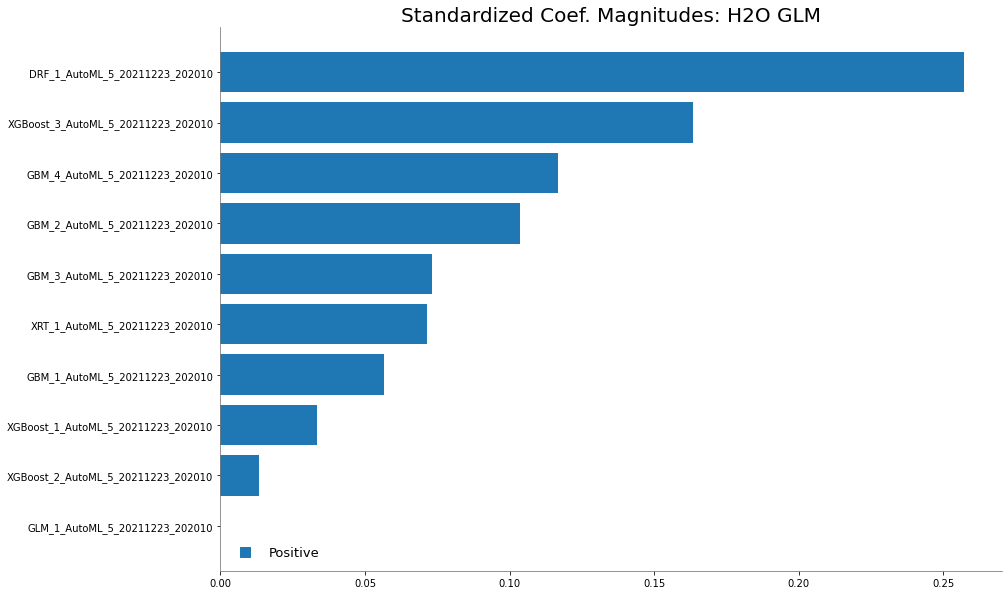

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

In [ ]:
aml1_perf_test = aml1.leader.model_performance(test1)
print(aml1_perf_test.accuracy())
print(aml1_perf_test.auc())
print(aml1_perf_test.aucpr())

aml1_perf_train = aml1.leader.model_performance(train1)
print(aml1_perf_train.accuracy())
print(aml1_perf_train.auc())
print(aml1_perf_train.aucpr())

aml1_perf_valid = aml1.leader.model_performance(valid1)
print(aml1_perf_valid.accuracy())
print(aml1_perf_valid.auc())
print(aml1_perf_valid.aucpr())

[[0.5334472732690223, 0.6553846153846153]]
0.7063644225626888
0.6369171677224604
[[0.5161363117582435, 0.8679476696647588]]
0.9502611779830693
0.9470747733996902
[[0.5213465338112147, 0.6593920498830865]]
0.7090389362840945
0.6290815627610543


In [ ]:
# aml1_80_77_HA = h2o.save_model(model = aml1.leader, path="/content/Models", force=True)
# print(aml1_80_77_HA)

/content/Models/StackedEnsemble_AllModels_2_AutoML_1_20210920_225358


In [ ]:
test_model(test1, 'H/A', aml1)
test_model(train1, 'H/A', aml1)
test_model(valid1, 'H/A', aml1)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.6123076923076923
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (29352, 3)
shape of preds is (29352, 1)
accuracy is 0.7698623603161624
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (3849, 3)
shape of preds is (3849, 1)
accuracy is 0.606131462717589


#### WH

In [ ]:
aml2 = H2OAutoML(max_models = 10, seed = 1)
aml2.train(x = x2, y = y2, training_frame = train2)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_6_20211223_202953

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.012057039528749062
RMSE: 0.1098045514937749
LogLoss: 0.08984319348281743
Mean Per-Class Error: 0.0033882257225162854
AUC: 0.9999155799810184
AUCPR: 0.9999108215511293
Gini: 0.9998311599620369

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5603336048507292: 


0       1   Error            Rate
0      0  5076.0    22.0  0.0043   (22.0/5098.0)
1      1    12.0  4864.0  0.0025   (12.0/4876.0)
2  Total  5088.0  4886.0  0.0034   (34.0/9974.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.560334     0.996517  183.0
1                        max f2   0.432068     0.997339  201.0
2                  max f0point5   0.611606     0.996716  176.0
3                  max accuracy   0.560334     0.996591  183.0
4                 max precision   0.983629     1.000000    0.0
5                    max recall   0.358847     1.000000  214.0
6               max specificity   0.983629     1.000000    0.0
7              max absolute_mcc   0.560334     0.993181  183.0
8    max min_per_class_accuracy   0.593454     0.996469  179.0
9   max mean_per_class_accuracy   0.560334     0.996612  183.0
10                      max tns   0.983629  5098.000000    0.0
11                      max fns   0.983629  4865.000000    0.0
12                      max fps   0.037585  5098.000000  399.0
13                      max tps   0.358847  4876.000000  214.0
14                      max tnr   0.983629     1.000000    0.0
15                      max fnr   0.983629     0.997744    0.0
16                      max fpr   0.037585     1.000000  399.0
17                      max tpr   0.358847     1.000000  214.0


Gains/Lift Table: Avg response rate: 48.89 %, avg score: 51.23 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011029  ...       104.552912            0.022559
1       2                  0.025767  ...       104.552912            0.052707
2       3                  0.030178  ...       104.552912            0.061731
3       4                  0.040004  ...       104.552912            0.081829
4       5                  0.050030  ...       104.552912            0.102338
5       6                  0.100160  ...       104.552912            0.204881
6       7                  0.152597  ...       104.552912            0.312141
7       8                  0.200020  ...       104.552912            0.409147
8       9                  0.299980  ...       104.552912            0.613618
9      10                  0.400040  ...       104.552912            0.818294
10     11                  0.500000  ...       100.000000            0.978227
11     12                  0.599960  ...        66.677807            0.782660
12     13                  0.700221  ...        42.812142            0.586505
13     14                  0.799980  ...        25.003133            0.391330
14     15                  0.900742  ...        11.019590            0.194194
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.11489789273544601
RMSE: 0.33896591677548643
LogLoss: 0.3679970970156909
Mean Per-Class Error: 0.16432445556364256
AUC: 0.9135938017066738
AUCPR: 0.9212232692031075
Gini: 0.8271876034133476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38472076887783946: 


0        1   Error               Rate
0      0  19091.0   4144.0  0.1784   (4144.0/23235.0)
1      1   3362.0  19007.0  0.1503   (3362.0/22369.0)
2  Total  22453.0  23151.0  0.1646   (7506.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.384721      0.835105  225.0
1                        max f2   0.191861      0.875229  305.0
2                  max f0point5   0.695393      0.868005  124.0
3                  max accuracy   0.510208      0.841856  183.0
4                 max precision   0.984338      1.000000    0.0
5                    max recall   0.039512      1.000000  398.0
6               max specificity   0.984338      1.000000    0.0
7              max absolute_mcc   0.538715      0.685325  174.0
8    max min_per_class_accuracy   0.415911      0.836112  214.0
9   max mean_per_class_accuracy   0.510208      0.841052  183.0
10                      max tns   0.984338  23235.000000    0.0
11                      max fns   0.984338  22259.000000    0.0
12                      max fps   0.036453  23235.000000  399.0
13                      max tps   0.039512  22369.000000  398.0
14                      max tnr   0.984338      1.000000    0.0
15                      max fnr   0.984338      0.995082    0.0
16                      max fpr   0.036453      1.000000  399.0
17                      max tpr   0.039512      1.000000  398.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.06 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       103.425321            0.020342
1       2                  0.020020  ...       103.424832            0.040640
2       3                  0.031006  ...       103.294707            0.062862
3       4                  0.040040  ...       103.424832            0.081280
4       5                  0.050018  ...       103.245783            0.101357
5       6                  0.100057  ...       102.173618            0.200653
6       7                  0.150009  ...       101.576721            0.299069
7       8                  0.200048  ...       100.251220            0.393627
8       9                  0.299996  ...        95.109175            0.560012
9      10                  0.400009  ...        84.805282            0.665814
10     11                  0.500000  ...        68.501051            0.672245
11     12                  0.599991  ...        51.297904            0.604094
12     13                  0.700004  ...        35.556651            0.488519
13     14                  0.799996  ...        21.753987            0.341576
14     15                  0.899987  ...        10.074577            0.177960
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
lb2 = aml2.leaderboard

In [ ]:
lb2

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_6_20211223_202953 0.913594 0.367997 0.921223 0.164324 0.338966 0.114898 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211223_202953 0.911361 0.3724 0.919157 0.165403 0.341404 0.116557 
 StackedEnsemble_AllModels_3_AutoML_6_20211223_202953 0.911275 0.37242 0.919236 0.163708 0.341085 0.116339 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211223_202953 0.909441 0.376311 0.916975 0.166927 0.343279 0.117841 
 StackedEnsemble_BestOfFamily_2_AutoML_6_20211223_202953 0.907318 0.384084 0.913983 0.166377 0.346578 0.120116 
 StackedEnsemble_BestOfFamily_6_AutoML_6_20211223_202953 0.907308 0.384203 0.914039 0.16681 0.346624 0.120148 
 StackedEnsemble_AllModels_5_AutoML_6_20211223_202953 0.907297 0.384197 0.913852 0.166926 0.346649 0.120166 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211223_202953 0.907288 0.384143 0.914005 0.167161 0.346608 0.120137 
 StackedEnsemble_AllModels_1_AutoML_6_20211223_202953 0.907285 0.384144 0.913998 0.167562 0.346637 0.120157 
 StackedEnsemble_AllModels_2_AutoML_6_20211223_202953 0.907262 0.384145 0.913973 0.167649 0.346643 0.120161

In [ ]:
lb2.head(rows=lb2.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_6_20211223_202953 0.913594 0.367997 0.921223 0.164324 0.338966 0.114898 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211223_202953 0.911361 0.3724 0.919157 0.165403 0.341404 0.116557 
 StackedEnsemble_AllModels_3_AutoML_6_20211223_202953 0.911275 0.37242 0.919236 0.163708 0.341085 0.116339 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211223_202953 0.909441 0.376311 0.916975 0.166927 0.343279 0.117841 
 StackedEnsemble_BestOfFamily_2_AutoML_6_20211223_202953 0.907318 0.384084 0.913983 0.166377 0.346578 0.120116 
 StackedEnsemble_BestOfFamily_6_AutoML_6_20211223_202953 0.907308 0.384203 0.914039 0.16681 0.346624 0.120148 
 StackedEnsemble_AllModels_5_AutoML_6_20211223_202953 0.907297 0.384197 0.913852 0.166926 0.346649 0.120166 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211223_202953 0.907288 0.384143 0.914005 0.167161 0.346608 0.120137 
 StackedEnsemble_AllModels_1_AutoML_6_20211223_202953 0.907285 0.384144 0.913998 0.167562 0.346637 0.120157 
 StackedEnsemble_AllModels_2_AutoML_6_20211223_202953 0.907262 0.384145 0.913973 0.167649 0.346643 0.120161 
 GBM_4_AutoML_6_20211223_202953 0.904739 0.393256 0.909941 0.16919 0.349841 0.122389 
 DRF_1_AutoML_6_20211223_202953 0.887415 0.445207 0.894417 0.190999 0.376243 0.141559 
 StackedEnsemble_BestOfFamily_1_AutoML_6_20211223_202953 0.881181 0.432805 0.882906 0.196705 0.37168 0.138146 
 XGBoost_2_AutoML_6_20211223_202953 0.875904 0.450564 0.876455 0.202293 0.377343 0.142388 
 GBM_3_AutoML_6_20211223_202953 0.875499 0.445274 0.877872 0.20344 0.377606 0.142586 
 XGBoost_1_AutoML_6_20211223_202953 0.873584 0.452021 0.873263 0.205015 0.379446 0.143979 
 GBM_1_AutoML_6_20211223_202953 0.872382 0.448918 0.873979 0.205265 0.379769 0.144224 
 GBM_2_AutoML_6_20211223_202953 0.862188 0.466095 0.864825 0.215671 0.388407 0.15086 
 XRT_1_AutoML_6_20211223_202953 0.849146 0.551835 0.843031 0.237129 0.428683 0.183769 
 XGBoost_3_AutoML_6_20211223_202953 0.840838 0.494321 0.844564 0.250481 0.402678 0.16215 
 GLM_1_AutoML_6_20211223_202953 0.763319 0.58305 0.760105 0.322948 0.445416 0.198396

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml2.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
# metalearner.coef_norm()

In [ ]:
# %matplotlib inline
# metalearner.std_coef_plot()

In [ ]:
test_model(test2, 'W/H', aml2)
test_model(train2, 'W/H', aml2)
test_model(valid2, 'W/H', aml2)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.841040147970841
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.992084027716867
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.847962901623054


In [ ]:
aml2_perf_test = aml2.leader.model_performance(test2)
print(aml2_perf_test.accuracy())
print(aml2_perf_test.auc())
print(aml2_perf_test.aucpr())

aml2_perf_train = aml2.leader.model_performance(train2)
print(aml2_perf_train.accuracy())
print(aml2_perf_train.auc())
print(aml2_perf_train.aucpr())

aml2_perf_valid = aml2.leader.model_performance(valid2)
print(aml2_perf_valid.accuracy())
print(aml2_perf_valid.auc())
print(aml2_perf_valid.aucpr())

[[0.4709836672868622, 0.8477858774888478]]
0.9205250290269541
0.9277027637326112
[[0.546736831198967, 0.9962064731163933]]
0.9999074967169156
0.9999004320748586
[[0.4912986492303371, 0.8504471679364027]]
0.9230541503387133
0.931692950547533
